In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2022_mavenn2_github/mavenn')

import mavenn
import logomaker
import seaborn as sns
import re

%matplotlib inline

In [2]:
data_df_full_lib_1 = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib1.csv')
y_cols = list(data_df_full_lib_1.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
data_df_lib_1 = data_df_full_lib_1[cols].copy()

data_df_full_lib_2 = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib2.csv')
y_cols = list(data_df_full_lib_2.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
data_df_lib_2 = data_df_full_lib_2[cols].copy()

In [3]:
# data_df_full = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib1.csv')
# y_cols = list(data_df_full.columns[8:])
# cols = y_cols.copy()
# cols.insert(0,'x')
# data_df = data_df_full[cols].copy()
# data_df.head(10)

data_df = pd.concat([data_df_lib_1,data_df_lib_2]).reset_index(drop=True).copy()
data_df

,x,TiteSeq_01_bin1,TiteSeq_01_bin2,TiteSeq_01_bin3,TiteSeq_01_bin4,TiteSeq_02_bin1,TiteSeq_02_bin2,TiteSeq_02_bin3,TiteSeq_02_bin4,TiteSeq_03_bin1,...,TiteSeq_14_bin3,TiteSeq_14_bin4,TiteSeq_15_bin1,TiteSeq_15_bin2,TiteSeq_15_bin3,TiteSeq_15_bin4,TiteSeq_16_bin1,TiteSeq_16_bin2,TiteSeq_16_bin3,TiteSeq_16_bin4
0,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NITNLCPFGEVFSATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,1,...,0,0,21,0,0,0,17,0,0,0
2,NITNLCPFGEVFNATRFASVYCWNRKRISNCVADYSVLYNSASFST...,6,35,162,4,24,85,80,30,10,...,37,0,151,4,0,0,154,19,0,0
3,NITNLCPFGEVFFATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,1,3,439,1,0,14,307,17,...,82,0,180,12,0,12,306,20,0,0
4,NITNLKPFGEVFNAWRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,3,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184245,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,239,0,0,1,167,0,...,0,0,246,5,0,0,183,26,0,0
184246,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,29,211,45,0,44,244,19,1,...,1,1,147,10,0,0,210,30,0,0
184247,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,24,394,13,0,28,389,2,0,...,0,0,388,27,0,0,366,40,0,0
184248,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,49,17,1,0,19,4,0,5,41,...,0,0,88,19,0,0,119,5,0,0


In [4]:
X = data_df['x']
y = data_df[y_cols]

In [5]:
# set positional argumnets for gpmap function
L = len(data_df['x'][0])
# alphabet=['A', 'C', 'D', 'E', 'F',
#           'G', 'H', 'I', 'K', 'L',
#           'M', 'N', 'P', 'Q', 'R',
#           'S', 'T', 'V', 'W', 'Y', '*']


alphabet=['A', 'C', 'D', 'E', 'F',
          'G', 'H', 'I', 'K', 'L',
          'M', 'N', 'P', 'Q', 'R',
          'S', 'T', 'V', 'W', 'Y']


Y = len(y_cols)
print(f'L={L}, Y={Y}')

L=201, Y=64


In [6]:
gpmap = mavenn.gpmap.AdditiveGPMapLayer(L, alphabet)

# # instantiate gpmap object
# gpmap = mavenn.gpmap.Multi_AdditiveGPMapLayer(L=L, 
#                                               alphabet=alphabet,
#                                               number_latent_nodes=2)



2022-08-29 00:32:50.688093: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [8]:
# read in parameters

# number of reads in each bin summed
N_y = np.sum(y,axis=0)

In [9]:
print(N_y)

TiteSeq_01_bin1     5282064
TiteSeq_01_bin2     2420062
TiteSeq_01_bin3     3563327
TiteSeq_01_bin4    13256660
TiteSeq_02_bin1     5094914
                     ...   
TiteSeq_15_bin4      621457
TiteSeq_16_bin1    23064475
TiteSeq_16_bin2     1582135
TiteSeq_16_bin3     3128968
TiteSeq_16_bin4      725998
Length: 64, dtype: int64


#### I approximated these values from Fig 2B

In [10]:
bounds = np.array([[0,180],[180,1400],[1400,10500],[10500,250000]])
bounds_df = pd.DataFrame(bounds,columns=['lower_bound','upper_bound'])
f_y_lower_bounds = bounds_df['lower_bound'].values
f_y_upper_bounds = bounds_df['upper_bound'].values
bounds_df

,lower_bound,upper_bound
0,0,180
1,180,1400
2,1400,10500
3,10500,250000


### I don't know how to obtain these values
Using arbitrary values for now just to be able to debug Titeseq MP.
Get these from figure 2B

In [11]:
mu_neg = 50
mu_pos = 700000
sigma_neg = 100
sigma_pos = 50000

In [12]:
#mavenn.measurement_process_layers.DiscreteAgnosticMP?

In [13]:
mp_list = [mavenn.measurement_process_layers.DiscreteAgnosticMP(info_for_layers_dict={'H_y_norm':0},
                                                                      Y=4,
                                                                      K=10,
                                                                      eta=1e-4,)
           for mp in range(len(y_cols)//4)
          ]

In [14]:
# there are 16 measurement processes in this 
len(mp_list)

16

In [15]:
model = mavenn.Model2(gpmap=gpmap,
                      mp_list=mp_list)

In [16]:
model.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Sequence_labels_input (InputLa  [(None, 4084)]      0           []                               
 yer)                                                                                             
                                                                                                  
 Sequence_only (Lambda)         (None, 4020)         0           ['Sequence_labels_input[0][0]']  
                                                                                                  
 additive_gp_map_layer (Additiv  (None, 1)           4021        ['Sequence_only[0][0]']          
 eGPMapLayer)                                                                                     
                                                                                              

In [17]:
# Set training data
model.set_data(x=x_train,
               
               y_list=[
                       y_train[y_cols[0:4]].values,
                       y_train[y_cols[4:8]].values,
                       y_train[y_cols[8:12]].values,
                       y_train[y_cols[12:16]].values,
                       y_train[y_cols[16:20]].values,
                       y_train[y_cols[20:24]].values,
                       y_train[y_cols[24:28]].values,
                       y_train[y_cols[28:32]].values,
                       y_train[y_cols[32:36]].values,
                       y_train[y_cols[36:40]].values,
                       y_train[y_cols[40:44]].values,
                       y_train[y_cols[44:48]].values,
                       y_train[y_cols[48:52]].values,
                       y_train[y_cols[52:56]].values,                   
                       y_train[y_cols[56:60]].values,                                      
                       y_train[y_cols[60:64]].values,                                                         
                      ],

               shuffle=False)

N = 165,825 observations set as training data.
Using 19.9% for validation.
Time to set data: 54.5 sec.


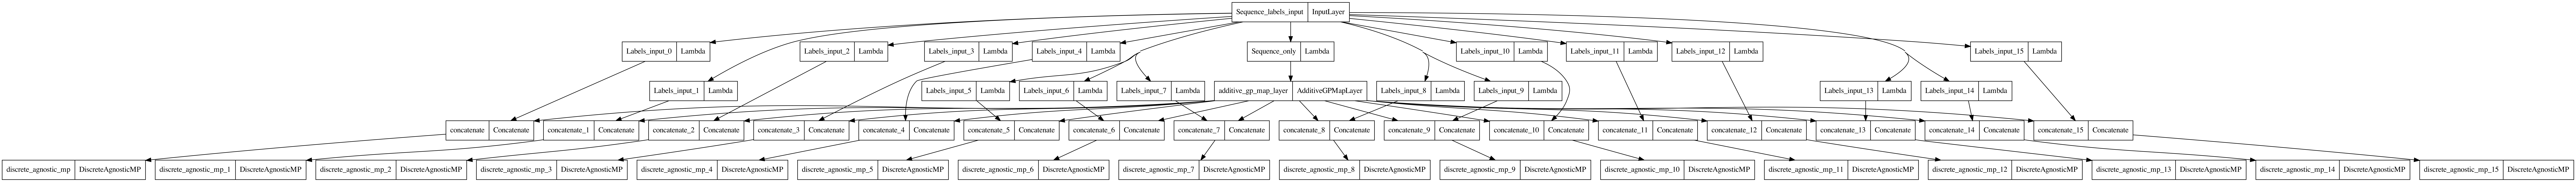

In [18]:
from tensorflow.keras.utils import plot_model
plot_model(model.model,show_shapes=False,show_dtype=False,dpi=300,to_file='titeseq_dar.png')

In [19]:

# Fit model to data
model.fit(learning_rate=.00005,
          epochs=1000,
          batch_size=250,
          try_tqdm = True,
          early_stopping=True,
          early_stopping_patience=50,
          linear_initialization=False)

0epoch [00:00, ?epoch/s]

Epoch 1/1000
532/532 [==============================] - 25s 26ms/step - loss: 810776.2500 - discrete_agnostic_mp_loss: 47218.6758 - discrete_agnostic_mp_1_loss: 43383.8555 - discrete_agnostic_mp_2_loss: 49220.0312 - discrete_agnostic_mp_3_loss: 64358.6094 - discrete_agnostic_mp_4_loss: 48933.1562 - discrete_agnostic_mp_5_loss: 50600.2930 - discrete_agnostic_mp_6_loss: 55888.4258 - discrete_agnostic_mp_7_loss: 48015.8555 - discrete_agnostic_mp_8_loss: 49383.7148 - discrete_agnostic_mp_9_loss: 50340.4648 - discrete_agnostic_mp_10_loss: 58236.6797 - discrete_agnostic_mp_11_loss: 65026.6094 - discrete_agnostic_mp_12_loss: 49230.7539 - discrete_agnostic_mp_13_loss: 40286.5078 - discrete_agnostic_mp_14_loss: 43209.2773 - discrete_agnostic_mp_15_loss: 47443.0234 - I_var: -0.7971 - val_loss: 737706.8750 - val_discrete_agnostic_mp_loss: 44357.1680 - val_discrete_agnostic_mp_1_loss: 40818.8633 - val_discrete_agnostic_mp_2_loss: 48100.1953 - val_discrete_agnostic_mp_3_loss: 61748.9570 - val_discr

532/532 [==============================] - 18s 35ms/step - loss: 624424.0000 - discrete_agnostic_mp_loss: 39527.8242 - discrete_agnostic_mp_1_loss: 38681.5078 - discrete_agnostic_mp_2_loss: 40661.9609 - discrete_agnostic_mp_3_loss: 57352.3672 - discrete_agnostic_mp_4_loss: 42259.5703 - discrete_agnostic_mp_5_loss: 45980.9180 - discrete_agnostic_mp_6_loss: 49374.7383 - discrete_agnostic_mp_7_loss: 46429.2266 - discrete_agnostic_mp_8_loss: 45071.3555 - discrete_agnostic_mp_9_loss: 39382.1094 - discrete_agnostic_mp_10_loss: 37232.4180 - discrete_agnostic_mp_11_loss: 43212.1211 - discrete_agnostic_mp_12_loss: 27612.4590 - discrete_agnostic_mp_13_loss: 21769.6816 - discrete_agnostic_mp_14_loss: 22635.8652 - discrete_agnostic_mp_15_loss: 27239.8828 - I_var: -0.0490 - val_loss: 607444.7500 - val_discrete_agnostic_mp_loss: 38006.6641 - val_discrete_agnostic_mp_1_loss: 36991.0039 - val_discrete_agnostic_mp_2_loss: 39344.1367 - val_discrete_agnostic_mp_3_loss: 55780.9883 - val_discrete_agnostic_

532/532 [==============================] - 17s 32ms/step - loss: 609317.0000 - discrete_agnostic_mp_loss: 39326.6680 - discrete_agnostic_mp_1_loss: 38190.1055 - discrete_agnostic_mp_2_loss: 40018.0078 - discrete_agnostic_mp_3_loss: 57058.6484 - discrete_agnostic_mp_4_loss: 41857.4062 - discrete_agnostic_mp_5_loss: 45896.6016 - discrete_agnostic_mp_6_loss: 49125.0938 - discrete_agnostic_mp_7_loss: 46419.7344 - discrete_agnostic_mp_8_loss: 44965.3203 - discrete_agnostic_mp_9_loss: 38119.4297 - discrete_agnostic_mp_10_loss: 33469.3281 - discrete_agnostic_mp_11_loss: 41503.8789 - discrete_agnostic_mp_12_loss: 26367.9473 - discrete_agnostic_mp_13_loss: 20004.4062 - discrete_agnostic_mp_14_loss: 21034.1895 - discrete_agnostic_mp_15_loss: 25959.9453 - I_var: -5.0462e-04 - val_loss: 597122.2500 - val_discrete_agnostic_mp_loss: 37830.6289 - val_discrete_agnostic_mp_1_loss: 36717.3164 - val_discrete_agnostic_mp_2_loss: 38800.0430 - val_discrete_agnostic_mp_3_loss: 55513.8203 - val_discrete_agnos

532/532 [==============================] - 16s 30ms/step - loss: 607248.0000 - discrete_agnostic_mp_loss: 39333.6250 - discrete_agnostic_mp_1_loss: 38166.7500 - discrete_agnostic_mp_2_loss: 40010.6445 - discrete_agnostic_mp_3_loss: 57063.5898 - discrete_agnostic_mp_4_loss: 41852.0000 - discrete_agnostic_mp_5_loss: 45902.8828 - discrete_agnostic_mp_6_loss: 49128.3125 - discrete_agnostic_mp_7_loss: 46425.7188 - discrete_agnostic_mp_8_loss: 44967.7227 - discrete_agnostic_mp_9_loss: 37705.5000 - discrete_agnostic_mp_10_loss: 32780.0508 - discrete_agnostic_mp_11_loss: 41354.6523 - discrete_agnostic_mp_12_loss: 26273.4082 - discrete_agnostic_mp_13_loss: 19606.6582 - discrete_agnostic_mp_14_loss: 20843.9902 - discrete_agnostic_mp_15_loss: 25832.2129 - I_var: 0.0062 - val_loss: 595649.0000 - val_discrete_agnostic_mp_loss: 37824.1562 - val_discrete_agnostic_mp_1_loss: 36721.4727 - val_discrete_agnostic_mp_2_loss: 38777.4062 - val_discrete_agnostic_mp_3_loss: 55502.5703 - val_discrete_agnostic_m

Epoch 18/1000
532/532 [==============================] - 16s 29ms/step - loss: 606734.0000 - discrete_agnostic_mp_loss: 39333.3906 - discrete_agnostic_mp_1_loss: 38165.2148 - discrete_agnostic_mp_2_loss: 40010.5117 - discrete_agnostic_mp_3_loss: 57058.9336 - discrete_agnostic_mp_4_loss: 41851.2734 - discrete_agnostic_mp_5_loss: 45901.8164 - discrete_agnostic_mp_6_loss: 49126.1836 - discrete_agnostic_mp_7_loss: 46423.9492 - discrete_agnostic_mp_8_loss: 44964.7852 - discrete_agnostic_mp_9_loss: 37529.3945 - discrete_agnostic_mp_10_loss: 32671.6445 - discrete_agnostic_mp_11_loss: 41341.7852 - discrete_agnostic_mp_12_loss: 26261.2031 - discrete_agnostic_mp_13_loss: 19469.6074 - discrete_agnostic_mp_14_loss: 20821.9824 - discrete_agnostic_mp_15_loss: 25802.3867 - I_var: 0.0062 - val_loss: 595376.1250 - val_discrete_agnostic_mp_loss: 37826.3359 - val_discrete_agnostic_mp_1_loss: 36730.0703 - val_discrete_agnostic_mp_2_loss: 38779.4414 - val_discrete_agnostic_mp_3_loss: 55501.3398 - val_discr

532/532 [==============================] - 16s 31ms/step - loss: 606678.0000 - discrete_agnostic_mp_loss: 39329.2422 - discrete_agnostic_mp_1_loss: 38162.1133 - discrete_agnostic_mp_2_loss: 40007.7383 - discrete_agnostic_mp_3_loss: 57055.8906 - discrete_agnostic_mp_4_loss: 41848.4219 - discrete_agnostic_mp_5_loss: 45899.5430 - discrete_agnostic_mp_6_loss: 49127.1914 - discrete_agnostic_mp_7_loss: 46426.1094 - discrete_agnostic_mp_8_loss: 44967.9062 - discrete_agnostic_mp_9_loss: 37502.9336 - discrete_agnostic_mp_10_loss: 32668.3438 - discrete_agnostic_mp_11_loss: 41341.4766 - discrete_agnostic_mp_12_loss: 26260.2266 - discrete_agnostic_mp_13_loss: 19447.4609 - discrete_agnostic_mp_14_loss: 20824.9766 - discrete_agnostic_mp_15_loss: 25808.4512 - I_var: 0.0069 - val_loss: 595321.9375 - val_discrete_agnostic_mp_loss: 37824.3789 - val_discrete_agnostic_mp_1_loss: 36728.6758 - val_discrete_agnostic_mp_2_loss: 38777.5820 - val_discrete_agnostic_mp_3_loss: 55500.1055 - val_discrete_agnostic_m

532/532 [==============================] - 16s 31ms/step - loss: 606564.0000 - discrete_agnostic_mp_loss: 39288.6758 - discrete_agnostic_mp_1_loss: 38118.1602 - discrete_agnostic_mp_2_loss: 39971.6055 - discrete_agnostic_mp_3_loss: 57032.0781 - discrete_agnostic_mp_4_loss: 41822.5586 - discrete_agnostic_mp_5_loss: 45882.4922 - discrete_agnostic_mp_6_loss: 49097.0312 - discrete_agnostic_mp_7_loss: 46432.8242 - discrete_agnostic_mp_8_loss: 44984.8203 - discrete_agnostic_mp_9_loss: 37517.8594 - discrete_agnostic_mp_10_loss: 32689.1836 - discrete_agnostic_mp_11_loss: 41376.3242 - discrete_agnostic_mp_12_loss: 26270.4102 - discrete_agnostic_mp_13_loss: 19452.6465 - discrete_agnostic_mp_14_loss: 20824.5918 - discrete_agnostic_mp_15_loss: 25802.4062 - I_var: 0.0048 - val_loss: 595200.6250 - val_discrete_agnostic_mp_loss: 37788.9805 - val_discrete_agnostic_mp_1_loss: 36695.5156 - val_discrete_agnostic_mp_2_loss: 38746.2500 - val_discrete_agnostic_mp_3_loss: 55480.7930 - val_discrete_agnostic_m

532/532 [==============================] - 16s 31ms/step - loss: 606283.5000 - discrete_agnostic_mp_loss: 39211.1797 - discrete_agnostic_mp_1_loss: 38045.0234 - discrete_agnostic_mp_2_loss: 39902.1836 - discrete_agnostic_mp_3_loss: 56981.0586 - discrete_agnostic_mp_4_loss: 41772.3594 - discrete_agnostic_mp_5_loss: 45843.9102 - discrete_agnostic_mp_6_loss: 49047.1602 - discrete_agnostic_mp_7_loss: 46441.1055 - discrete_agnostic_mp_8_loss: 45006.8398 - discrete_agnostic_mp_9_loss: 37543.8672 - discrete_agnostic_mp_10_loss: 32706.1875 - discrete_agnostic_mp_11_loss: 41422.1680 - discrete_agnostic_mp_12_loss: 26279.3691 - discrete_agnostic_mp_13_loss: 19451.6367 - discrete_agnostic_mp_14_loss: 20832.6348 - discrete_agnostic_mp_15_loss: 25797.1348 - I_var: 0.0087 - val_loss: 594971.8750 - val_discrete_agnostic_mp_loss: 37718.6133 - val_discrete_agnostic_mp_1_loss: 36628.2461 - val_discrete_agnostic_mp_2_loss: 38682.8008 - val_discrete_agnostic_mp_3_loss: 55434.5312 - val_discrete_agnostic_m

532/532 [==============================] - 17s 32ms/step - loss: 605987.6250 - discrete_agnostic_mp_loss: 39108.8633 - discrete_agnostic_mp_1_loss: 37952.3711 - discrete_agnostic_mp_2_loss: 39806.4414 - discrete_agnostic_mp_3_loss: 56920.3320 - discrete_agnostic_mp_4_loss: 41705.4766 - discrete_agnostic_mp_5_loss: 45802.4453 - discrete_agnostic_mp_6_loss: 48989.6016 - discrete_agnostic_mp_7_loss: 46455.7539 - discrete_agnostic_mp_8_loss: 45036.3359 - discrete_agnostic_mp_9_loss: 37572.5703 - discrete_agnostic_mp_10_loss: 32758.6641 - discrete_agnostic_mp_11_loss: 41469.8086 - discrete_agnostic_mp_12_loss: 26296.1270 - discrete_agnostic_mp_13_loss: 19472.3184 - discrete_agnostic_mp_14_loss: 20838.2266 - discrete_agnostic_mp_15_loss: 25802.2754 - I_var: 0.0071 - val_loss: 594642.6875 - val_discrete_agnostic_mp_loss: 37617.2969 - val_discrete_agnostic_mp_1_loss: 36533.8125 - val_discrete_agnostic_mp_2_loss: 38589.6016 - val_discrete_agnostic_mp_3_loss: 55369.0156 - val_discrete_agnostic_m

532/532 [==============================] - 16s 31ms/step - loss: 605604.5625 - discrete_agnostic_mp_loss: 39002.4844 - discrete_agnostic_mp_1_loss: 37853.4570 - discrete_agnostic_mp_2_loss: 39707.2109 - discrete_agnostic_mp_3_loss: 56853.7031 - discrete_agnostic_mp_4_loss: 41635.5391 - discrete_agnostic_mp_5_loss: 45753.2500 - discrete_agnostic_mp_6_loss: 48924.4570 - discrete_agnostic_mp_7_loss: 46463.8359 - discrete_agnostic_mp_8_loss: 45057.2812 - discrete_agnostic_mp_9_loss: 37592.9375 - discrete_agnostic_mp_10_loss: 32792.9102 - discrete_agnostic_mp_11_loss: 41518.1719 - discrete_agnostic_mp_12_loss: 26310.2656 - discrete_agnostic_mp_13_loss: 19484.2695 - discrete_agnostic_mp_14_loss: 20852.7598 - discrete_agnostic_mp_15_loss: 25801.5957 - I_var: 0.0059 - val_loss: 594311.5000 - val_discrete_agnostic_mp_loss: 37515.8516 - val_discrete_agnostic_mp_1_loss: 36440.9336 - val_discrete_agnostic_mp_2_loss: 38496.6055 - val_discrete_agnostic_mp_3_loss: 55299.4922 - val_discrete_agnostic_m

532/532 [==============================] - 17s 33ms/step - loss: 604900.1250 - discrete_agnostic_mp_loss: 38820.5625 - discrete_agnostic_mp_1_loss: 37691.0977 - discrete_agnostic_mp_2_loss: 39539.1250 - discrete_agnostic_mp_3_loss: 56729.2773 - discrete_agnostic_mp_4_loss: 41519.3711 - discrete_agnostic_mp_5_loss: 45676.4336 - discrete_agnostic_mp_6_loss: 48815.2578 - discrete_agnostic_mp_7_loss: 46470.0430 - discrete_agnostic_mp_8_loss: 45083.9844 - discrete_agnostic_mp_9_loss: 37615.9805 - discrete_agnostic_mp_10_loss: 32840.2109 - discrete_agnostic_mp_11_loss: 41580.0898 - discrete_agnostic_mp_12_loss: 26342.6133 - discrete_agnostic_mp_13_loss: 19502.7773 - discrete_agnostic_mp_14_loss: 20868.4258 - discrete_agnostic_mp_15_loss: 25804.8965 - I_var: 0.0086 - val_loss: 593615.6875 - val_discrete_agnostic_mp_loss: 37355.9727 - val_discrete_agnostic_mp_1_loss: 36295.8633 - val_discrete_agnostic_mp_2_loss: 38348.6445 - val_discrete_agnostic_mp_3_loss: 55185.9258 - val_discrete_agnostic_m

532/532 [==============================] - 22s 41ms/step - loss: 604665.8125 - discrete_agnostic_mp_loss: 38758.1172 - discrete_agnostic_mp_1_loss: 37636.9727 - discrete_agnostic_mp_2_loss: 39484.1680 - discrete_agnostic_mp_3_loss: 56689.5781 - discrete_agnostic_mp_4_loss: 41477.5781 - discrete_agnostic_mp_5_loss: 45649.3906 - discrete_agnostic_mp_6_loss: 48779.5742 - discrete_agnostic_mp_7_loss: 46468.6914 - discrete_agnostic_mp_8_loss: 45089.8906 - discrete_agnostic_mp_9_loss: 37620.3945 - discrete_agnostic_mp_10_loss: 32864.2070 - discrete_agnostic_mp_11_loss: 41592.5664 - discrete_agnostic_mp_12_loss: 26352.8379 - discrete_agnostic_mp_13_loss: 19513.0762 - discrete_agnostic_mp_14_loss: 20873.5020 - discrete_agnostic_mp_15_loss: 25815.2734 - I_var: 0.0071 - val_loss: 593397.6875 - val_discrete_agnostic_mp_loss: 37300.5781 - val_discrete_agnostic_mp_1_loss: 36245.6602 - val_discrete_agnostic_mp_2_loss: 38298.6328 - val_discrete_agnostic_mp_3_loss: 55145.6562 - val_discrete_agnostic_m

532/532 [==============================] - 17s 33ms/step - loss: 604178.3750 - discrete_agnostic_mp_loss: 38636.6250 - discrete_agnostic_mp_1_loss: 37526.8477 - discrete_agnostic_mp_2_loss: 39370.7422 - discrete_agnostic_mp_3_loss: 56604.6641 - discrete_agnostic_mp_4_loss: 41397.0508 - discrete_agnostic_mp_5_loss: 45595.2891 - discrete_agnostic_mp_6_loss: 48709.1328 - discrete_agnostic_mp_7_loss: 46471.4883 - discrete_agnostic_mp_8_loss: 45102.6914 - discrete_agnostic_mp_9_loss: 37629.1289 - discrete_agnostic_mp_10_loss: 32894.2891 - discrete_agnostic_mp_11_loss: 41636.9375 - discrete_agnostic_mp_12_loss: 26373.5234 - discrete_agnostic_mp_13_loss: 19527.6602 - discrete_agnostic_mp_14_loss: 20886.8750 - discrete_agnostic_mp_15_loss: 25815.0742 - I_var: 0.0071 - val_loss: 592954.1875 - val_discrete_agnostic_mp_loss: 37179.7969 - val_discrete_agnostic_mp_1_loss: 36137.7227 - val_discrete_agnostic_mp_2_loss: 38190.0391 - val_discrete_agnostic_mp_3_loss: 55059.0977 - val_discrete_agnostic_m

532/532 [==============================] - 17s 32ms/step - loss: 603282.2500 - discrete_agnostic_mp_loss: 38420.8242 - discrete_agnostic_mp_1_loss: 37337.0430 - discrete_agnostic_mp_2_loss: 39175.4766 - discrete_agnostic_mp_3_loss: 56452.7461 - discrete_agnostic_mp_4_loss: 41253.5664 - discrete_agnostic_mp_5_loss: 45499.2305 - discrete_agnostic_mp_6_loss: 48578.3906 - discrete_agnostic_mp_7_loss: 46461.5469 - discrete_agnostic_mp_8_loss: 45119.1445 - discrete_agnostic_mp_9_loss: 37633.2969 - discrete_agnostic_mp_10_loss: 32944.5859 - discrete_agnostic_mp_11_loss: 41699.5430 - discrete_agnostic_mp_12_loss: 26411.4941 - discrete_agnostic_mp_13_loss: 19554.8262 - discrete_agnostic_mp_14_loss: 20901.3867 - discrete_agnostic_mp_15_loss: 25838.5703 - I_var: 0.0059 - val_loss: 592166.3125 - val_discrete_agnostic_mp_loss: 36965.5859 - val_discrete_agnostic_mp_1_loss: 35944.5039 - val_discrete_agnostic_mp_2_loss: 37998.6953 - val_discrete_agnostic_mp_3_loss: 54894.9297 - val_discrete_agnostic_m

532/532 [==============================] - 18s 33ms/step - loss: 602007.8750 - discrete_agnostic_mp_loss: 38144.1719 - discrete_agnostic_mp_1_loss: 37092.1797 - discrete_agnostic_mp_2_loss: 38928.5703 - discrete_agnostic_mp_3_loss: 56247.1172 - discrete_agnostic_mp_4_loss: 41060.0273 - discrete_agnostic_mp_5_loss: 45365.1992 - discrete_agnostic_mp_6_loss: 48407.8398 - discrete_agnostic_mp_7_loss: 46428.4102 - discrete_agnostic_mp_8_loss: 45125.4727 - discrete_agnostic_mp_9_loss: 37624.4688 - discrete_agnostic_mp_10_loss: 32998.1562 - discrete_agnostic_mp_11_loss: 41777.4336 - discrete_agnostic_mp_12_loss: 26448.6191 - discrete_agnostic_mp_13_loss: 19579.8906 - discrete_agnostic_mp_14_loss: 20930.6230 - discrete_agnostic_mp_15_loss: 25849.7500 - I_var: 0.0036 - val_loss: 590862.4375 - val_discrete_agnostic_mp_loss: 36743.4375 - val_discrete_agnostic_mp_1_loss: 35750.0625 - val_discrete_agnostic_mp_2_loss: 37799.1016 - val_discrete_agnostic_mp_3_loss: 54725.2852 - val_discrete_agnostic_m

532/532 [==============================] - 17s 32ms/step - loss: 599890.7500 - discrete_agnostic_mp_loss: 37702.6328 - discrete_agnostic_mp_1_loss: 36706.7969 - discrete_agnostic_mp_2_loss: 38540.6055 - discrete_agnostic_mp_3_loss: 55896.2930 - discrete_agnostic_mp_4_loss: 40747.2422 - discrete_agnostic_mp_5_loss: 45141.8203 - discrete_agnostic_mp_6_loss: 48127.5664 - discrete_agnostic_mp_7_loss: 46346.5781 - discrete_agnostic_mp_8_loss: 45117.5195 - discrete_agnostic_mp_9_loss: 37582.3789 - discrete_agnostic_mp_10_loss: 33069.8867 - discrete_agnostic_mp_11_loss: 41880.4492 - discrete_agnostic_mp_12_loss: 26520.8711 - discrete_agnostic_mp_13_loss: 19629.8418 - discrete_agnostic_mp_14_loss: 20974.9570 - discrete_agnostic_mp_15_loss: 25905.5000 - I_var: 0.0029 - val_loss: 588846.2500 - val_discrete_agnostic_mp_loss: 36316.3203 - val_discrete_agnostic_mp_1_loss: 35372.4219 - val_discrete_agnostic_mp_2_loss: 37428.3555 - val_discrete_agnostic_mp_3_loss: 54374.0742 - val_discrete_agnostic_m

532/532 [==============================] - 21s 40ms/step - loss: 596532.5625 - discrete_agnostic_mp_loss: 37105.3789 - discrete_agnostic_mp_1_loss: 36185.9844 - discrete_agnostic_mp_2_loss: 38021.6055 - discrete_agnostic_mp_3_loss: 55390.0469 - discrete_agnostic_mp_4_loss: 40286.9453 - discrete_agnostic_mp_5_loss: 44790.8633 - discrete_agnostic_mp_6_loss: 47717.1992 - discrete_agnostic_mp_7_loss: 46162.5508 - discrete_agnostic_mp_8_loss: 45057.5625 - discrete_agnostic_mp_9_loss: 37471.2305 - discrete_agnostic_mp_10_loss: 33129.3164 - discrete_agnostic_mp_11_loss: 41978.4570 - discrete_agnostic_mp_12_loss: 26597.3047 - discrete_agnostic_mp_13_loss: 19685.2773 - discrete_agnostic_mp_14_loss: 21011.2734 - discrete_agnostic_mp_15_loss: 25941.4746 - I_var: 8.0883e-04 - val_loss: 585998.0625 - val_discrete_agnostic_mp_loss: 35808.0352 - val_discrete_agnostic_mp_1_loss: 34925.0391 - val_discrete_agnostic_mp_2_loss: 36990.0859 - val_discrete_agnostic_mp_3_loss: 53927.2617 - val_discrete_agnost

532/532 [==============================] - 19s 35ms/step - loss: 592557.1250 - discrete_agnostic_mp_loss: 36434.3828 - discrete_agnostic_mp_1_loss: 35603.3555 - discrete_agnostic_mp_2_loss: 37453.2031 - discrete_agnostic_mp_3_loss: 54779.1367 - discrete_agnostic_mp_4_loss: 39747.8750 - discrete_agnostic_mp_5_loss: 44360.7891 - discrete_agnostic_mp_6_loss: 47233.3906 - discrete_agnostic_mp_7_loss: 45882.2188 - discrete_agnostic_mp_8_loss: 44963.0781 - discrete_agnostic_mp_9_loss: 37307.1992 - discrete_agnostic_mp_10_loss: 33200.5352 - discrete_agnostic_mp_11_loss: 42094.6562 - discrete_agnostic_mp_12_loss: 26679.4473 - discrete_agnostic_mp_13_loss: 19741.5488 - discrete_agnostic_mp_14_loss: 21070.8066 - discrete_agnostic_mp_15_loss: 26005.1758 - I_var: -0.0014 - val_loss: 582126.8125 - val_discrete_agnostic_mp_loss: 35198.7109 - val_discrete_agnostic_mp_1_loss: 34390.0859 - val_discrete_agnostic_mp_2_loss: 36469.1797 - val_discrete_agnostic_mp_3_loss: 53352.7773 - val_discrete_agnostic_

532/532 [==============================] - 17s 31ms/step - loss: 588383.0625 - discrete_agnostic_mp_loss: 35804.9883 - discrete_agnostic_mp_1_loss: 35056.9375 - discrete_agnostic_mp_2_loss: 36924.3164 - discrete_agnostic_mp_3_loss: 54171.6602 - discrete_agnostic_mp_4_loss: 39192.9648 - discrete_agnostic_mp_5_loss: 43905.3945 - discrete_agnostic_mp_6_loss: 46739.5977 - discrete_agnostic_mp_7_loss: 45533.6289 - discrete_agnostic_mp_8_loss: 44831.7031 - discrete_agnostic_mp_9_loss: 37105.8789 - discrete_agnostic_mp_10_loss: 33224.1172 - discrete_agnostic_mp_11_loss: 42193.7031 - discrete_agnostic_mp_12_loss: 26754.2715 - discrete_agnostic_mp_13_loss: 19787.8184 - discrete_agnostic_mp_14_loss: 21121.5254 - discrete_agnostic_mp_15_loss: 26034.6914 - I_var: -0.0037 - val_loss: 578333.1875 - val_discrete_agnostic_mp_loss: 34625.3867 - val_discrete_agnostic_mp_1_loss: 33884.8242 - val_discrete_agnostic_mp_2_loss: 35986.6172 - val_discrete_agnostic_mp_3_loss: 52776.7305 - val_discrete_agnostic_

532/532 [==============================] - 17s 32ms/step - loss: 583166.6875 - discrete_agnostic_mp_loss: 35083.4141 - discrete_agnostic_mp_1_loss: 34434.7617 - discrete_agnostic_mp_2_loss: 36320.8438 - discrete_agnostic_mp_3_loss: 53435.4023 - discrete_agnostic_mp_4_loss: 38511.5391 - discrete_agnostic_mp_5_loss: 43320.4180 - discrete_agnostic_mp_6_loss: 46131.9023 - discrete_agnostic_mp_7_loss: 45045.5781 - discrete_agnostic_mp_8_loss: 44631.6875 - discrete_agnostic_mp_9_loss: 36830.5117 - discrete_agnostic_mp_10_loss: 33217.5586 - discrete_agnostic_mp_11_loss: 42282.0039 - discrete_agnostic_mp_12_loss: 26825.4043 - discrete_agnostic_mp_13_loss: 19835.9609 - discrete_agnostic_mp_14_loss: 21157.6504 - discrete_agnostic_mp_15_loss: 26101.7031 - I_var: -0.0032 - val_loss: 573621.5625 - val_discrete_agnostic_mp_loss: 33978.4180 - val_discrete_agnostic_mp_1_loss: 33314.2070 - val_discrete_agnostic_mp_2_loss: 35442.9336 - val_discrete_agnostic_mp_3_loss: 52091.9219 - val_discrete_agnostic_

532/532 [==============================] - 16s 30ms/step - loss: 574275.8750 - discrete_agnostic_mp_loss: 33969.7070 - discrete_agnostic_mp_1_loss: 33468.4375 - discrete_agnostic_mp_2_loss: 35395.8906 - discrete_agnostic_mp_3_loss: 52234.9336 - discrete_agnostic_mp_4_loss: 37343.9961 - discrete_agnostic_mp_5_loss: 42268.0234 - discrete_agnostic_mp_6_loss: 45081.2812 - discrete_agnostic_mp_7_loss: 44139.0977 - discrete_agnostic_mp_8_loss: 44241.6641 - discrete_agnostic_mp_9_loss: 36330.9141 - discrete_agnostic_mp_10_loss: 33157.7539 - discrete_agnostic_mp_11_loss: 42405.7031 - discrete_agnostic_mp_12_loss: 26925.9297 - discrete_agnostic_mp_13_loss: 19904.6016 - discrete_agnostic_mp_14_loss: 21225.8379 - discrete_agnostic_mp_15_loss: 26182.0645 - I_var: -0.0073 - val_loss: 565545.2500 - val_discrete_agnostic_mp_loss: 32972.3320 - val_discrete_agnostic_mp_1_loss: 32430.0859 - val_discrete_agnostic_mp_2_loss: 34607.0742 - val_discrete_agnostic_mp_3_loss: 50970.7500 - val_discrete_agnostic_

532/532 [==============================] - 19s 35ms/step - loss: 562772.5000 - discrete_agnostic_mp_loss: 32653.4160 - discrete_agnostic_mp_1_loss: 32315.5469 - discrete_agnostic_mp_2_loss: 34317.7031 - discrete_agnostic_mp_3_loss: 50716.9453 - discrete_agnostic_mp_4_loss: 35854.5938 - discrete_agnostic_mp_5_loss: 40873.3828 - discrete_agnostic_mp_6_loss: 43746.6172 - discrete_agnostic_mp_7_loss: 42937.3867 - discrete_agnostic_mp_8_loss: 43660.8047 - discrete_agnostic_mp_9_loss: 35667.9609 - discrete_agnostic_mp_10_loss: 32995.2930 - discrete_agnostic_mp_11_loss: 42520.2188 - discrete_agnostic_mp_12_loss: 27012.2676 - discrete_agnostic_mp_13_loss: 19971.4258 - discrete_agnostic_mp_14_loss: 21280.8652 - discrete_agnostic_mp_15_loss: 26247.9668 - I_var: -0.0092 - val_loss: 554972.1250 - val_discrete_agnostic_mp_loss: 31815.3711 - val_discrete_agnostic_mp_1_loss: 31428.9160 - val_discrete_agnostic_mp_2_loss: 33660.9609 - val_discrete_agnostic_mp_3_loss: 49661.1094 - val_discrete_agnostic_

532/532 [==============================] - 18s 33ms/step - loss: 553426.7500 - discrete_agnostic_mp_loss: 31684.1973 - discrete_agnostic_mp_1_loss: 31448.6914 - discrete_agnostic_mp_2_loss: 33514.3516 - discrete_agnostic_mp_3_loss: 49528.1289 - discrete_agnostic_mp_4_loss: 34720.9062 - discrete_agnostic_mp_5_loss: 39704.0938 - discrete_agnostic_mp_6_loss: 42644.6992 - discrete_agnostic_mp_7_loss: 41940.5781 - discrete_agnostic_mp_8_loss: 43120.2734 - discrete_agnostic_mp_9_loss: 35101.8047 - discrete_agnostic_mp_10_loss: 32773.1133 - discrete_agnostic_mp_11_loss: 42579.8047 - discrete_agnostic_mp_12_loss: 27065.5742 - discrete_agnostic_mp_13_loss: 20001.7422 - discrete_agnostic_mp_14_loss: 21309.6367 - discrete_agnostic_mp_15_loss: 26289.2852 - I_var: -0.0098 - val_loss: 546666.5625 - val_discrete_agnostic_mp_loss: 30954.0273 - val_discrete_agnostic_mp_1_loss: 30631.7266 - val_discrete_agnostic_mp_2_loss: 32934.8008 - val_discrete_agnostic_mp_3_loss: 48555.3086 - val_discrete_agnostic_

532/532 [==============================] - 17s 32ms/step - loss: 544086.3750 - discrete_agnostic_mp_loss: 30813.1309 - discrete_agnostic_mp_1_loss: 30622.0918 - discrete_agnostic_mp_2_loss: 32762.0859 - discrete_agnostic_mp_3_loss: 48350.7539 - discrete_agnostic_mp_4_loss: 33674.0820 - discrete_agnostic_mp_5_loss: 38530.8398 - discrete_agnostic_mp_6_loss: 41533.5742 - discrete_agnostic_mp_7_loss: 40939.5703 - discrete_agnostic_mp_8_loss: 42512.2578 - discrete_agnostic_mp_9_loss: 34524.8672 - discrete_agnostic_mp_10_loss: 32500.8828 - discrete_agnostic_mp_11_loss: 42615.7188 - discrete_agnostic_mp_12_loss: 27077.9805 - discrete_agnostic_mp_13_loss: 20014.4453 - discrete_agnostic_mp_14_loss: 21319.2051 - discrete_agnostic_mp_15_loss: 26294.8516 - I_var: -0.0120 - val_loss: 537755.9375 - val_discrete_agnostic_mp_loss: 30148.3652 - val_discrete_agnostic_mp_1_loss: 29882.0801 - val_discrete_agnostic_mp_2_loss: 32244.4355 - val_discrete_agnostic_mp_3_loss: 47503.5977 - val_discrete_agnostic_

Epoch 87/1000
532/532 [==============================] - 17s 32ms/step - loss: 528664.1250 - discrete_agnostic_mp_loss: 29557.4805 - discrete_agnostic_mp_1_loss: 29361.6074 - discrete_agnostic_mp_2_loss: 31604.8516 - discrete_agnostic_mp_3_loss: 46471.0820 - discrete_agnostic_mp_4_loss: 32144.8203 - discrete_agnostic_mp_5_loss: 36653.6562 - discrete_agnostic_mp_6_loss: 39645.2070 - discrete_agnostic_mp_7_loss: 39227.2188 - discrete_agnostic_mp_8_loss: 41343.6680 - discrete_agnostic_mp_9_loss: 33510.3555 - discrete_agnostic_mp_10_loss: 31914.0215 - discrete_agnostic_mp_11_loss: 42601.4062 - discrete_agnostic_mp_12_loss: 27058.5898 - discrete_agnostic_mp_13_loss: 19991.8262 - discrete_agnostic_mp_14_loss: 21293.4043 - discrete_agnostic_mp_15_loss: 26284.7363 - I_var: -0.0108 - val_loss: 524083.9375 - val_discrete_agnostic_mp_loss: 29057.3477 - val_discrete_agnostic_mp_1_loss: 28784.4316 - val_discrete_agnostic_mp_2_loss: 31240.3418 - val_discrete_agnostic_mp_3_loss: 45880.6953 - val_disc

532/532 [==============================] - 16s 31ms/step - loss: 523348.0625 - discrete_agnostic_mp_loss: 29180.8711 - discrete_agnostic_mp_1_loss: 28968.7559 - discrete_agnostic_mp_2_loss: 31240.4609 - discrete_agnostic_mp_3_loss: 45849.0859 - discrete_agnostic_mp_4_loss: 31676.8984 - discrete_agnostic_mp_5_loss: 36048.5664 - discrete_agnostic_mp_6_loss: 38986.7852 - discrete_agnostic_mp_7_loss: 38614.1602 - discrete_agnostic_mp_8_loss: 40872.8906 - discrete_agnostic_mp_9_loss: 33133.3711 - discrete_agnostic_mp_10_loss: 31670.4883 - discrete_agnostic_mp_11_loss: 42564.7305 - discrete_agnostic_mp_12_loss: 27026.7773 - discrete_agnostic_mp_13_loss: 19972.8203 - discrete_agnostic_mp_14_loss: 21282.7031 - discrete_agnostic_mp_15_loss: 26258.5664 - I_var: -0.0123 - val_loss: 518768.0000 - val_discrete_agnostic_mp_loss: 28624.2480 - val_discrete_agnostic_mp_1_loss: 28342.7598 - val_discrete_agnostic_mp_2_loss: 30830.3340 - val_discrete_agnostic_mp_3_loss: 45217.2930 - val_discrete_agnostic_

532/532 [==============================] - 19s 36ms/step - loss: 517772.6250 - discrete_agnostic_mp_loss: 28777.0293 - discrete_agnostic_mp_1_loss: 28557.1992 - discrete_agnostic_mp_2_loss: 30848.3574 - discrete_agnostic_mp_3_loss: 45156.5859 - discrete_agnostic_mp_4_loss: 31179.2676 - discrete_agnostic_mp_5_loss: 35429.4453 - discrete_agnostic_mp_6_loss: 38300.6758 - discrete_agnostic_mp_7_loss: 37970.4062 - discrete_agnostic_mp_8_loss: 40369.0742 - discrete_agnostic_mp_9_loss: 32753.6738 - discrete_agnostic_mp_10_loss: 31419.6074 - discrete_agnostic_mp_11_loss: 42538.7930 - discrete_agnostic_mp_12_loss: 27011.3145 - discrete_agnostic_mp_13_loss: 19943.3945 - discrete_agnostic_mp_14_loss: 21263.7168 - discrete_agnostic_mp_15_loss: 26254.0215 - I_var: -0.0095 - val_loss: 514097.4062 - val_discrete_agnostic_mp_loss: 28288.4766 - val_discrete_agnostic_mp_1_loss: 27990.5449 - val_discrete_agnostic_mp_2_loss: 30501.9863 - val_discrete_agnostic_mp_3_loss: 44646.7852 - val_discrete_agnostic_

Epoch 94/1000
532/532 [==============================] - 18s 35ms/step - loss: 510783.4375 - discrete_agnostic_mp_loss: 28289.7285 - discrete_agnostic_mp_1_loss: 28067.0859 - discrete_agnostic_mp_2_loss: 30385.6504 - discrete_agnostic_mp_3_loss: 44345.0117 - discrete_agnostic_mp_4_loss: 30588.7520 - discrete_agnostic_mp_5_loss: 34716.0664 - discrete_agnostic_mp_6_loss: 37474.2383 - discrete_agnostic_mp_7_loss: 37173.3086 - discrete_agnostic_mp_8_loss: 39678.2031 - discrete_agnostic_mp_9_loss: 32265.3438 - discrete_agnostic_mp_10_loss: 31088.2480 - discrete_agnostic_mp_11_loss: 42453.3867 - discrete_agnostic_mp_12_loss: 26939.9355 - discrete_agnostic_mp_13_loss: 19885.5156 - discrete_agnostic_mp_14_loss: 21226.8301 - discrete_agnostic_mp_15_loss: 26205.9512 - I_var: -0.0092 - val_loss: 507391.2188 - val_discrete_agnostic_mp_loss: 27827.9121 - val_discrete_agnostic_mp_1_loss: 27524.4668 - val_discrete_agnostic_mp_2_loss: 30058.9473 - val_discrete_agnostic_mp_3_loss: 43869.3789 - val_disc

532/532 [==============================] - 18s 34ms/step - loss: 502016.7188 - discrete_agnostic_mp_loss: 27708.3848 - discrete_agnostic_mp_1_loss: 27490.8438 - discrete_agnostic_mp_2_loss: 29818.7930 - discrete_agnostic_mp_3_loss: 43293.6680 - discrete_agnostic_mp_4_loss: 29880.6816 - discrete_agnostic_mp_5_loss: 33850.1055 - discrete_agnostic_mp_6_loss: 36446.7812 - discrete_agnostic_mp_7_loss: 36172.1016 - discrete_agnostic_mp_8_loss: 38738.4062 - discrete_agnostic_mp_9_loss: 31647.3145 - discrete_agnostic_mp_10_loss: 30686.1621 - discrete_agnostic_mp_11_loss: 42309.4766 - discrete_agnostic_mp_12_loss: 26848.0664 - discrete_agnostic_mp_13_loss: 19798.9414 - discrete_agnostic_mp_14_loss: 21182.7598 - discrete_agnostic_mp_15_loss: 26144.1211 - I_var: -0.0061 - val_loss: 498400.3438 - val_discrete_agnostic_mp_loss: 27177.8223 - val_discrete_agnostic_mp_1_loss: 26900.8047 - val_discrete_agnostic_mp_2_loss: 29462.6543 - val_discrete_agnostic_mp_3_loss: 42833.5703 - val_discrete_agnostic_

532/532 [==============================] - 17s 33ms/step - loss: 500226.2812 - discrete_agnostic_mp_loss: 27597.3105 - discrete_agnostic_mp_1_loss: 27379.1426 - discrete_agnostic_mp_2_loss: 29714.5059 - discrete_agnostic_mp_3_loss: 43083.6562 - discrete_agnostic_mp_4_loss: 29749.6211 - discrete_agnostic_mp_5_loss: 33687.5469 - discrete_agnostic_mp_6_loss: 36256.6328 - discrete_agnostic_mp_7_loss: 35972.6641 - discrete_agnostic_mp_8_loss: 38542.2695 - discrete_agnostic_mp_9_loss: 31523.5215 - discrete_agnostic_mp_10_loss: 30607.8984 - discrete_agnostic_mp_11_loss: 42237.3672 - discrete_agnostic_mp_12_loss: 26819.6426 - discrete_agnostic_mp_13_loss: 19767.0508 - discrete_agnostic_mp_14_loss: 21158.3164 - discrete_agnostic_mp_15_loss: 26129.0742 - I_var: -0.0060 - val_loss: 496546.5625 - val_discrete_agnostic_mp_loss: 27049.3750 - val_discrete_agnostic_mp_1_loss: 26774.1582 - val_discrete_agnostic_mp_2_loss: 29341.6504 - val_discrete_agnostic_mp_3_loss: 42598.3516 - val_discrete_agnostic_

532/532 [==============================] - 17s 33ms/step - loss: 494532.4062 - discrete_agnostic_mp_loss: 27214.4902 - discrete_agnostic_mp_1_loss: 27016.3105 - discrete_agnostic_mp_2_loss: 29357.0547 - discrete_agnostic_mp_3_loss: 42375.4219 - discrete_agnostic_mp_4_loss: 29295.8926 - discrete_agnostic_mp_5_loss: 33155.0273 - discrete_agnostic_mp_6_loss: 35621.2852 - discrete_agnostic_mp_7_loss: 35343.3828 - discrete_agnostic_mp_8_loss: 37882.3984 - discrete_agnostic_mp_9_loss: 31127.5117 - discrete_agnostic_mp_10_loss: 30364.5977 - discrete_agnostic_mp_11_loss: 42112.5586 - discrete_agnostic_mp_12_loss: 26747.3691 - discrete_agnostic_mp_13_loss: 19706.0352 - discrete_agnostic_mp_14_loss: 21130.7383 - discrete_agnostic_mp_15_loss: 26082.3184 - I_var: -0.0012 - val_loss: 490862.8750 - val_discrete_agnostic_mp_loss: 26669.6348 - val_discrete_agnostic_mp_1_loss: 26408.9219 - val_discrete_agnostic_mp_2_loss: 28993.0586 - val_discrete_agnostic_mp_3_loss: 41941.7812 - val_discrete_agnostic_

532/532 [==============================] - 18s 33ms/step - loss: 487646.6562 - discrete_agnostic_mp_loss: 26773.3281 - discrete_agnostic_mp_1_loss: 26595.7656 - discrete_agnostic_mp_2_loss: 28945.9707 - discrete_agnostic_mp_3_loss: 41534.6680 - discrete_agnostic_mp_4_loss: 28775.5781 - discrete_agnostic_mp_5_loss: 32523.2324 - discrete_agnostic_mp_6_loss: 34868.7812 - discrete_agnostic_mp_7_loss: 34593.8594 - discrete_agnostic_mp_8_loss: 37050.9805 - discrete_agnostic_mp_9_loss: 30649.6680 - discrete_agnostic_mp_10_loss: 30092.8926 - discrete_agnostic_mp_11_loss: 41875.0273 - discrete_agnostic_mp_12_loss: 26638.8848 - discrete_agnostic_mp_13_loss: 19608.7480 - discrete_agnostic_mp_14_loss: 21086.7188 - discrete_agnostic_mp_15_loss: 26032.4453 - I_var: 4.6925e-04 - val_loss: 484152.9375 - val_discrete_agnostic_mp_loss: 26225.9219 - val_discrete_agnostic_mp_1_loss: 25984.6621 - val_discrete_agnostic_mp_2_loss: 28588.8691 - val_discrete_agnostic_mp_3_loss: 41139.7344 - val_discrete_agnost

532/532 [==============================] - 18s 34ms/step - loss: 481655.6250 - discrete_agnostic_mp_loss: 26384.2070 - discrete_agnostic_mp_1_loss: 26230.2285 - discrete_agnostic_mp_2_loss: 28594.0488 - discrete_agnostic_mp_3_loss: 40785.7422 - discrete_agnostic_mp_4_loss: 28324.0332 - discrete_agnostic_mp_5_loss: 31993.9609 - discrete_agnostic_mp_6_loss: 34252.6055 - discrete_agnostic_mp_7_loss: 33971.2773 - discrete_agnostic_mp_8_loss: 36308.8125 - discrete_agnostic_mp_9_loss: 30239.7305 - discrete_agnostic_mp_10_loss: 29874.0508 - discrete_agnostic_mp_11_loss: 41615.3281 - discrete_agnostic_mp_12_loss: 26526.5098 - discrete_agnostic_mp_13_loss: 19525.1543 - discrete_agnostic_mp_14_loss: 21044.7480 - discrete_agnostic_mp_15_loss: 25985.0859 - I_var: 0.0020 - val_loss: 477551.5938 - val_discrete_agnostic_mp_loss: 25760.7402 - val_discrete_agnostic_mp_1_loss: 25551.8398 - val_discrete_agnostic_mp_2_loss: 28174.1211 - val_discrete_agnostic_mp_3_loss: 40304.0938 - val_discrete_agnostic_m

532/532 [==============================] - 17s 32ms/step - loss: 477439.2812 - discrete_agnostic_mp_loss: 26135.2793 - discrete_agnostic_mp_1_loss: 26001.6777 - discrete_agnostic_mp_2_loss: 28361.5352 - discrete_agnostic_mp_3_loss: 40264.7734 - discrete_agnostic_mp_4_loss: 28035.4980 - discrete_agnostic_mp_5_loss: 31598.2773 - discrete_agnostic_mp_6_loss: 33787.5000 - discrete_agnostic_mp_7_loss: 33519.9844 - discrete_agnostic_mp_8_loss: 35766.1953 - discrete_agnostic_mp_9_loss: 29929.4121 - discrete_agnostic_mp_10_loss: 29722.7480 - discrete_agnostic_mp_11_loss: 41406.9688 - discrete_agnostic_mp_12_loss: 26462.5352 - discrete_agnostic_mp_13_loss: 19473.2773 - discrete_agnostic_mp_14_loss: 21019.1836 - discrete_agnostic_mp_15_loss: 25954.0996 - I_var: 0.0024 - val_loss: 473472.0938 - val_discrete_agnostic_mp_loss: 25499.5996 - val_discrete_agnostic_mp_1_loss: 25308.9590 - val_discrete_agnostic_mp_2_loss: 27943.8320 - val_discrete_agnostic_mp_3_loss: 39793.1211 - val_discrete_agnostic_m

532/532 [==============================] - 17s 32ms/step - loss: 473674.5312 - discrete_agnostic_mp_loss: 25892.6367 - discrete_agnostic_mp_1_loss: 25779.9941 - discrete_agnostic_mp_2_loss: 28149.5957 - discrete_agnostic_mp_3_loss: 39766.9375 - discrete_agnostic_mp_4_loss: 27766.8223 - discrete_agnostic_mp_5_loss: 31283.3359 - discrete_agnostic_mp_6_loss: 33434.8789 - discrete_agnostic_mp_7_loss: 33138.0273 - discrete_agnostic_mp_8_loss: 35267.6055 - discrete_agnostic_mp_9_loss: 29678.5840 - discrete_agnostic_mp_10_loss: 29600.5000 - discrete_agnostic_mp_11_loss: 41179.4844 - discrete_agnostic_mp_12_loss: 26388.2344 - discrete_agnostic_mp_13_loss: 19425.8594 - discrete_agnostic_mp_14_loss: 20997.1211 - discrete_agnostic_mp_15_loss: 25924.4609 - I_var: 0.0028 - val_loss: 469456.6250 - val_discrete_agnostic_mp_loss: 25239.1523 - val_discrete_agnostic_mp_1_loss: 25066.4668 - val_discrete_agnostic_mp_2_loss: 27713.8379 - val_discrete_agnostic_mp_3_loss: 39291.6836 - val_discrete_agnostic_m

532/532 [==============================] - 16s 31ms/step - loss: 470171.2812 - discrete_agnostic_mp_loss: 25685.4863 - discrete_agnostic_mp_1_loss: 25591.7012 - discrete_agnostic_mp_2_loss: 27963.2344 - discrete_agnostic_mp_3_loss: 39345.9141 - discrete_agnostic_mp_4_loss: 27529.7422 - discrete_agnostic_mp_5_loss: 30961.0371 - discrete_agnostic_mp_6_loss: 33064.5664 - discrete_agnostic_mp_7_loss: 32771.0664 - discrete_agnostic_mp_8_loss: 34805.3047 - discrete_agnostic_mp_9_loss: 29414.3965 - discrete_agnostic_mp_10_loss: 29478.0898 - discrete_agnostic_mp_11_loss: 40961.2695 - discrete_agnostic_mp_12_loss: 26326.6641 - discrete_agnostic_mp_13_loss: 19390.9531 - discrete_agnostic_mp_14_loss: 20976.6152 - discrete_agnostic_mp_15_loss: 25904.9375 - I_var: -5.0458e-04 - val_loss: 465823.0625 - val_discrete_agnostic_mp_loss: 25010.2598 - val_discrete_agnostic_mp_1_loss: 24854.1289 - val_discrete_agnostic_mp_2_loss: 27513.6758 - val_discrete_agnostic_mp_3_loss: 38834.8750 - val_discrete_agnos

532/532 [==============================] - 17s 31ms/step - loss: 466225.3125 - discrete_agnostic_mp_loss: 25449.7480 - discrete_agnostic_mp_1_loss: 25374.1934 - discrete_agnostic_mp_2_loss: 27761.2773 - discrete_agnostic_mp_3_loss: 38820.5508 - discrete_agnostic_mp_4_loss: 27257.5430 - discrete_agnostic_mp_5_loss: 30634.2617 - discrete_agnostic_mp_6_loss: 32701.2012 - discrete_agnostic_mp_7_loss: 32376.2539 - discrete_agnostic_mp_8_loss: 34255.0664 - discrete_agnostic_mp_9_loss: 29115.5176 - discrete_agnostic_mp_10_loss: 29347.2246 - discrete_agnostic_mp_11_loss: 40677.5391 - discrete_agnostic_mp_12_loss: 26263.4902 - discrete_agnostic_mp_13_loss: 19351.4688 - discrete_agnostic_mp_14_loss: 20953.7559 - discrete_agnostic_mp_15_loss: 25885.7461 - I_var: 0.0036 - val_loss: 461633.1250 - val_discrete_agnostic_mp_loss: 24751.4180 - val_discrete_agnostic_mp_1_loss: 24616.9980 - val_discrete_agnostic_mp_2_loss: 27291.5566 - val_discrete_agnostic_mp_3_loss: 38302.6602 - val_discrete_agnostic_m

532/532 [==============================] - 18s 34ms/step - loss: 463292.5625 - discrete_agnostic_mp_loss: 25271.4258 - discrete_agnostic_mp_1_loss: 25209.7207 - discrete_agnostic_mp_2_loss: 27602.3594 - discrete_agnostic_mp_3_loss: 38449.8828 - discrete_agnostic_mp_4_loss: 27055.0508 - discrete_agnostic_mp_5_loss: 30390.9531 - discrete_agnostic_mp_6_loss: 32425.9414 - discrete_agnostic_mp_7_loss: 32075.8965 - discrete_agnostic_mp_8_loss: 33868.8672 - discrete_agnostic_mp_9_loss: 28884.4746 - discrete_agnostic_mp_10_loss: 29247.7090 - discrete_agnostic_mp_11_loss: 40466.3477 - discrete_agnostic_mp_12_loss: 26220.5059 - discrete_agnostic_mp_13_loss: 19322.1465 - discrete_agnostic_mp_14_loss: 20931.6367 - discrete_agnostic_mp_15_loss: 25869.5312 - I_var: 0.0057 - val_loss: 458766.4375 - val_discrete_agnostic_mp_loss: 24575.7910 - val_discrete_agnostic_mp_1_loss: 24456.1113 - val_discrete_agnostic_mp_2_loss: 27141.9648 - val_discrete_agnostic_mp_3_loss: 37939.7500 - val_discrete_agnostic_m

532/532 [==============================] - 18s 34ms/step - loss: 460831.6875 - discrete_agnostic_mp_loss: 25131.9004 - discrete_agnostic_mp_1_loss: 25082.9316 - discrete_agnostic_mp_2_loss: 27482.6348 - discrete_agnostic_mp_3_loss: 38127.3281 - discrete_agnostic_mp_4_loss: 26893.5820 - discrete_agnostic_mp_5_loss: 30170.5293 - discrete_agnostic_mp_6_loss: 32181.1191 - discrete_agnostic_mp_7_loss: 31822.1562 - discrete_agnostic_mp_8_loss: 33515.9375 - discrete_agnostic_mp_9_loss: 28678.7812 - discrete_agnostic_mp_10_loss: 29156.1895 - discrete_agnostic_mp_11_loss: 40295.5508 - discrete_agnostic_mp_12_loss: 26196.2266 - discrete_agnostic_mp_13_loss: 19311.2539 - discrete_agnostic_mp_14_loss: 20925.5566 - discrete_agnostic_mp_15_loss: 25859.9746 - I_var: 0.0043 - val_loss: 456337.5312 - val_discrete_agnostic_mp_loss: 24435.6523 - val_discrete_agnostic_mp_1_loss: 24329.9902 - val_discrete_agnostic_mp_2_loss: 27026.0703 - val_discrete_agnostic_mp_3_loss: 37631.6133 - val_discrete_agnostic_m

532/532 [==============================] - 18s 34ms/step - loss: 459140.3438 - discrete_agnostic_mp_loss: 25022.5742 - discrete_agnostic_mp_1_loss: 24980.9395 - discrete_agnostic_mp_2_loss: 27387.8281 - discrete_agnostic_mp_3_loss: 37892.6172 - discrete_agnostic_mp_4_loss: 26767.4863 - discrete_agnostic_mp_5_loss: 30029.3867 - discrete_agnostic_mp_6_loss: 32034.0469 - discrete_agnostic_mp_7_loss: 31654.0059 - discrete_agnostic_mp_8_loss: 33294.9219 - discrete_agnostic_mp_9_loss: 28538.1328 - discrete_agnostic_mp_10_loss: 29105.5352 - discrete_agnostic_mp_11_loss: 40185.8828 - discrete_agnostic_mp_12_loss: 26177.4258 - discrete_agnostic_mp_13_loss: 19302.0918 - discrete_agnostic_mp_14_loss: 20916.0449 - discrete_agnostic_mp_15_loss: 25851.1934 - I_var: 0.0052 - val_loss: 458994.2188 - val_discrete_agnostic_mp_loss: 24769.1211 - val_discrete_agnostic_mp_1_loss: 24638.6133 - val_discrete_agnostic_mp_2_loss: 27344.1504 - val_discrete_agnostic_mp_3_loss: 38121.1602 - val_discrete_agnostic_m

532/532 [==============================] - 20s 38ms/step - loss: 456179.3438 - discrete_agnostic_mp_loss: 24855.0273 - discrete_agnostic_mp_1_loss: 24833.2441 - discrete_agnostic_mp_2_loss: 27248.9453 - discrete_agnostic_mp_3_loss: 37531.3555 - discrete_agnostic_mp_4_loss: 26588.1855 - discrete_agnostic_mp_5_loss: 29769.8457 - discrete_agnostic_mp_6_loss: 31742.7734 - discrete_agnostic_mp_7_loss: 31344.8340 - discrete_agnostic_mp_8_loss: 32866.0430 - discrete_agnostic_mp_9_loss: 28271.1309 - discrete_agnostic_mp_10_loss: 28985.7051 - discrete_agnostic_mp_11_loss: 39969.4336 - discrete_agnostic_mp_12_loss: 26148.7324 - discrete_agnostic_mp_13_loss: 19283.0977 - discrete_agnostic_mp_14_loss: 20897.0957 - discrete_agnostic_mp_15_loss: 25843.7070 - I_var: 0.0088 - val_loss: 453988.1562 - val_discrete_agnostic_mp_loss: 24382.8555 - val_discrete_agnostic_mp_1_loss: 24287.9902 - val_discrete_agnostic_mp_2_loss: 27005.4746 - val_discrete_agnostic_mp_3_loss: 37420.9531 - val_discrete_agnostic_m

532/532 [==============================] - 7s 13ms/step - loss: 453260.2812 - discrete_agnostic_mp_loss: 24692.7363 - discrete_agnostic_mp_1_loss: 24688.0605 - discrete_agnostic_mp_2_loss: 27112.2969 - discrete_agnostic_mp_3_loss: 37157.2500 - discrete_agnostic_mp_4_loss: 26399.6602 - discrete_agnostic_mp_5_loss: 29540.7617 - discrete_agnostic_mp_6_loss: 31496.0449 - discrete_agnostic_mp_7_loss: 31042.2969 - discrete_agnostic_mp_8_loss: 32427.3066 - discrete_agnostic_mp_9_loss: 27980.6250 - discrete_agnostic_mp_10_loss: 28868.4102 - discrete_agnostic_mp_11_loss: 39740.3164 - discrete_agnostic_mp_12_loss: 26125.8242 - discrete_agnostic_mp_13_loss: 19270.5410 - discrete_agnostic_mp_14_loss: 20884.6152 - discrete_agnostic_mp_15_loss: 25833.4395 - I_var: 0.0034 - val_loss: 448551.0938 - val_discrete_agnostic_mp_loss: 23983.1211 - val_discrete_agnostic_mp_1_loss: 23916.7617 - val_discrete_agnostic_mp_2_loss: 26649.2266 - val_discrete_agnostic_mp_3_loss: 36661.6523 - val_discrete_agnostic_mp

532/532 [==============================] - 8s 15ms/step - loss: 450515.6875 - discrete_agnostic_mp_loss: 24539.9062 - discrete_agnostic_mp_1_loss: 24548.6738 - discrete_agnostic_mp_2_loss: 26989.3594 - discrete_agnostic_mp_3_loss: 36831.7695 - discrete_agnostic_mp_4_loss: 26214.4551 - discrete_agnostic_mp_5_loss: 29313.2695 - discrete_agnostic_mp_6_loss: 31237.0156 - discrete_agnostic_mp_7_loss: 30765.2246 - discrete_agnostic_mp_8_loss: 32007.0762 - discrete_agnostic_mp_9_loss: 27710.1191 - discrete_agnostic_mp_10_loss: 28742.5977 - discrete_agnostic_mp_11_loss: 39550.3047 - discrete_agnostic_mp_12_loss: 26103.2656 - discrete_agnostic_mp_13_loss: 19259.5156 - discrete_agnostic_mp_14_loss: 20871.4688 - discrete_agnostic_mp_15_loss: 25831.5801 - I_var: 0.0047 - val_loss: 445979.2500 - val_discrete_agnostic_mp_loss: 23847.1934 - val_discrete_agnostic_mp_1_loss: 23796.2852 - val_discrete_agnostic_mp_2_loss: 26542.9141 - val_discrete_agnostic_mp_3_loss: 36358.0586 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 448125.1562 - discrete_agnostic_mp_loss: 24412.7832 - discrete_agnostic_mp_1_loss: 24434.3828 - discrete_agnostic_mp_2_loss: 26877.7285 - discrete_agnostic_mp_3_loss: 36536.9727 - discrete_agnostic_mp_4_loss: 26074.0723 - discrete_agnostic_mp_5_loss: 29116.8125 - discrete_agnostic_mp_6_loss: 31020.8984 - discrete_agnostic_mp_7_loss: 30522.7422 - discrete_agnostic_mp_8_loss: 31638.6953 - discrete_agnostic_mp_9_loss: 27449.1523 - discrete_agnostic_mp_10_loss: 28636.3633 - discrete_agnostic_mp_11_loss: 39374.6914 - discrete_agnostic_mp_12_loss: 26095.3691 - discrete_agnostic_mp_13_loss: 19249.3887 - discrete_agnostic_mp_14_loss: 20858.3848 - discrete_agnostic_mp_15_loss: 25826.0918 - I_var: 0.0086 - val_loss: 443424.9688 - val_discrete_agnostic_mp_loss: 23705.6777 - val_discrete_agnostic_mp_1_loss: 23666.7852 - val_discrete_agnostic_mp_2_loss: 26427.5273 - val_discrete_agnostic_mp_3_loss: 36057.9492 - val_discrete_agnostic_mp

532/532 [==============================] - 7s 13ms/step - loss: 446156.8750 - discrete_agnostic_mp_loss: 24321.6035 - discrete_agnostic_mp_1_loss: 24341.3984 - discrete_agnostic_mp_2_loss: 26801.3984 - discrete_agnostic_mp_3_loss: 36316.5586 - discrete_agnostic_mp_4_loss: 25959.9688 - discrete_agnostic_mp_5_loss: 28966.3398 - discrete_agnostic_mp_6_loss: 30844.0645 - discrete_agnostic_mp_7_loss: 30321.1738 - discrete_agnostic_mp_8_loss: 31311.1211 - discrete_agnostic_mp_9_loss: 27202.3809 - discrete_agnostic_mp_10_loss: 28523.8145 - discrete_agnostic_mp_11_loss: 39231.8438 - discrete_agnostic_mp_12_loss: 26089.4844 - discrete_agnostic_mp_13_loss: 19243.6133 - discrete_agnostic_mp_14_loss: 20859.2852 - discrete_agnostic_mp_15_loss: 25822.4551 - I_var: 0.0101 - val_loss: 441435.2188 - val_discrete_agnostic_mp_loss: 23608.9375 - val_discrete_agnostic_mp_1_loss: 23576.1133 - val_discrete_agnostic_mp_2_loss: 26351.1992 - val_discrete_agnostic_mp_3_loss: 35850.3672 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 444276.0312 - discrete_agnostic_mp_loss: 24220.2598 - discrete_agnostic_mp_1_loss: 24255.2969 - discrete_agnostic_mp_2_loss: 26716.1055 - discrete_agnostic_mp_3_loss: 36110.6367 - discrete_agnostic_mp_4_loss: 25850.7520 - discrete_agnostic_mp_5_loss: 28826.0137 - discrete_agnostic_mp_6_loss: 30683.4512 - discrete_agnostic_mp_7_loss: 30136.5137 - discrete_agnostic_mp_8_loss: 31007.9980 - discrete_agnostic_mp_9_loss: 26989.9980 - discrete_agnostic_mp_10_loss: 28416.2852 - discrete_agnostic_mp_11_loss: 39089.4961 - discrete_agnostic_mp_12_loss: 26076.5293 - discrete_agnostic_mp_13_loss: 19232.6484 - discrete_agnostic_mp_14_loss: 20847.6855 - discrete_agnostic_mp_15_loss: 25816.1406 - I_var: 0.0072 - val_loss: 439644.2188 - val_discrete_agnostic_mp_loss: 23515.3535 - val_discrete_agnostic_mp_1_loss: 23495.8750 - val_discrete_agnostic_mp_2_loss: 26280.8164 - val_discrete_agnostic_mp_3_loss: 35653.9844 - val_discrete_agnostic_mp

532/532 [==============================] - 7s 13ms/step - loss: 442530.9375 - discrete_agnostic_mp_loss: 24142.2656 - discrete_agnostic_mp_1_loss: 24182.7090 - discrete_agnostic_mp_2_loss: 26649.0000 - discrete_agnostic_mp_3_loss: 35931.2734 - discrete_agnostic_mp_4_loss: 25749.5977 - discrete_agnostic_mp_5_loss: 28687.7852 - discrete_agnostic_mp_6_loss: 30525.7539 - discrete_agnostic_mp_7_loss: 29965.9023 - discrete_agnostic_mp_8_loss: 30719.3867 - discrete_agnostic_mp_9_loss: 26778.9941 - discrete_agnostic_mp_10_loss: 28313.0547 - discrete_agnostic_mp_11_loss: 38965.1953 - discrete_agnostic_mp_12_loss: 26066.2070 - discrete_agnostic_mp_13_loss: 19227.8828 - discrete_agnostic_mp_14_loss: 20840.1875 - discrete_agnostic_mp_15_loss: 25785.2676 - I_var: 0.0055 - val_loss: 437876.6562 - val_discrete_agnostic_mp_loss: 23426.4062 - val_discrete_agnostic_mp_1_loss: 23413.0078 - val_discrete_agnostic_mp_2_loss: 26208.9492 - val_discrete_agnostic_mp_3_loss: 35470.2969 - val_discrete_agnostic_mp

532/532 [==============================] - 7s 13ms/step - loss: 440849.9062 - discrete_agnostic_mp_loss: 24050.4004 - discrete_agnostic_mp_1_loss: 24097.4199 - discrete_agnostic_mp_2_loss: 26575.6270 - discrete_agnostic_mp_3_loss: 35751.5664 - discrete_agnostic_mp_4_loss: 25643.7402 - discrete_agnostic_mp_5_loss: 28551.1738 - discrete_agnostic_mp_6_loss: 30373.6562 - discrete_agnostic_mp_7_loss: 29801.6133 - discrete_agnostic_mp_8_loss: 30446.9297 - discrete_agnostic_mp_9_loss: 26569.9492 - discrete_agnostic_mp_10_loss: 28208.4473 - discrete_agnostic_mp_11_loss: 38850.6953 - discrete_agnostic_mp_12_loss: 26061.4922 - discrete_agnostic_mp_13_loss: 19221.7246 - discrete_agnostic_mp_14_loss: 20837.5898 - discrete_agnostic_mp_15_loss: 25807.5918 - I_var: 0.0079 - val_loss: 436350.5625 - val_discrete_agnostic_mp_loss: 23353.4316 - val_discrete_agnostic_mp_1_loss: 23344.1836 - val_discrete_agnostic_mp_2_loss: 26150.5488 - val_discrete_agnostic_mp_3_loss: 35321.0234 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 439542.6250 - discrete_agnostic_mp_loss: 23993.0371 - discrete_agnostic_mp_1_loss: 24047.2949 - discrete_agnostic_mp_2_loss: 26527.1484 - discrete_agnostic_mp_3_loss: 35647.6445 - discrete_agnostic_mp_4_loss: 25581.9277 - discrete_agnostic_mp_5_loss: 28456.0430 - discrete_agnostic_mp_6_loss: 30255.9727 - discrete_agnostic_mp_7_loss: 29677.6016 - discrete_agnostic_mp_8_loss: 30195.4824 - discrete_agnostic_mp_9_loss: 26401.7402 - discrete_agnostic_mp_10_loss: 28113.2148 - discrete_agnostic_mp_11_loss: 38735.0391 - discrete_agnostic_mp_12_loss: 26056.8145 - discrete_agnostic_mp_13_loss: 19214.0449 - discrete_agnostic_mp_14_loss: 20834.0547 - discrete_agnostic_mp_15_loss: 25805.2988 - I_var: 0.0066 - val_loss: 434966.6250 - val_discrete_agnostic_mp_loss: 23286.8730 - val_discrete_agnostic_mp_1_loss: 23283.1777 - val_discrete_agnostic_mp_2_loss: 26097.9766 - val_discrete_agnostic_mp_3_loss: 35192.9336 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 438135.9688 - discrete_agnostic_mp_loss: 23921.5684 - discrete_agnostic_mp_1_loss: 23977.0781 - discrete_agnostic_mp_2_loss: 26465.0547 - discrete_agnostic_mp_3_loss: 35515.1250 - discrete_agnostic_mp_4_loss: 25483.2949 - discrete_agnostic_mp_5_loss: 28346.4082 - discrete_agnostic_mp_6_loss: 30133.4082 - discrete_agnostic_mp_7_loss: 29546.7168 - discrete_agnostic_mp_8_loss: 29966.0840 - discrete_agnostic_mp_9_loss: 26240.3828 - discrete_agnostic_mp_10_loss: 28014.1953 - discrete_agnostic_mp_11_loss: 38635.6680 - discrete_agnostic_mp_12_loss: 26046.2461 - discrete_agnostic_mp_13_loss: 19205.5020 - discrete_agnostic_mp_14_loss: 20829.7305 - discrete_agnostic_mp_15_loss: 25809.3770 - I_var: 0.0044 - val_loss: 433739.5625 - val_discrete_agnostic_mp_loss: 23227.5547 - val_discrete_agnostic_mp_1_loss: 23229.2285 - val_discrete_agnostic_mp_2_loss: 26050.5117 - val_discrete_agnostic_mp_3_loss: 35082.8828 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 436891.2188 - discrete_agnostic_mp_loss: 23857.6777 - discrete_agnostic_mp_1_loss: 23918.2949 - discrete_agnostic_mp_2_loss: 26409.1680 - discrete_agnostic_mp_3_loss: 35393.1328 - discrete_agnostic_mp_4_loss: 25410.9180 - discrete_agnostic_mp_5_loss: 28259.8613 - discrete_agnostic_mp_6_loss: 30037.0566 - discrete_agnostic_mp_7_loss: 29435.7832 - discrete_agnostic_mp_8_loss: 29750.6367 - discrete_agnostic_mp_9_loss: 26093.7520 - discrete_agnostic_mp_10_loss: 27927.3203 - discrete_agnostic_mp_11_loss: 38543.6914 - discrete_agnostic_mp_12_loss: 26025.2051 - discrete_agnostic_mp_13_loss: 19201.5820 - discrete_agnostic_mp_14_loss: 20825.0840 - discrete_agnostic_mp_15_loss: 25801.6953 - I_var: 0.0050 - val_loss: 432897.7812 - val_discrete_agnostic_mp_loss: 23193.7012 - val_discrete_agnostic_mp_1_loss: 23201.1973 - val_discrete_agnostic_mp_2_loss: 26026.7051 - val_discrete_agnostic_mp_3_loss: 35036.7617 - val_discrete_agnostic_mp

532/532 [==============================] - 7s 13ms/step - loss: 435751.4375 - discrete_agnostic_mp_loss: 23805.0117 - discrete_agnostic_mp_1_loss: 23867.0059 - discrete_agnostic_mp_2_loss: 26365.3809 - discrete_agnostic_mp_3_loss: 35297.3594 - discrete_agnostic_mp_4_loss: 25340.8887 - discrete_agnostic_mp_5_loss: 28174.2090 - discrete_agnostic_mp_6_loss: 29943.4961 - discrete_agnostic_mp_7_loss: 29328.8301 - discrete_agnostic_mp_8_loss: 29545.3887 - discrete_agnostic_mp_9_loss: 25958.9336 - discrete_agnostic_mp_10_loss: 27826.3867 - discrete_agnostic_mp_11_loss: 38441.1211 - discrete_agnostic_mp_12_loss: 26036.9707 - discrete_agnostic_mp_13_loss: 19202.9785 - discrete_agnostic_mp_14_loss: 20823.5508 - discrete_agnostic_mp_15_loss: 25793.8359 - I_var: 0.0049 - val_loss: 431463.3438 - val_discrete_agnostic_mp_loss: 23114.2402 - val_discrete_agnostic_mp_1_loss: 23124.4512 - val_discrete_agnostic_mp_2_loss: 25959.0938 - val_discrete_agnostic_mp_3_loss: 34882.3633 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 434716.0312 - discrete_agnostic_mp_loss: 23751.1660 - discrete_agnostic_mp_1_loss: 23823.8027 - discrete_agnostic_mp_2_loss: 26320.3086 - discrete_agnostic_mp_3_loss: 35224.8555 - discrete_agnostic_mp_4_loss: 25283.2031 - discrete_agnostic_mp_5_loss: 28105.6523 - discrete_agnostic_mp_6_loss: 29865.2715 - discrete_agnostic_mp_7_loss: 29230.3828 - discrete_agnostic_mp_8_loss: 29348.7637 - discrete_agnostic_mp_9_loss: 25834.2695 - discrete_agnostic_mp_10_loss: 27758.2344 - discrete_agnostic_mp_11_loss: 38349.7188 - discrete_agnostic_mp_12_loss: 26006.9434 - discrete_agnostic_mp_13_loss: 19197.5586 - discrete_agnostic_mp_14_loss: 20820.2344 - discrete_agnostic_mp_15_loss: 25795.2480 - I_var: 0.0050 - val_loss: 430399.0312 - val_discrete_agnostic_mp_loss: 23059.9004 - val_discrete_agnostic_mp_1_loss: 23073.7461 - val_discrete_agnostic_mp_2_loss: 25914.3086 - val_discrete_agnostic_mp_3_loss: 34791.8789 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 433899.2188 - discrete_agnostic_mp_loss: 23714.4453 - discrete_agnostic_mp_1_loss: 23786.3789 - discrete_agnostic_mp_2_loss: 26285.0156 - discrete_agnostic_mp_3_loss: 35152.4336 - discrete_agnostic_mp_4_loss: 25230.0586 - discrete_agnostic_mp_5_loss: 28033.6484 - discrete_agnostic_mp_6_loss: 29783.4395 - discrete_agnostic_mp_7_loss: 29148.2734 - discrete_agnostic_mp_8_loss: 29194.0625 - discrete_agnostic_mp_9_loss: 25748.4551 - discrete_agnostic_mp_10_loss: 27698.8496 - discrete_agnostic_mp_11_loss: 38281.4609 - discrete_agnostic_mp_12_loss: 26019.5645 - discrete_agnostic_mp_13_loss: 19198.8105 - discrete_agnostic_mp_14_loss: 20820.5938 - discrete_agnostic_mp_15_loss: 25803.3242 - I_var: 0.0065 - val_loss: 429746.9062 - val_discrete_agnostic_mp_loss: 23031.1836 - val_discrete_agnostic_mp_1_loss: 23045.9766 - val_discrete_agnostic_mp_2_loss: 25891.5059 - val_discrete_agnostic_mp_3_loss: 34748.9297 - val_discrete_agnostic_mp

Epoch 204/1000
532/532 [==============================] - 6s 12ms/step - loss: 432778.6875 - discrete_agnostic_mp_loss: 23660.1426 - discrete_agnostic_mp_1_loss: 23730.4902 - discrete_agnostic_mp_2_loss: 26236.4551 - discrete_agnostic_mp_3_loss: 35054.9062 - discrete_agnostic_mp_4_loss: 25159.3008 - discrete_agnostic_mp_5_loss: 27948.4570 - discrete_agnostic_mp_6_loss: 29688.8203 - discrete_agnostic_mp_7_loss: 29044.1777 - discrete_agnostic_mp_8_loss: 28999.2812 - discrete_agnostic_mp_9_loss: 25639.6055 - discrete_agnostic_mp_10_loss: 27598.7539 - discrete_agnostic_mp_11_loss: 38192.3555 - discrete_agnostic_mp_12_loss: 26013.2930 - discrete_agnostic_mp_13_loss: 19190.6934 - discrete_agnostic_mp_14_loss: 20817.3984 - discrete_agnostic_mp_15_loss: 25804.2676 - I_var: 0.0079 - val_loss: 428560.6250 - val_discrete_agnostic_mp_loss: 22962.1934 - val_discrete_agnostic_mp_1_loss: 22985.1406 - val_discrete_agnostic_mp_2_loss: 25832.4551 - val_discrete_agnostic_mp_3_loss: 34634.7383 - val_discr

532/532 [==============================] - 6s 12ms/step - loss: 431732.7812 - discrete_agnostic_mp_loss: 23599.2754 - discrete_agnostic_mp_1_loss: 23674.5645 - discrete_agnostic_mp_2_loss: 26183.2207 - discrete_agnostic_mp_3_loss: 34979.1523 - discrete_agnostic_mp_4_loss: 25083.8633 - discrete_agnostic_mp_5_loss: 27863.4238 - discrete_agnostic_mp_6_loss: 29601.9355 - discrete_agnostic_mp_7_loss: 28934.8457 - discrete_agnostic_mp_8_loss: 28816.4355 - discrete_agnostic_mp_9_loss: 25534.0293 - discrete_agnostic_mp_10_loss: 27543.4395 - discrete_agnostic_mp_11_loss: 38107.8359 - discrete_agnostic_mp_12_loss: 26004.7734 - discrete_agnostic_mp_13_loss: 19187.5098 - discrete_agnostic_mp_14_loss: 20816.3906 - discrete_agnostic_mp_15_loss: 25801.5137 - I_var: 0.0082 - val_loss: 427842.3125 - val_discrete_agnostic_mp_loss: 22930.1367 - val_discrete_agnostic_mp_1_loss: 22952.5508 - val_discrete_agnostic_mp_2_loss: 25805.9297 - val_discrete_agnostic_mp_3_loss: 34591.3438 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 430698.1250 - discrete_agnostic_mp_loss: 23542.0176 - discrete_agnostic_mp_1_loss: 23622.9180 - discrete_agnostic_mp_2_loss: 26135.0820 - discrete_agnostic_mp_3_loss: 34895.5117 - discrete_agnostic_mp_4_loss: 25011.5977 - discrete_agnostic_mp_5_loss: 27780.3809 - discrete_agnostic_mp_6_loss: 29512.0098 - discrete_agnostic_mp_7_loss: 28822.5410 - discrete_agnostic_mp_8_loss: 28642.8496 - discrete_agnostic_mp_9_loss: 25439.3828 - discrete_agnostic_mp_10_loss: 27476.8418 - discrete_agnostic_mp_11_loss: 38020.9219 - discrete_agnostic_mp_12_loss: 26002.4414 - discrete_agnostic_mp_13_loss: 19185.2285 - discrete_agnostic_mp_14_loss: 20811.8164 - discrete_agnostic_mp_15_loss: 25796.4414 - I_var: 0.0056 - val_loss: 426562.4688 - val_discrete_agnostic_mp_loss: 22849.3887 - val_discrete_agnostic_mp_1_loss: 22880.9375 - val_discrete_agnostic_mp_2_loss: 25735.3438 - val_discrete_agnostic_mp_3_loss: 34460.8242 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 429622.0000 - discrete_agnostic_mp_loss: 23474.2617 - discrete_agnostic_mp_1_loss: 23560.3066 - discrete_agnostic_mp_2_loss: 26075.1855 - discrete_agnostic_mp_3_loss: 34791.8984 - discrete_agnostic_mp_4_loss: 24928.3320 - discrete_agnostic_mp_5_loss: 27692.2578 - discrete_agnostic_mp_6_loss: 29426.1055 - discrete_agnostic_mp_7_loss: 28712.5840 - discrete_agnostic_mp_8_loss: 28479.4629 - discrete_agnostic_mp_9_loss: 25351.6699 - discrete_agnostic_mp_10_loss: 27398.3457 - discrete_agnostic_mp_11_loss: 37946.6758 - discrete_agnostic_mp_12_loss: 26000.5000 - discrete_agnostic_mp_13_loss: 19181.4414 - discrete_agnostic_mp_14_loss: 20809.7383 - discrete_agnostic_mp_15_loss: 25792.9160 - I_var: 0.0042 - val_loss: 425525.7188 - val_discrete_agnostic_mp_loss: 22788.1113 - val_discrete_agnostic_mp_1_loss: 22824.5156 - val_discrete_agnostic_mp_2_loss: 25682.1895 - val_discrete_agnostic_mp_3_loss: 34369.3828 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 428548.6875 - discrete_agnostic_mp_loss: 23412.0957 - discrete_agnostic_mp_1_loss: 23498.3105 - discrete_agnostic_mp_2_loss: 26015.2695 - discrete_agnostic_mp_3_loss: 34708.7930 - discrete_agnostic_mp_4_loss: 24842.1367 - discrete_agnostic_mp_5_loss: 27601.4961 - discrete_agnostic_mp_6_loss: 29329.8516 - discrete_agnostic_mp_7_loss: 28588.5137 - discrete_agnostic_mp_8_loss: 28318.2988 - discrete_agnostic_mp_9_loss: 25267.1113 - discrete_agnostic_mp_10_loss: 27340.6758 - discrete_agnostic_mp_11_loss: 37858.5586 - discrete_agnostic_mp_12_loss: 25990.9336 - discrete_agnostic_mp_13_loss: 19173.6016 - discrete_agnostic_mp_14_loss: 20807.7949 - discrete_agnostic_mp_15_loss: 25794.7637 - I_var: 0.0068 - val_loss: 424614.6250 - val_discrete_agnostic_mp_loss: 22731.4844 - val_discrete_agnostic_mp_1_loss: 22773.8301 - val_discrete_agnostic_mp_2_loss: 25631.0156 - val_discrete_agnostic_mp_3_loss: 34304.9570 - val_discrete_agnostic_mp

532/532 [==============================] - 7s 12ms/step - loss: 427732.7812 - discrete_agnostic_mp_loss: 23357.6289 - discrete_agnostic_mp_1_loss: 23446.4746 - discrete_agnostic_mp_2_loss: 25968.9199 - discrete_agnostic_mp_3_loss: 34629.3594 - discrete_agnostic_mp_4_loss: 24778.0938 - discrete_agnostic_mp_5_loss: 27532.6211 - discrete_agnostic_mp_6_loss: 29257.1211 - discrete_agnostic_mp_7_loss: 28491.2266 - discrete_agnostic_mp_8_loss: 28203.8184 - discrete_agnostic_mp_9_loss: 25209.3633 - discrete_agnostic_mp_10_loss: 27302.4180 - discrete_agnostic_mp_11_loss: 37804.3125 - discrete_agnostic_mp_12_loss: 25987.9473 - discrete_agnostic_mp_13_loss: 19170.2793 - discrete_agnostic_mp_14_loss: 20803.5625 - discrete_agnostic_mp_15_loss: 25789.1094 - I_var: 0.0082 - val_loss: 423670.8125 - val_discrete_agnostic_mp_loss: 22672.6289 - val_discrete_agnostic_mp_1_loss: 22715.4766 - val_discrete_agnostic_mp_2_loss: 25578.2402 - val_discrete_agnostic_mp_3_loss: 34208.2383 - val_discrete_agnostic_mp

Epoch 233/1000
532/532 [==============================] - 6s 12ms/step - loss: 426785.0312 - discrete_agnostic_mp_loss: 23296.3184 - discrete_agnostic_mp_1_loss: 23382.5820 - discrete_agnostic_mp_2_loss: 25913.3301 - discrete_agnostic_mp_3_loss: 34544.6914 - discrete_agnostic_mp_4_loss: 24696.9688 - discrete_agnostic_mp_5_loss: 27453.1113 - discrete_agnostic_mp_6_loss: 29171.8281 - discrete_agnostic_mp_7_loss: 28370.1562 - discrete_agnostic_mp_8_loss: 28065.7559 - discrete_agnostic_mp_9_loss: 25135.8398 - discrete_agnostic_mp_10_loss: 27263.3379 - discrete_agnostic_mp_11_loss: 37725.4961 - discrete_agnostic_mp_12_loss: 25988.8984 - discrete_agnostic_mp_13_loss: 19172.2285 - discrete_agnostic_mp_14_loss: 20806.6426 - discrete_agnostic_mp_15_loss: 25797.6602 - I_var: 0.0088 - val_loss: 422578.6250 - val_discrete_agnostic_mp_loss: 22603.0176 - val_discrete_agnostic_mp_1_loss: 22645.6348 - val_discrete_agnostic_mp_2_loss: 25515.1211 - val_discrete_agnostic_mp_3_loss: 34105.4648 - val_discr

532/532 [==============================] - 6s 12ms/step - loss: 425614.5312 - discrete_agnostic_mp_loss: 23220.2852 - discrete_agnostic_mp_1_loss: 23302.6758 - discrete_agnostic_mp_2_loss: 25842.6250 - discrete_agnostic_mp_3_loss: 34431.3477 - discrete_agnostic_mp_4_loss: 24594.7012 - discrete_agnostic_mp_5_loss: 27345.0859 - discrete_agnostic_mp_6_loss: 29062.6953 - discrete_agnostic_mp_7_loss: 28221.0273 - discrete_agnostic_mp_8_loss: 27922.5391 - discrete_agnostic_mp_9_loss: 25055.5312 - discrete_agnostic_mp_10_loss: 27214.3340 - discrete_agnostic_mp_11_loss: 37659.5977 - discrete_agnostic_mp_12_loss: 25982.0586 - discrete_agnostic_mp_13_loss: 19169.6641 - discrete_agnostic_mp_14_loss: 20807.9648 - discrete_agnostic_mp_15_loss: 25782.1855 - I_var: 0.0062 - val_loss: 421474.9688 - val_discrete_agnostic_mp_loss: 22530.5625 - val_discrete_agnostic_mp_1_loss: 22570.7734 - val_discrete_agnostic_mp_2_loss: 25447.8301 - val_discrete_agnostic_mp_3_loss: 33995.9648 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 424751.6875 - discrete_agnostic_mp_loss: 23157.3340 - discrete_agnostic_mp_1_loss: 23237.3672 - discrete_agnostic_mp_2_loss: 25780.5723 - discrete_agnostic_mp_3_loss: 34349.3516 - discrete_agnostic_mp_4_loss: 24515.0234 - discrete_agnostic_mp_5_loss: 27276.7285 - discrete_agnostic_mp_6_loss: 28991.2930 - discrete_agnostic_mp_7_loss: 28122.9180 - discrete_agnostic_mp_8_loss: 27836.1680 - discrete_agnostic_mp_9_loss: 25010.0312 - discrete_agnostic_mp_10_loss: 27176.8203 - discrete_agnostic_mp_11_loss: 37575.8672 - discrete_agnostic_mp_12_loss: 25971.3848 - discrete_agnostic_mp_13_loss: 19165.1699 - discrete_agnostic_mp_14_loss: 20804.5566 - discrete_agnostic_mp_15_loss: 25780.6680 - I_var: 0.0075 - val_loss: 420774.4375 - val_discrete_agnostic_mp_loss: 22485.8105 - val_discrete_agnostic_mp_1_loss: 22518.4824 - val_discrete_agnostic_mp_2_loss: 25407.1250 - val_discrete_agnostic_mp_3_loss: 33932.8477 - val_discrete_agnostic_mp

Epoch 247/1000
532/532 [==============================] - 6s 12ms/step - loss: 423574.0000 - discrete_agnostic_mp_loss: 23075.0918 - discrete_agnostic_mp_1_loss: 23143.9902 - discrete_agnostic_mp_2_loss: 25702.9062 - discrete_agnostic_mp_3_loss: 34221.5625 - discrete_agnostic_mp_4_loss: 24398.9531 - discrete_agnostic_mp_5_loss: 27167.7734 - discrete_agnostic_mp_6_loss: 28874.4199 - discrete_agnostic_mp_7_loss: 27965.3398 - discrete_agnostic_mp_8_loss: 27708.8145 - discrete_agnostic_mp_9_loss: 24929.0293 - discrete_agnostic_mp_10_loss: 27130.1211 - discrete_agnostic_mp_11_loss: 37528.9727 - discrete_agnostic_mp_12_loss: 25966.8301 - discrete_agnostic_mp_13_loss: 19165.3027 - discrete_agnostic_mp_14_loss: 20802.9707 - discrete_agnostic_mp_15_loss: 25791.5059 - I_var: 0.0079 - val_loss: 419505.9062 - val_discrete_agnostic_mp_loss: 22397.2695 - val_discrete_agnostic_mp_1_loss: 22425.5879 - val_discrete_agnostic_mp_2_loss: 25323.9473 - val_discrete_agnostic_mp_3_loss: 33796.4492 - val_discr

532/532 [==============================] - 6s 12ms/step - loss: 422438.6250 - discrete_agnostic_mp_loss: 22989.2930 - discrete_agnostic_mp_1_loss: 23045.9512 - discrete_agnostic_mp_2_loss: 25622.3027 - discrete_agnostic_mp_3_loss: 34107.6680 - discrete_agnostic_mp_4_loss: 24283.5586 - discrete_agnostic_mp_5_loss: 27060.0039 - discrete_agnostic_mp_6_loss: 28750.7695 - discrete_agnostic_mp_7_loss: 27817.6309 - discrete_agnostic_mp_8_loss: 27597.3379 - discrete_agnostic_mp_9_loss: 24870.6699 - discrete_agnostic_mp_10_loss: 27108.2969 - discrete_agnostic_mp_11_loss: 37461.6094 - discrete_agnostic_mp_12_loss: 25967.2012 - discrete_agnostic_mp_13_loss: 19161.3730 - discrete_agnostic_mp_14_loss: 20803.3477 - discrete_agnostic_mp_15_loss: 25791.2227 - I_var: 0.0087 - val_loss: 418294.0938 - val_discrete_agnostic_mp_loss: 22312.0781 - val_discrete_agnostic_mp_1_loss: 22331.9609 - val_discrete_agnostic_mp_2_loss: 25243.5098 - val_discrete_agnostic_mp_3_loss: 33666.1250 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 421157.5938 - discrete_agnostic_mp_loss: 22905.4531 - discrete_agnostic_mp_1_loss: 22951.3359 - discrete_agnostic_mp_2_loss: 25541.6191 - discrete_agnostic_mp_3_loss: 33980.0469 - discrete_agnostic_mp_4_loss: 24173.4551 - discrete_agnostic_mp_5_loss: 26947.6484 - discrete_agnostic_mp_6_loss: 28611.7090 - discrete_agnostic_mp_7_loss: 27642.2871 - discrete_agnostic_mp_8_loss: 27472.0273 - discrete_agnostic_mp_9_loss: 24789.4199 - discrete_agnostic_mp_10_loss: 27071.9121 - discrete_agnostic_mp_11_loss: 37390.3516 - discrete_agnostic_mp_12_loss: 25958.3555 - discrete_agnostic_mp_13_loss: 19156.0898 - discrete_agnostic_mp_14_loss: 20799.7207 - discrete_agnostic_mp_15_loss: 25765.8730 - I_var: 0.0071 - val_loss: 417094.9688 - val_discrete_agnostic_mp_loss: 22226.3613 - val_discrete_agnostic_mp_1_loss: 22235.7383 - val_discrete_agnostic_mp_2_loss: 25162.8125 - val_discrete_agnostic_mp_3_loss: 33540.3750 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 420071.7812 - discrete_agnostic_mp_loss: 22825.4062 - discrete_agnostic_mp_1_loss: 22855.6055 - discrete_agnostic_mp_2_loss: 25466.8379 - discrete_agnostic_mp_3_loss: 33861.1836 - discrete_agnostic_mp_4_loss: 24064.7148 - discrete_agnostic_mp_5_loss: 26846.7344 - discrete_agnostic_mp_6_loss: 28493.5684 - discrete_agnostic_mp_7_loss: 27489.1191 - discrete_agnostic_mp_8_loss: 27375.1387 - discrete_agnostic_mp_9_loss: 24722.9414 - discrete_agnostic_mp_10_loss: 27040.3203 - discrete_agnostic_mp_11_loss: 37326.2500 - discrete_agnostic_mp_12_loss: 25957.2363 - discrete_agnostic_mp_13_loss: 19155.0762 - discrete_agnostic_mp_14_loss: 20800.6309 - discrete_agnostic_mp_15_loss: 25790.8848 - I_var: 0.0080 - val_loss: 416224.5938 - val_discrete_agnostic_mp_loss: 22161.1699 - val_discrete_agnostic_mp_1_loss: 22158.7168 - val_discrete_agnostic_mp_2_loss: 25101.7891 - val_discrete_agnostic_mp_3_loss: 33475.0977 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 418837.0938 - discrete_agnostic_mp_loss: 22734.8398 - discrete_agnostic_mp_1_loss: 22750.1309 - discrete_agnostic_mp_2_loss: 25382.4199 - discrete_agnostic_mp_3_loss: 33733.5977 - discrete_agnostic_mp_4_loss: 23949.6504 - discrete_agnostic_mp_5_loss: 26734.9082 - discrete_agnostic_mp_6_loss: 28350.2598 - discrete_agnostic_mp_7_loss: 27322.1543 - discrete_agnostic_mp_8_loss: 27272.5957 - discrete_agnostic_mp_9_loss: 24658.2695 - discrete_agnostic_mp_10_loss: 27005.6484 - discrete_agnostic_mp_11_loss: 37260.1055 - discrete_agnostic_mp_12_loss: 25948.9004 - discrete_agnostic_mp_13_loss: 19154.2617 - discrete_agnostic_mp_14_loss: 20801.9492 - discrete_agnostic_mp_15_loss: 25776.9805 - I_var: 0.0077 - val_loss: 414709.0000 - val_discrete_agnostic_mp_loss: 22057.0117 - val_discrete_agnostic_mp_1_loss: 22037.1309 - val_discrete_agnostic_mp_2_loss: 25002.4062 - val_discrete_agnostic_mp_3_loss: 33275.8477 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 417573.0938 - discrete_agnostic_mp_loss: 22640.0332 - discrete_agnostic_mp_1_loss: 22635.0742 - discrete_agnostic_mp_2_loss: 25287.9883 - discrete_agnostic_mp_3_loss: 33584.7773 - discrete_agnostic_mp_4_loss: 23823.4004 - discrete_agnostic_mp_5_loss: 26622.6699 - discrete_agnostic_mp_6_loss: 28209.2520 - discrete_agnostic_mp_7_loss: 27154.6230 - discrete_agnostic_mp_8_loss: 27185.4258 - discrete_agnostic_mp_9_loss: 24592.9102 - discrete_agnostic_mp_10_loss: 26982.4336 - discrete_agnostic_mp_11_loss: 37196.5078 - discrete_agnostic_mp_12_loss: 25949.3984 - discrete_agnostic_mp_13_loss: 19142.1465 - discrete_agnostic_mp_14_loss: 20794.1621 - discrete_agnostic_mp_15_loss: 25772.0371 - I_var: 0.0071 - val_loss: 413646.5625 - val_discrete_agnostic_mp_loss: 21975.1738 - val_discrete_agnostic_mp_1_loss: 21940.2168 - val_discrete_agnostic_mp_2_loss: 24927.3906 - val_discrete_agnostic_mp_3_loss: 33174.9570 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 416410.7500 - discrete_agnostic_mp_loss: 22544.8828 - discrete_agnostic_mp_1_loss: 22521.0547 - discrete_agnostic_mp_2_loss: 25200.2930 - discrete_agnostic_mp_3_loss: 33442.4883 - discrete_agnostic_mp_4_loss: 23702.6758 - discrete_agnostic_mp_5_loss: 26513.0898 - discrete_agnostic_mp_6_loss: 28073.5137 - discrete_agnostic_mp_7_loss: 27004.6895 - discrete_agnostic_mp_8_loss: 27106.9609 - discrete_agnostic_mp_9_loss: 24538.6191 - discrete_agnostic_mp_10_loss: 26962.3594 - discrete_agnostic_mp_11_loss: 37134.5312 - discrete_agnostic_mp_12_loss: 25941.6738 - discrete_agnostic_mp_13_loss: 19148.5215 - discrete_agnostic_mp_14_loss: 20795.3555 - discrete_agnostic_mp_15_loss: 25780.0137 - I_var: 0.0068 - val_loss: 412220.3125 - val_discrete_agnostic_mp_loss: 21873.2754 - val_discrete_agnostic_mp_1_loss: 21819.7227 - val_discrete_agnostic_mp_2_loss: 24832.1152 - val_discrete_agnostic_mp_3_loss: 32990.7500 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 415152.4062 - discrete_agnostic_mp_loss: 22451.8613 - discrete_agnostic_mp_1_loss: 22406.2051 - discrete_agnostic_mp_2_loss: 25113.6855 - discrete_agnostic_mp_3_loss: 33305.5859 - discrete_agnostic_mp_4_loss: 23584.9531 - discrete_agnostic_mp_5_loss: 26392.9473 - discrete_agnostic_mp_6_loss: 27899.9277 - discrete_agnostic_mp_7_loss: 26835.9609 - discrete_agnostic_mp_8_loss: 27007.0156 - discrete_agnostic_mp_9_loss: 24464.6895 - discrete_agnostic_mp_10_loss: 26936.0039 - discrete_agnostic_mp_11_loss: 37078.6797 - discrete_agnostic_mp_12_loss: 25941.6445 - discrete_agnostic_mp_13_loss: 19147.1289 - discrete_agnostic_mp_14_loss: 20796.3535 - discrete_agnostic_mp_15_loss: 25789.3027 - I_var: 0.0081 - val_loss: 410986.5312 - val_discrete_agnostic_mp_loss: 21779.1309 - val_discrete_agnostic_mp_1_loss: 21705.6289 - val_discrete_agnostic_mp_2_loss: 24745.3203 - val_discrete_agnostic_mp_3_loss: 32846.4609 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 413881.4062 - discrete_agnostic_mp_loss: 22352.4258 - discrete_agnostic_mp_1_loss: 22283.0918 - discrete_agnostic_mp_2_loss: 25018.9570 - discrete_agnostic_mp_3_loss: 33150.9688 - discrete_agnostic_mp_4_loss: 23457.3008 - discrete_agnostic_mp_5_loss: 26266.6992 - discrete_agnostic_mp_6_loss: 27732.8340 - discrete_agnostic_mp_7_loss: 26673.5859 - discrete_agnostic_mp_8_loss: 26931.2949 - discrete_agnostic_mp_9_loss: 24410.4473 - discrete_agnostic_mp_10_loss: 26913.7324 - discrete_agnostic_mp_11_loss: 37027.6523 - discrete_agnostic_mp_12_loss: 25937.7812 - discrete_agnostic_mp_13_loss: 19146.8574 - discrete_agnostic_mp_14_loss: 20791.3457 - discrete_agnostic_mp_15_loss: 25786.0957 - I_var: 0.0064 - val_loss: 409847.4688 - val_discrete_agnostic_mp_loss: 21693.5195 - val_discrete_agnostic_mp_1_loss: 21598.6016 - val_discrete_agnostic_mp_2_loss: 24665.0410 - val_discrete_agnostic_mp_3_loss: 32700.3359 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 412532.3438 - discrete_agnostic_mp_loss: 22248.7852 - discrete_agnostic_mp_1_loss: 22160.1816 - discrete_agnostic_mp_2_loss: 24924.3926 - discrete_agnostic_mp_3_loss: 32990.6719 - discrete_agnostic_mp_4_loss: 23338.7344 - discrete_agnostic_mp_5_loss: 26137.8574 - discrete_agnostic_mp_6_loss: 27553.4395 - discrete_agnostic_mp_7_loss: 26503.9766 - discrete_agnostic_mp_8_loss: 26837.3418 - discrete_agnostic_mp_9_loss: 24344.4551 - discrete_agnostic_mp_10_loss: 26887.3184 - discrete_agnostic_mp_11_loss: 36971.0664 - discrete_agnostic_mp_12_loss: 25924.5586 - discrete_agnostic_mp_13_loss: 19135.8809 - discrete_agnostic_mp_14_loss: 20787.1309 - discrete_agnostic_mp_15_loss: 25786.0371 - I_var: 0.0070 - val_loss: 408662.5938 - val_discrete_agnostic_mp_loss: 21602.2695 - val_discrete_agnostic_mp_1_loss: 21486.2559 - val_discrete_agnostic_mp_2_loss: 24582.7910 - val_discrete_agnostic_mp_3_loss: 32557.4492 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 411390.7500 - discrete_agnostic_mp_loss: 22149.8477 - discrete_agnostic_mp_1_loss: 22034.9043 - discrete_agnostic_mp_2_loss: 24835.9258 - discrete_agnostic_mp_3_loss: 32838.8203 - discrete_agnostic_mp_4_loss: 23218.5938 - discrete_agnostic_mp_5_loss: 26016.5586 - discrete_agnostic_mp_6_loss: 27384.0508 - discrete_agnostic_mp_7_loss: 26371.2871 - discrete_agnostic_mp_8_loss: 26780.3945 - discrete_agnostic_mp_9_loss: 24301.9668 - discrete_agnostic_mp_10_loss: 26870.5781 - discrete_agnostic_mp_11_loss: 36935.3398 - discrete_agnostic_mp_12_loss: 25930.2695 - discrete_agnostic_mp_13_loss: 19140.2207 - discrete_agnostic_mp_14_loss: 20792.6621 - discrete_agnostic_mp_15_loss: 25789.0762 - I_var: 0.0088 - val_loss: 407286.3750 - val_discrete_agnostic_mp_loss: 21495.5234 - val_discrete_agnostic_mp_1_loss: 21358.8164 - val_discrete_agnostic_mp_2_loss: 24489.1270 - val_discrete_agnostic_mp_3_loss: 32389.6855 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 410116.7812 - discrete_agnostic_mp_loss: 22051.6094 - discrete_agnostic_mp_1_loss: 21914.5273 - discrete_agnostic_mp_2_loss: 24748.3691 - discrete_agnostic_mp_3_loss: 32701.4434 - discrete_agnostic_mp_4_loss: 23101.5195 - discrete_agnostic_mp_5_loss: 25881.8594 - discrete_agnostic_mp_6_loss: 27195.6758 - discrete_agnostic_mp_7_loss: 26219.9492 - discrete_agnostic_mp_8_loss: 26690.6875 - discrete_agnostic_mp_9_loss: 24239.9434 - discrete_agnostic_mp_10_loss: 26849.2656 - discrete_agnostic_mp_11_loss: 36887.8828 - discrete_agnostic_mp_12_loss: 25922.2129 - discrete_agnostic_mp_13_loss: 19139.1191 - discrete_agnostic_mp_14_loss: 20786.9453 - discrete_agnostic_mp_15_loss: 25785.3887 - I_var: 0.0087 - val_loss: 406147.4375 - val_discrete_agnostic_mp_loss: 21401.4180 - val_discrete_agnostic_mp_1_loss: 21242.7461 - val_discrete_agnostic_mp_2_loss: 24409.3887 - val_discrete_agnostic_mp_3_loss: 32258.7129 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 408918.1562 - discrete_agnostic_mp_loss: 21950.7852 - discrete_agnostic_mp_1_loss: 21792.0332 - discrete_agnostic_mp_2_loss: 24663.2832 - discrete_agnostic_mp_3_loss: 32563.1738 - discrete_agnostic_mp_4_loss: 22988.6738 - discrete_agnostic_mp_5_loss: 25745.4043 - discrete_agnostic_mp_6_loss: 27006.7969 - discrete_agnostic_mp_7_loss: 26092.7480 - discrete_agnostic_mp_8_loss: 26619.1680 - discrete_agnostic_mp_9_loss: 24193.2500 - discrete_agnostic_mp_10_loss: 26830.5430 - discrete_agnostic_mp_11_loss: 36852.7422 - discrete_agnostic_mp_12_loss: 25913.7812 - discrete_agnostic_mp_13_loss: 19136.4609 - discrete_agnostic_mp_14_loss: 20784.3379 - discrete_agnostic_mp_15_loss: 25784.6816 - I_var: 0.0083 - val_loss: 405854.2500 - val_discrete_agnostic_mp_loss: 21363.6719 - val_discrete_agnostic_mp_1_loss: 21181.0410 - val_discrete_agnostic_mp_2_loss: 24372.2812 - val_discrete_agnostic_mp_3_loss: 32202.1426 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 407831.3125 - discrete_agnostic_mp_loss: 21858.8281 - discrete_agnostic_mp_1_loss: 21673.1973 - discrete_agnostic_mp_2_loss: 24584.6855 - discrete_agnostic_mp_3_loss: 32429.9414 - discrete_agnostic_mp_4_loss: 22879.6426 - discrete_agnostic_mp_5_loss: 25610.9082 - discrete_agnostic_mp_6_loss: 26831.0566 - discrete_agnostic_mp_7_loss: 25988.7148 - discrete_agnostic_mp_8_loss: 26562.9746 - discrete_agnostic_mp_9_loss: 24157.1406 - discrete_agnostic_mp_10_loss: 26814.7520 - discrete_agnostic_mp_11_loss: 36816.0781 - discrete_agnostic_mp_12_loss: 25917.9395 - discrete_agnostic_mp_13_loss: 19134.9746 - discrete_agnostic_mp_14_loss: 20784.2168 - discrete_agnostic_mp_15_loss: 25785.9941 - I_var: 0.0074 - val_loss: 404444.8438 - val_discrete_agnostic_mp_loss: 21251.4746 - val_discrete_agnostic_mp_1_loss: 21047.9414 - val_discrete_agnostic_mp_2_loss: 24280.6035 - val_discrete_agnostic_mp_3_loss: 32032.0078 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 406626.0312 - discrete_agnostic_mp_loss: 21755.5762 - discrete_agnostic_mp_1_loss: 21549.2637 - discrete_agnostic_mp_2_loss: 24502.6562 - discrete_agnostic_mp_3_loss: 32291.1836 - discrete_agnostic_mp_4_loss: 22763.9062 - discrete_agnostic_mp_5_loss: 25470.1055 - discrete_agnostic_mp_6_loss: 26644.9570 - discrete_agnostic_mp_7_loss: 25873.0879 - discrete_agnostic_mp_8_loss: 26483.7012 - discrete_agnostic_mp_9_loss: 24107.1895 - discrete_agnostic_mp_10_loss: 26793.9180 - discrete_agnostic_mp_11_loss: 36776.1953 - discrete_agnostic_mp_12_loss: 25915.5645 - discrete_agnostic_mp_13_loss: 19133.5059 - discrete_agnostic_mp_14_loss: 20780.7773 - discrete_agnostic_mp_15_loss: 25783.7266 - I_var: 0.0094 - val_loss: 402634.4688 - val_discrete_agnostic_mp_loss: 21111.9316 - val_discrete_agnostic_mp_1_loss: 20887.4512 - val_discrete_agnostic_mp_2_loss: 24167.5664 - val_discrete_agnostic_mp_3_loss: 31814.3398 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 405492.8125 - discrete_agnostic_mp_loss: 21645.5000 - discrete_agnostic_mp_1_loss: 21415.8086 - discrete_agnostic_mp_2_loss: 24414.1152 - discrete_agnostic_mp_3_loss: 32146.6719 - discrete_agnostic_mp_4_loss: 22640.6055 - discrete_agnostic_mp_5_loss: 25330.3301 - discrete_agnostic_mp_6_loss: 26472.2559 - discrete_agnostic_mp_7_loss: 25794.6621 - discrete_agnostic_mp_8_loss: 26438.2148 - discrete_agnostic_mp_9_loss: 24081.1250 - discrete_agnostic_mp_10_loss: 26784.7715 - discrete_agnostic_mp_11_loss: 36746.9453 - discrete_agnostic_mp_12_loss: 25886.2344 - discrete_agnostic_mp_13_loss: 19132.2871 - discrete_agnostic_mp_14_loss: 20779.5098 - discrete_agnostic_mp_15_loss: 25783.3770 - I_var: 0.0060 - val_loss: 401549.2188 - val_discrete_agnostic_mp_loss: 21017.0840 - val_discrete_agnostic_mp_1_loss: 20771.4375 - val_discrete_agnostic_mp_2_loss: 24094.3340 - val_discrete_agnostic_mp_3_loss: 31679.2871 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 404675.8438 - discrete_agnostic_mp_loss: 21575.0645 - discrete_agnostic_mp_1_loss: 21327.4336 - discrete_agnostic_mp_2_loss: 24361.7637 - discrete_agnostic_mp_3_loss: 32055.0293 - discrete_agnostic_mp_4_loss: 22562.3594 - discrete_agnostic_mp_5_loss: 25219.9277 - discrete_agnostic_mp_6_loss: 26322.7227 - discrete_agnostic_mp_7_loss: 25727.1289 - discrete_agnostic_mp_8_loss: 26385.2129 - discrete_agnostic_mp_9_loss: 24048.0059 - discrete_agnostic_mp_10_loss: 26768.9570 - discrete_agnostic_mp_11_loss: 36722.2852 - discrete_agnostic_mp_12_loss: 25904.5469 - discrete_agnostic_mp_13_loss: 19134.3086 - discrete_agnostic_mp_14_loss: 20777.7832 - discrete_agnostic_mp_15_loss: 25782.5332 - I_var: 0.0092 - val_loss: 400741.5000 - val_discrete_agnostic_mp_loss: 20942.1953 - val_discrete_agnostic_mp_1_loss: 20680.1348 - val_discrete_agnostic_mp_2_loss: 24036.6758 - val_discrete_agnostic_mp_3_loss: 31573.5312 - val_discrete_agnostic_mp

Epoch 331/1000
532/532 [==============================] - 6s 11ms/step - loss: 403619.8438 - discrete_agnostic_mp_loss: 21477.4043 - discrete_agnostic_mp_1_loss: 21208.7754 - discrete_agnostic_mp_2_loss: 24288.3008 - discrete_agnostic_mp_3_loss: 31928.1523 - discrete_agnostic_mp_4_loss: 22461.2520 - discrete_agnostic_mp_5_loss: 25067.3691 - discrete_agnostic_mp_6_loss: 26145.1543 - discrete_agnostic_mp_7_loss: 25665.5020 - discrete_agnostic_mp_8_loss: 26327.4277 - discrete_agnostic_mp_9_loss: 24015.1152 - discrete_agnostic_mp_10_loss: 26751.7520 - discrete_agnostic_mp_11_loss: 36694.8594 - discrete_agnostic_mp_12_loss: 25904.8535 - discrete_agnostic_mp_13_loss: 19129.6230 - discrete_agnostic_mp_14_loss: 20772.7441 - discrete_agnostic_mp_15_loss: 25780.8672 - I_var: 0.0084 - val_loss: 399671.9688 - val_discrete_agnostic_mp_loss: 20845.6055 - val_discrete_agnostic_mp_1_loss: 20564.0977 - val_discrete_agnostic_mp_2_loss: 23967.9297 - val_discrete_agnostic_mp_3_loss: 31443.2637 - val_discr

532/532 [==============================] - 7s 13ms/step - loss: 402618.4375 - discrete_agnostic_mp_loss: 21373.5078 - discrete_agnostic_mp_1_loss: 21087.4355 - discrete_agnostic_mp_2_loss: 24212.5645 - discrete_agnostic_mp_3_loss: 31790.2715 - discrete_agnostic_mp_4_loss: 22342.8125 - discrete_agnostic_mp_5_loss: 24927.9316 - discrete_agnostic_mp_6_loss: 25993.9199 - discrete_agnostic_mp_7_loss: 25615.0742 - discrete_agnostic_mp_8_loss: 26289.4004 - discrete_agnostic_mp_9_loss: 23995.7988 - discrete_agnostic_mp_10_loss: 26741.1074 - discrete_agnostic_mp_11_loss: 36667.3945 - discrete_agnostic_mp_12_loss: 25903.0156 - discrete_agnostic_mp_13_loss: 19128.0566 - discrete_agnostic_mp_14_loss: 20766.3887 - discrete_agnostic_mp_15_loss: 25783.3633 - I_var: 0.0091 - val_loss: 398687.4062 - val_discrete_agnostic_mp_loss: 20754.0293 - val_discrete_agnostic_mp_1_loss: 20455.6660 - val_discrete_agnostic_mp_2_loss: 23902.8242 - val_discrete_agnostic_mp_3_loss: 31314.8906 - val_discrete_agnostic_mp

532/532 [==============================] - 7s 13ms/step - loss: 401604.4062 - discrete_agnostic_mp_loss: 21270.0391 - discrete_agnostic_mp_1_loss: 20969.1523 - discrete_agnostic_mp_2_loss: 24138.4824 - discrete_agnostic_mp_3_loss: 31652.5039 - discrete_agnostic_mp_4_loss: 22233.7871 - discrete_agnostic_mp_5_loss: 24772.3594 - discrete_agnostic_mp_6_loss: 25819.3652 - discrete_agnostic_mp_7_loss: 25567.3145 - discrete_agnostic_mp_8_loss: 26245.4551 - discrete_agnostic_mp_9_loss: 23978.5000 - discrete_agnostic_mp_10_loss: 26729.1484 - discrete_agnostic_mp_11_loss: 36654.4922 - discrete_agnostic_mp_12_loss: 25898.2734 - discrete_agnostic_mp_13_loss: 19127.7910 - discrete_agnostic_mp_14_loss: 20765.5625 - discrete_agnostic_mp_15_loss: 25781.7129 - I_var: 0.0081 - val_loss: 398189.3125 - val_discrete_agnostic_mp_loss: 20694.4414 - val_discrete_agnostic_mp_1_loss: 20381.6602 - val_discrete_agnostic_mp_2_loss: 23859.0605 - val_discrete_agnostic_mp_3_loss: 31235.5508 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 400705.3125 - discrete_agnostic_mp_loss: 21176.5645 - discrete_agnostic_mp_1_loss: 20860.6582 - discrete_agnostic_mp_2_loss: 24070.6680 - discrete_agnostic_mp_3_loss: 31534.7773 - discrete_agnostic_mp_4_loss: 22129.9082 - discrete_agnostic_mp_5_loss: 24630.0742 - discrete_agnostic_mp_6_loss: 25669.5547 - discrete_agnostic_mp_7_loss: 25534.8027 - discrete_agnostic_mp_8_loss: 26209.3477 - discrete_agnostic_mp_9_loss: 23967.4160 - discrete_agnostic_mp_10_loss: 26714.1523 - discrete_agnostic_mp_11_loss: 36638.3828 - discrete_agnostic_mp_12_loss: 25898.0469 - discrete_agnostic_mp_13_loss: 19127.6426 - discrete_agnostic_mp_14_loss: 20761.5000 - discrete_agnostic_mp_15_loss: 25781.2305 - I_var: 0.0069 - val_loss: 396963.1562 - val_discrete_agnostic_mp_loss: 20587.5938 - val_discrete_agnostic_mp_1_loss: 20263.2148 - val_discrete_agnostic_mp_2_loss: 23781.2441 - val_discrete_agnostic_mp_3_loss: 31077.4355 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 399819.8125 - discrete_agnostic_mp_loss: 21090.8359 - discrete_agnostic_mp_1_loss: 20766.9531 - discrete_agnostic_mp_2_loss: 24012.8789 - discrete_agnostic_mp_3_loss: 31420.7930 - discrete_agnostic_mp_4_loss: 22039.7910 - discrete_agnostic_mp_5_loss: 24484.2109 - discrete_agnostic_mp_6_loss: 25522.3965 - discrete_agnostic_mp_7_loss: 25497.9570 - discrete_agnostic_mp_8_loss: 26162.9336 - discrete_agnostic_mp_9_loss: 23942.9355 - discrete_agnostic_mp_10_loss: 26704.9980 - discrete_agnostic_mp_11_loss: 36612.1875 - discrete_agnostic_mp_12_loss: 25893.1055 - discrete_agnostic_mp_13_loss: 19126.5781 - discrete_agnostic_mp_14_loss: 20756.0195 - discrete_agnostic_mp_15_loss: 25784.6719 - I_var: 0.0065 - val_loss: 396066.9062 - val_discrete_agnostic_mp_loss: 20502.0840 - val_discrete_agnostic_mp_1_loss: 20167.4668 - val_discrete_agnostic_mp_2_loss: 23727.0371 - val_discrete_agnostic_mp_3_loss: 30963.1992 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 398910.8438 - discrete_agnostic_mp_loss: 20997.8242 - discrete_agnostic_mp_1_loss: 20667.2129 - discrete_agnostic_mp_2_loss: 23941.9062 - discrete_agnostic_mp_3_loss: 31295.2109 - discrete_agnostic_mp_4_loss: 21933.7910 - discrete_agnostic_mp_5_loss: 24337.1387 - discrete_agnostic_mp_6_loss: 25378.4102 - discrete_agnostic_mp_7_loss: 25467.5938 - discrete_agnostic_mp_8_loss: 26127.3867 - discrete_agnostic_mp_9_loss: 23930.1328 - discrete_agnostic_mp_10_loss: 26691.5273 - discrete_agnostic_mp_11_loss: 36596.0703 - discrete_agnostic_mp_12_loss: 25891.9355 - discrete_agnostic_mp_13_loss: 19123.5977 - discrete_agnostic_mp_14_loss: 20749.0391 - discrete_agnostic_mp_15_loss: 25781.5645 - I_var: 0.0070 - val_loss: 395270.1562 - val_discrete_agnostic_mp_loss: 20426.2070 - val_discrete_agnostic_mp_1_loss: 20084.9121 - val_discrete_agnostic_mp_2_loss: 23672.0918 - val_discrete_agnostic_mp_3_loss: 30849.8926 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 398177.1562 - discrete_agnostic_mp_loss: 20921.2637 - discrete_agnostic_mp_1_loss: 20584.4629 - discrete_agnostic_mp_2_loss: 23886.1816 - discrete_agnostic_mp_3_loss: 31190.4590 - discrete_agnostic_mp_4_loss: 21847.7246 - discrete_agnostic_mp_5_loss: 24202.8770 - discrete_agnostic_mp_6_loss: 25265.7070 - discrete_agnostic_mp_7_loss: 25459.3262 - discrete_agnostic_mp_8_loss: 26105.6426 - discrete_agnostic_mp_9_loss: 23928.6973 - discrete_agnostic_mp_10_loss: 26690.1289 - discrete_agnostic_mp_11_loss: 36580.1172 - discrete_agnostic_mp_12_loss: 25857.9004 - discrete_agnostic_mp_13_loss: 19123.2676 - discrete_agnostic_mp_14_loss: 20750.7480 - discrete_agnostic_mp_15_loss: 25782.0645 - I_var: 0.0073 - val_loss: 395321.0312 - val_discrete_agnostic_mp_loss: 20407.0137 - val_discrete_agnostic_mp_1_loss: 20060.3027 - val_discrete_agnostic_mp_2_loss: 23650.1387 - val_discrete_agnostic_mp_3_loss: 30823.3652 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 397373.9375 - discrete_agnostic_mp_loss: 20850.2129 - discrete_agnostic_mp_1_loss: 20511.3457 - discrete_agnostic_mp_2_loss: 23835.5430 - discrete_agnostic_mp_3_loss: 31081.5879 - discrete_agnostic_mp_4_loss: 21772.0410 - discrete_agnostic_mp_5_loss: 24062.8828 - discrete_agnostic_mp_6_loss: 25129.0898 - discrete_agnostic_mp_7_loss: 25420.0449 - discrete_agnostic_mp_8_loss: 26053.1504 - discrete_agnostic_mp_9_loss: 23907.9512 - discrete_agnostic_mp_10_loss: 26673.6230 - discrete_agnostic_mp_11_loss: 36557.5469 - discrete_agnostic_mp_12_loss: 25881.0234 - discrete_agnostic_mp_13_loss: 19121.1855 - discrete_agnostic_mp_14_loss: 20739.0488 - discrete_agnostic_mp_15_loss: 25777.0957 - I_var: 0.0056 - val_loss: 394002.4375 - val_discrete_agnostic_mp_loss: 20303.0996 - val_discrete_agnostic_mp_1_loss: 19953.1211 - val_discrete_agnostic_mp_2_loss: 23565.4746 - val_discrete_agnostic_mp_3_loss: 30641.2871 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 396698.9688 - discrete_agnostic_mp_loss: 20776.9180 - discrete_agnostic_mp_1_loss: 20432.2559 - discrete_agnostic_mp_2_loss: 23776.1582 - discrete_agnostic_mp_3_loss: 30968.3008 - discrete_agnostic_mp_4_loss: 21681.8809 - discrete_agnostic_mp_5_loss: 23940.8691 - discrete_agnostic_mp_6_loss: 25040.8398 - discrete_agnostic_mp_7_loss: 25414.3164 - discrete_agnostic_mp_8_loss: 26030.3906 - discrete_agnostic_mp_9_loss: 23900.5176 - discrete_agnostic_mp_10_loss: 26669.2539 - discrete_agnostic_mp_11_loss: 36546.8477 - discrete_agnostic_mp_12_loss: 25875.6230 - discrete_agnostic_mp_13_loss: 19121.1719 - discrete_agnostic_mp_14_loss: 20742.5508 - discrete_agnostic_mp_15_loss: 25780.4258 - I_var: 0.0069 - val_loss: 393126.6250 - val_discrete_agnostic_mp_loss: 20225.3789 - val_discrete_agnostic_mp_1_loss: 19874.2324 - val_discrete_agnostic_mp_2_loss: 23510.1094 - val_discrete_agnostic_mp_3_loss: 30519.4297 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 396116.1250 - discrete_agnostic_mp_loss: 20723.0488 - discrete_agnostic_mp_1_loss: 20378.3379 - discrete_agnostic_mp_2_loss: 23730.5156 - discrete_agnostic_mp_3_loss: 30881.8281 - discrete_agnostic_mp_4_loss: 21617.3203 - discrete_agnostic_mp_5_loss: 23837.8750 - discrete_agnostic_mp_6_loss: 24956.0176 - discrete_agnostic_mp_7_loss: 25396.1387 - discrete_agnostic_mp_8_loss: 26001.3223 - discrete_agnostic_mp_9_loss: 23892.0781 - discrete_agnostic_mp_10_loss: 26657.5977 - discrete_agnostic_mp_11_loss: 36536.0117 - discrete_agnostic_mp_12_loss: 25879.2754 - discrete_agnostic_mp_13_loss: 19119.0195 - discrete_agnostic_mp_14_loss: 20739.4453 - discrete_agnostic_mp_15_loss: 25769.6895 - I_var: 0.0075 - val_loss: 392575.3750 - val_discrete_agnostic_mp_loss: 20179.1152 - val_discrete_agnostic_mp_1_loss: 19826.7988 - val_discrete_agnostic_mp_2_loss: 23465.2910 - val_discrete_agnostic_mp_3_loss: 30430.4590 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 395632.8438 - discrete_agnostic_mp_loss: 20674.2520 - discrete_agnostic_mp_1_loss: 20328.0547 - discrete_agnostic_mp_2_loss: 23685.7207 - discrete_agnostic_mp_3_loss: 30796.7285 - discrete_agnostic_mp_4_loss: 21558.1055 - discrete_agnostic_mp_5_loss: 23744.3535 - discrete_agnostic_mp_6_loss: 24880.2441 - discrete_agnostic_mp_7_loss: 25391.6465 - discrete_agnostic_mp_8_loss: 25986.3789 - discrete_agnostic_mp_9_loss: 23894.0215 - discrete_agnostic_mp_10_loss: 26658.0664 - discrete_agnostic_mp_11_loss: 36521.3008 - discrete_agnostic_mp_12_loss: 25878.6758 - discrete_agnostic_mp_13_loss: 19117.7930 - discrete_agnostic_mp_14_loss: 20738.8477 - discrete_agnostic_mp_15_loss: 25778.1816 - I_var: 0.0078 - val_loss: 392295.2188 - val_discrete_agnostic_mp_loss: 20151.6797 - val_discrete_agnostic_mp_1_loss: 19797.9941 - val_discrete_agnostic_mp_2_loss: 23428.0293 - val_discrete_agnostic_mp_3_loss: 30369.3750 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 395091.1875 - discrete_agnostic_mp_loss: 20627.8848 - discrete_agnostic_mp_1_loss: 20279.0898 - discrete_agnostic_mp_2_loss: 23639.9180 - discrete_agnostic_mp_3_loss: 30709.0938 - discrete_agnostic_mp_4_loss: 21500.8184 - discrete_agnostic_mp_5_loss: 23640.1074 - discrete_agnostic_mp_6_loss: 24806.5215 - discrete_agnostic_mp_7_loss: 25380.6055 - discrete_agnostic_mp_8_loss: 25951.9336 - discrete_agnostic_mp_9_loss: 23880.8887 - discrete_agnostic_mp_10_loss: 26646.2246 - discrete_agnostic_mp_11_loss: 36518.6562 - discrete_agnostic_mp_12_loss: 25877.5020 - discrete_agnostic_mp_13_loss: 19118.4824 - discrete_agnostic_mp_14_loss: 20738.0625 - discrete_agnostic_mp_15_loss: 25774.8496 - I_var: 0.0085 - val_loss: 391541.4688 - val_discrete_agnostic_mp_loss: 20091.2012 - val_discrete_agnostic_mp_1_loss: 19737.4648 - val_discrete_agnostic_mp_2_loss: 23372.8340 - val_discrete_agnostic_mp_3_loss: 30253.0527 - val_discrete_agnostic_mp

Epoch 389/1000
532/532 [==============================] - 6s 12ms/step - loss: 394580.1562 - discrete_agnostic_mp_loss: 20577.1367 - discrete_agnostic_mp_1_loss: 20228.1621 - discrete_agnostic_mp_2_loss: 23589.1582 - discrete_agnostic_mp_3_loss: 30614.5098 - discrete_agnostic_mp_4_loss: 21437.6211 - discrete_agnostic_mp_5_loss: 23543.5273 - discrete_agnostic_mp_6_loss: 24744.2324 - discrete_agnostic_mp_7_loss: 25379.2617 - discrete_agnostic_mp_8_loss: 25936.3965 - discrete_agnostic_mp_9_loss: 23881.5000 - discrete_agnostic_mp_10_loss: 26644.3105 - discrete_agnostic_mp_11_loss: 36504.6211 - discrete_agnostic_mp_12_loss: 25869.1582 - discrete_agnostic_mp_13_loss: 19115.8535 - discrete_agnostic_mp_14_loss: 20733.7617 - discrete_agnostic_mp_15_loss: 25780.4844 - I_var: 0.0071 - val_loss: 391085.0312 - val_discrete_agnostic_mp_loss: 20053.7344 - val_discrete_agnostic_mp_1_loss: 19699.8379 - val_discrete_agnostic_mp_2_loss: 23323.8086 - val_discrete_agnostic_mp_3_loss: 30163.5234 - val_discr

532/532 [==============================] - 6s 12ms/step - loss: 394005.4688 - discrete_agnostic_mp_loss: 20526.4062 - discrete_agnostic_mp_1_loss: 20176.4648 - discrete_agnostic_mp_2_loss: 23530.2012 - discrete_agnostic_mp_3_loss: 30509.2422 - discrete_agnostic_mp_4_loss: 21374.1934 - discrete_agnostic_mp_5_loss: 23451.0352 - discrete_agnostic_mp_6_loss: 24688.0078 - discrete_agnostic_mp_7_loss: 25380.2891 - discrete_agnostic_mp_8_loss: 25920.2148 - discrete_agnostic_mp_9_loss: 23883.3555 - discrete_agnostic_mp_10_loss: 26632.6484 - discrete_agnostic_mp_11_loss: 36479.7266 - discrete_agnostic_mp_12_loss: 25858.0879 - discrete_agnostic_mp_13_loss: 19106.5312 - discrete_agnostic_mp_14_loss: 20718.7754 - discrete_agnostic_mp_15_loss: 25769.6230 - I_var: 0.0071 - val_loss: 390660.5000 - val_discrete_agnostic_mp_loss: 20016.1562 - val_discrete_agnostic_mp_1_loss: 19662.8574 - val_discrete_agnostic_mp_2_loss: 23283.0039 - val_discrete_agnostic_mp_3_loss: 30079.8145 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 393605.9062 - discrete_agnostic_mp_loss: 20489.3809 - discrete_agnostic_mp_1_loss: 20140.5430 - discrete_agnostic_mp_2_loss: 23489.7402 - discrete_agnostic_mp_3_loss: 30418.0293 - discrete_agnostic_mp_4_loss: 21326.9238 - discrete_agnostic_mp_5_loss: 23369.0156 - discrete_agnostic_mp_6_loss: 24631.5547 - discrete_agnostic_mp_7_loss: 25370.7969 - discrete_agnostic_mp_8_loss: 25892.9551 - discrete_agnostic_mp_9_loss: 23877.4551 - discrete_agnostic_mp_10_loss: 26629.9707 - discrete_agnostic_mp_11_loss: 36485.3398 - discrete_agnostic_mp_12_loss: 25869.0469 - discrete_agnostic_mp_13_loss: 19116.0039 - discrete_agnostic_mp_14_loss: 20724.0605 - discrete_agnostic_mp_15_loss: 25774.3184 - I_var: 0.0090 - val_loss: 390615.7812 - val_discrete_agnostic_mp_loss: 20010.6562 - val_discrete_agnostic_mp_1_loss: 19656.4023 - val_discrete_agnostic_mp_2_loss: 23246.9902 - val_discrete_agnostic_mp_3_loss: 30034.4414 - val_discrete_agnostic_mp

532/532 [==============================] - 7s 13ms/step - loss: 393127.8750 - discrete_agnostic_mp_loss: 20458.0781 - discrete_agnostic_mp_1_loss: 20108.5410 - discrete_agnostic_mp_2_loss: 23445.2051 - discrete_agnostic_mp_3_loss: 30337.2051 - discrete_agnostic_mp_4_loss: 21285.0586 - discrete_agnostic_mp_5_loss: 23283.1855 - discrete_agnostic_mp_6_loss: 24561.8555 - discrete_agnostic_mp_7_loss: 25353.4492 - discrete_agnostic_mp_8_loss: 25857.9590 - discrete_agnostic_mp_9_loss: 23870.1953 - discrete_agnostic_mp_10_loss: 26622.5938 - discrete_agnostic_mp_11_loss: 36465.5273 - discrete_agnostic_mp_12_loss: 25865.4688 - discrete_agnostic_mp_13_loss: 19111.6406 - discrete_agnostic_mp_14_loss: 20725.7676 - discrete_agnostic_mp_15_loss: 25775.4414 - I_var: 0.0078 - val_loss: 389776.9688 - val_discrete_agnostic_mp_loss: 19953.8027 - val_discrete_agnostic_mp_1_loss: 19600.0527 - val_discrete_agnostic_mp_2_loss: 23182.9902 - val_discrete_agnostic_mp_3_loss: 29903.8926 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 392905.3438 - discrete_agnostic_mp_loss: 20437.2109 - discrete_agnostic_mp_1_loss: 20086.4629 - discrete_agnostic_mp_2_loss: 23413.1992 - discrete_agnostic_mp_3_loss: 30292.2500 - discrete_agnostic_mp_4_loss: 21247.9746 - discrete_agnostic_mp_5_loss: 23245.8438 - discrete_agnostic_mp_6_loss: 24541.5352 - discrete_agnostic_mp_7_loss: 25353.0801 - discrete_agnostic_mp_8_loss: 25844.5410 - discrete_agnostic_mp_9_loss: 23869.0762 - discrete_agnostic_mp_10_loss: 26619.8047 - discrete_agnostic_mp_11_loss: 36472.9102 - discrete_agnostic_mp_12_loss: 25860.0664 - discrete_agnostic_mp_13_loss: 19114.6465 - discrete_agnostic_mp_14_loss: 20722.9727 - discrete_agnostic_mp_15_loss: 25783.0605 - I_var: 0.0073 - val_loss: 389693.5312 - val_discrete_agnostic_mp_loss: 19947.2168 - val_discrete_agnostic_mp_1_loss: 19593.4668 - val_discrete_agnostic_mp_2_loss: 23156.5371 - val_discrete_agnostic_mp_3_loss: 29866.2324 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 392428.2812 - discrete_agnostic_mp_loss: 20398.9180 - discrete_agnostic_mp_1_loss: 20048.0371 - discrete_agnostic_mp_2_loss: 23358.7363 - discrete_agnostic_mp_3_loss: 30185.3730 - discrete_agnostic_mp_4_loss: 21202.9062 - discrete_agnostic_mp_5_loss: 23162.5664 - discrete_agnostic_mp_6_loss: 24490.6445 - discrete_agnostic_mp_7_loss: 25351.3906 - discrete_agnostic_mp_8_loss: 25825.0352 - discrete_agnostic_mp_9_loss: 23868.2227 - discrete_agnostic_mp_10_loss: 26616.0000 - discrete_agnostic_mp_11_loss: 36464.9375 - discrete_agnostic_mp_12_loss: 25843.6309 - discrete_agnostic_mp_13_loss: 19111.9434 - discrete_agnostic_mp_14_loss: 20718.3320 - discrete_agnostic_mp_15_loss: 25780.9180 - I_var: 0.0073 - val_loss: 389138.8750 - val_discrete_agnostic_mp_loss: 19908.5703 - val_discrete_agnostic_mp_1_loss: 19554.8770 - val_discrete_agnostic_mp_2_loss: 23104.2539 - val_discrete_agnostic_mp_3_loss: 29769.0098 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 392138.0000 - discrete_agnostic_mp_loss: 20374.2949 - discrete_agnostic_mp_1_loss: 20023.0879 - discrete_agnostic_mp_2_loss: 23319.7773 - discrete_agnostic_mp_3_loss: 30127.5391 - discrete_agnostic_mp_4_loss: 21164.7754 - discrete_agnostic_mp_5_loss: 23115.1660 - discrete_agnostic_mp_6_loss: 24477.4434 - discrete_agnostic_mp_7_loss: 25349.8086 - discrete_agnostic_mp_8_loss: 25803.5879 - discrete_agnostic_mp_9_loss: 23861.1172 - discrete_agnostic_mp_10_loss: 26607.7656 - discrete_agnostic_mp_11_loss: 36457.7148 - discrete_agnostic_mp_12_loss: 25850.8477 - discrete_agnostic_mp_13_loss: 19107.9727 - discrete_agnostic_mp_14_loss: 20720.6113 - discrete_agnostic_mp_15_loss: 25775.6367 - I_var: 0.0087 - val_loss: 388911.1562 - val_discrete_agnostic_mp_loss: 19893.6328 - val_discrete_agnostic_mp_1_loss: 19538.8242 - val_discrete_agnostic_mp_2_loss: 23063.2773 - val_discrete_agnostic_mp_3_loss: 29709.5996 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 391842.8750 - discrete_agnostic_mp_loss: 20353.5586 - discrete_agnostic_mp_1_loss: 20001.4258 - discrete_agnostic_mp_2_loss: 23279.7852 - discrete_agnostic_mp_3_loss: 30071.4922 - discrete_agnostic_mp_4_loss: 21136.9434 - discrete_agnostic_mp_5_loss: 23061.6270 - discrete_agnostic_mp_6_loss: 24437.4844 - discrete_agnostic_mp_7_loss: 25342.2305 - discrete_agnostic_mp_8_loss: 25781.9922 - discrete_agnostic_mp_9_loss: 23862.6250 - discrete_agnostic_mp_10_loss: 26603.2031 - discrete_agnostic_mp_11_loss: 36452.4297 - discrete_agnostic_mp_12_loss: 25851.5352 - discrete_agnostic_mp_13_loss: 19112.0156 - discrete_agnostic_mp_14_loss: 20718.6445 - discrete_agnostic_mp_15_loss: 25775.1777 - I_var: 0.0079 - val_loss: 388538.2500 - val_discrete_agnostic_mp_loss: 19870.0254 - val_discrete_agnostic_mp_1_loss: 19515.3340 - val_discrete_agnostic_mp_2_loss: 23020.4766 - val_discrete_agnostic_mp_3_loss: 29635.0098 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 391612.7188 - discrete_agnostic_mp_loss: 20337.4355 - discrete_agnostic_mp_1_loss: 19982.9004 - discrete_agnostic_mp_2_loss: 23244.1133 - discrete_agnostic_mp_3_loss: 30015.2227 - discrete_agnostic_mp_4_loss: 21111.3203 - discrete_agnostic_mp_5_loss: 23012.8848 - discrete_agnostic_mp_6_loss: 24419.8086 - discrete_agnostic_mp_7_loss: 25350.5137 - discrete_agnostic_mp_8_loss: 25769.1602 - discrete_agnostic_mp_9_loss: 23867.8672 - discrete_agnostic_mp_10_loss: 26603.6738 - discrete_agnostic_mp_11_loss: 36444.2852 - discrete_agnostic_mp_12_loss: 25849.5840 - discrete_agnostic_mp_13_loss: 19109.1699 - discrete_agnostic_mp_14_loss: 20719.8281 - discrete_agnostic_mp_15_loss: 25774.1914 - I_var: 0.0097 - val_loss: 388272.7500 - val_discrete_agnostic_mp_loss: 19852.9629 - val_discrete_agnostic_mp_1_loss: 19497.6094 - val_discrete_agnostic_mp_2_loss: 22981.2832 - val_discrete_agnostic_mp_3_loss: 29576.6738 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 391361.8438 - discrete_agnostic_mp_loss: 20319.5801 - discrete_agnostic_mp_1_loss: 19964.2734 - discrete_agnostic_mp_2_loss: 23206.4434 - discrete_agnostic_mp_3_loss: 29945.0918 - discrete_agnostic_mp_4_loss: 21085.4844 - discrete_agnostic_mp_5_loss: 22970.7012 - discrete_agnostic_mp_6_loss: 24393.9707 - discrete_agnostic_mp_7_loss: 25349.6465 - discrete_agnostic_mp_8_loss: 25755.1113 - discrete_agnostic_mp_9_loss: 23868.3066 - discrete_agnostic_mp_10_loss: 26599.6250 - discrete_agnostic_mp_11_loss: 36442.3320 - discrete_agnostic_mp_12_loss: 25848.8730 - discrete_agnostic_mp_13_loss: 19108.9668 - discrete_agnostic_mp_14_loss: 20718.9453 - discrete_agnostic_mp_15_loss: 25783.7168 - I_var: 0.0057 - val_loss: 388143.1562 - val_discrete_agnostic_mp_loss: 19846.2207 - val_discrete_agnostic_mp_1_loss: 19490.7539 - val_discrete_agnostic_mp_2_loss: 22953.5098 - val_discrete_agnostic_mp_3_loss: 29539.9238 - val_discrete_agnostic_mp

Epoch 437/1000
532/532 [==============================] - 6s 12ms/step - loss: 391079.9375 - discrete_agnostic_mp_loss: 20293.0938 - discrete_agnostic_mp_1_loss: 19935.6113 - discrete_agnostic_mp_2_loss: 23165.2812 - discrete_agnostic_mp_3_loss: 29883.8516 - discrete_agnostic_mp_4_loss: 21045.0098 - discrete_agnostic_mp_5_loss: 22933.3887 - discrete_agnostic_mp_6_loss: 24388.2988 - discrete_agnostic_mp_7_loss: 25343.5449 - discrete_agnostic_mp_8_loss: 25745.0332 - discrete_agnostic_mp_9_loss: 23865.3887 - discrete_agnostic_mp_10_loss: 26591.3633 - discrete_agnostic_mp_11_loss: 36437.3672 - discrete_agnostic_mp_12_loss: 25849.0469 - discrete_agnostic_mp_13_loss: 19107.7500 - discrete_agnostic_mp_14_loss: 20714.6523 - discrete_agnostic_mp_15_loss: 25780.4805 - I_var: 0.0092 - val_loss: 387929.3125 - val_discrete_agnostic_mp_loss: 19833.8711 - val_discrete_agnostic_mp_1_loss: 19477.5801 - val_discrete_agnostic_mp_2_loss: 22917.1875 - val_discrete_agnostic_mp_3_loss: 29490.4336 - val_discr

532/532 [==============================] - 6s 12ms/step - loss: 390786.1875 - discrete_agnostic_mp_loss: 20265.2363 - discrete_agnostic_mp_1_loss: 19906.5586 - discrete_agnostic_mp_2_loss: 23116.3398 - discrete_agnostic_mp_3_loss: 29804.2148 - discrete_agnostic_mp_4_loss: 21010.6914 - discrete_agnostic_mp_5_loss: 22889.1582 - discrete_agnostic_mp_6_loss: 24376.9102 - discrete_agnostic_mp_7_loss: 25356.9121 - discrete_agnostic_mp_8_loss: 25741.7324 - discrete_agnostic_mp_9_loss: 23867.1133 - discrete_agnostic_mp_10_loss: 26578.1816 - discrete_agnostic_mp_11_loss: 36434.2539 - discrete_agnostic_mp_12_loss: 25840.6660 - discrete_agnostic_mp_13_loss: 19105.1504 - discrete_agnostic_mp_14_loss: 20710.9629 - discrete_agnostic_mp_15_loss: 25781.3867 - I_var: 0.0101 - val_loss: 387635.0312 - val_discrete_agnostic_mp_loss: 19816.0566 - val_discrete_agnostic_mp_1_loss: 19459.7090 - val_discrete_agnostic_mp_2_loss: 22880.4336 - val_discrete_agnostic_mp_3_loss: 29437.4590 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 390523.2188 - discrete_agnostic_mp_loss: 20254.4199 - discrete_agnostic_mp_1_loss: 19897.8438 - discrete_agnostic_mp_2_loss: 23085.6152 - discrete_agnostic_mp_3_loss: 29762.5879 - discrete_agnostic_mp_4_loss: 20996.1348 - discrete_agnostic_mp_5_loss: 22839.8945 - discrete_agnostic_mp_6_loss: 24341.9375 - discrete_agnostic_mp_7_loss: 25344.3262 - discrete_agnostic_mp_8_loss: 25706.0117 - discrete_agnostic_mp_9_loss: 23859.9375 - discrete_agnostic_mp_10_loss: 26579.7617 - discrete_agnostic_mp_11_loss: 36424.1758 - discrete_agnostic_mp_12_loss: 25829.9941 - discrete_agnostic_mp_13_loss: 19106.6973 - discrete_agnostic_mp_14_loss: 20714.9082 - discrete_agnostic_mp_15_loss: 25778.1699 - I_var: 0.0031 - val_loss: 387454.0625 - val_discrete_agnostic_mp_loss: 19806.9355 - val_discrete_agnostic_mp_1_loss: 19450.0469 - val_discrete_agnostic_mp_2_loss: 22845.7754 - val_discrete_agnostic_mp_3_loss: 29394.5098 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 390329.5312 - discrete_agnostic_mp_loss: 20247.6953 - discrete_agnostic_mp_1_loss: 19889.6133 - discrete_agnostic_mp_2_loss: 23058.5215 - discrete_agnostic_mp_3_loss: 29730.8477 - discrete_agnostic_mp_4_loss: 20984.0664 - discrete_agnostic_mp_5_loss: 22798.4512 - discrete_agnostic_mp_6_loss: 24317.9238 - discrete_agnostic_mp_7_loss: 25338.4297 - discrete_agnostic_mp_8_loss: 25686.6973 - discrete_agnostic_mp_9_loss: 23858.0820 - discrete_agnostic_mp_10_loss: 26579.3906 - discrete_agnostic_mp_11_loss: 36420.9648 - discrete_agnostic_mp_12_loss: 25827.2168 - discrete_agnostic_mp_13_loss: 19102.1211 - discrete_agnostic_mp_14_loss: 20713.5996 - discrete_agnostic_mp_15_loss: 25774.9922 - I_var: 0.0080 - val_loss: 387233.9375 - val_discrete_agnostic_mp_loss: 19792.1992 - val_discrete_agnostic_mp_1_loss: 19434.8105 - val_discrete_agnostic_mp_2_loss: 22810.0527 - val_discrete_agnostic_mp_3_loss: 29348.6855 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 390081.9062 - discrete_agnostic_mp_loss: 20237.0156 - discrete_agnostic_mp_1_loss: 19877.6777 - discrete_agnostic_mp_2_loss: 23024.9590 - discrete_agnostic_mp_3_loss: 29682.7461 - discrete_agnostic_mp_4_loss: 20969.5273 - discrete_agnostic_mp_5_loss: 22752.6309 - discrete_agnostic_mp_6_loss: 24292.3965 - discrete_agnostic_mp_7_loss: 25329.5156 - discrete_agnostic_mp_8_loss: 25663.1484 - discrete_agnostic_mp_9_loss: 23850.8496 - discrete_agnostic_mp_10_loss: 26561.8887 - discrete_agnostic_mp_11_loss: 36417.6602 - discrete_agnostic_mp_12_loss: 25833.1406 - discrete_agnostic_mp_13_loss: 19099.1797 - discrete_agnostic_mp_14_loss: 20708.0039 - discrete_agnostic_mp_15_loss: 25780.6543 - I_var: 0.0101 - val_loss: 388365.0000 - val_discrete_agnostic_mp_loss: 19856.5508 - val_discrete_agnostic_mp_1_loss: 19498.6836 - val_discrete_agnostic_mp_2_loss: 22854.5293 - val_discrete_agnostic_mp_3_loss: 29469.5039 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 389988.5938 - discrete_agnostic_mp_loss: 20226.4785 - discrete_agnostic_mp_1_loss: 19863.9922 - discrete_agnostic_mp_2_loss: 22997.0312 - discrete_agnostic_mp_3_loss: 29653.2402 - discrete_agnostic_mp_4_loss: 20947.8789 - discrete_agnostic_mp_5_loss: 22734.9219 - discrete_agnostic_mp_6_loss: 24299.7129 - discrete_agnostic_mp_7_loss: 25333.6328 - discrete_agnostic_mp_8_loss: 25660.3047 - discrete_agnostic_mp_9_loss: 23856.5039 - discrete_agnostic_mp_10_loss: 26571.9824 - discrete_agnostic_mp_11_loss: 36414.0195 - discrete_agnostic_mp_12_loss: 25835.0840 - discrete_agnostic_mp_13_loss: 19101.9629 - discrete_agnostic_mp_14_loss: 20711.5469 - discrete_agnostic_mp_15_loss: 25779.3730 - I_var: 0.0098 - val_loss: 386915.8125 - val_discrete_agnostic_mp_loss: 19774.9023 - val_discrete_agnostic_mp_1_loss: 19416.4766 - val_discrete_agnostic_mp_2_loss: 22751.9863 - val_discrete_agnostic_mp_3_loss: 29281.8828 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 389775.5938 - discrete_agnostic_mp_loss: 20210.5547 - discrete_agnostic_mp_1_loss: 19848.2812 - discrete_agnostic_mp_2_loss: 22963.4414 - discrete_agnostic_mp_3_loss: 29606.4258 - discrete_agnostic_mp_4_loss: 20928.2129 - discrete_agnostic_mp_5_loss: 22689.8398 - discrete_agnostic_mp_6_loss: 24286.2031 - discrete_agnostic_mp_7_loss: 25333.7559 - discrete_agnostic_mp_8_loss: 25649.2227 - discrete_agnostic_mp_9_loss: 23854.0215 - discrete_agnostic_mp_10_loss: 26566.2656 - discrete_agnostic_mp_11_loss: 36414.7227 - discrete_agnostic_mp_12_loss: 25831.9238 - discrete_agnostic_mp_13_loss: 19104.3809 - discrete_agnostic_mp_14_loss: 20706.0293 - discrete_agnostic_mp_15_loss: 25781.5703 - I_var: 0.0086 - val_loss: 386937.7500 - val_discrete_agnostic_mp_loss: 19773.6035 - val_discrete_agnostic_mp_1_loss: 19414.3770 - val_discrete_agnostic_mp_2_loss: 22733.1172 - val_discrete_agnostic_mp_3_loss: 29272.7793 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 389652.5000 - discrete_agnostic_mp_loss: 20199.0195 - discrete_agnostic_mp_1_loss: 19834.6953 - discrete_agnostic_mp_2_loss: 22935.0781 - discrete_agnostic_mp_3_loss: 29577.2266 - discrete_agnostic_mp_4_loss: 20912.2539 - discrete_agnostic_mp_5_loss: 22668.1445 - discrete_agnostic_mp_6_loss: 24291.7383 - discrete_agnostic_mp_7_loss: 25346.1797 - discrete_agnostic_mp_8_loss: 25641.1875 - discrete_agnostic_mp_9_loss: 23851.6562 - discrete_agnostic_mp_10_loss: 26564.8027 - discrete_agnostic_mp_11_loss: 36405.7422 - discrete_agnostic_mp_12_loss: 25826.2773 - discrete_agnostic_mp_13_loss: 19102.3789 - discrete_agnostic_mp_14_loss: 20710.8105 - discrete_agnostic_mp_15_loss: 25784.5176 - I_var: 0.0080 - val_loss: 386560.6562 - val_discrete_agnostic_mp_loss: 19752.9160 - val_discrete_agnostic_mp_1_loss: 19393.1934 - val_discrete_agnostic_mp_2_loss: 22693.3359 - val_discrete_agnostic_mp_3_loss: 29219.2578 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 389451.6250 - discrete_agnostic_mp_loss: 20190.5371 - discrete_agnostic_mp_1_loss: 19824.3145 - discrete_agnostic_mp_2_loss: 22909.6465 - discrete_agnostic_mp_3_loss: 29543.2051 - discrete_agnostic_mp_4_loss: 20901.0371 - discrete_agnostic_mp_5_loss: 22626.8438 - discrete_agnostic_mp_6_loss: 24265.0938 - discrete_agnostic_mp_7_loss: 25335.6914 - discrete_agnostic_mp_8_loss: 25617.5352 - discrete_agnostic_mp_9_loss: 23853.0996 - discrete_agnostic_mp_10_loss: 26560.5410 - discrete_agnostic_mp_11_loss: 36406.3477 - discrete_agnostic_mp_12_loss: 25825.1152 - discrete_agnostic_mp_13_loss: 19100.2129 - discrete_agnostic_mp_14_loss: 20710.6172 - discrete_agnostic_mp_15_loss: 25781.1484 - I_var: 0.0060 - val_loss: 386441.8750 - val_discrete_agnostic_mp_loss: 19747.1973 - val_discrete_agnostic_mp_1_loss: 19387.1113 - val_discrete_agnostic_mp_2_loss: 22668.9336 - val_discrete_agnostic_mp_3_loss: 29198.2070 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 389331.1875 - discrete_agnostic_mp_loss: 20180.6113 - discrete_agnostic_mp_1_loss: 19813.0566 - discrete_agnostic_mp_2_loss: 22886.0703 - discrete_agnostic_mp_3_loss: 29527.5332 - discrete_agnostic_mp_4_loss: 20881.6973 - discrete_agnostic_mp_5_loss: 22601.3867 - discrete_agnostic_mp_6_loss: 24266.5078 - discrete_agnostic_mp_7_loss: 25337.1270 - discrete_agnostic_mp_8_loss: 25611.4023 - discrete_agnostic_mp_9_loss: 23850.5547 - discrete_agnostic_mp_10_loss: 26556.2969 - discrete_agnostic_mp_11_loss: 36401.1484 - discrete_agnostic_mp_12_loss: 25824.4414 - discrete_agnostic_mp_13_loss: 19098.1543 - discrete_agnostic_mp_14_loss: 20712.8965 - discrete_agnostic_mp_15_loss: 25781.3613 - I_var: 0.0073 - val_loss: 386318.2500 - val_discrete_agnostic_mp_loss: 19736.7188 - val_discrete_agnostic_mp_1_loss: 19375.9590 - val_discrete_agnostic_mp_2_loss: 22642.5098 - val_discrete_agnostic_mp_3_loss: 29173.9434 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 389068.5625 - discrete_agnostic_mp_loss: 20168.2246 - discrete_agnostic_mp_1_loss: 19800.3867 - discrete_agnostic_mp_2_loss: 22856.7520 - discrete_agnostic_mp_3_loss: 29489.6855 - discrete_agnostic_mp_4_loss: 20867.3105 - discrete_agnostic_mp_5_loss: 22554.6738 - discrete_agnostic_mp_6_loss: 24236.2949 - discrete_agnostic_mp_7_loss: 25324.4316 - discrete_agnostic_mp_8_loss: 25584.9805 - discrete_agnostic_mp_9_loss: 23840.9180 - discrete_agnostic_mp_10_loss: 26550.8379 - discrete_agnostic_mp_11_loss: 36390.1875 - discrete_agnostic_mp_12_loss: 25815.3047 - discrete_agnostic_mp_13_loss: 19097.3984 - discrete_agnostic_mp_14_loss: 20710.5098 - discrete_agnostic_mp_15_loss: 25779.7109 - I_var: 0.0080 - val_loss: 386147.5000 - val_discrete_agnostic_mp_loss: 19728.7695 - val_discrete_agnostic_mp_1_loss: 19367.3984 - val_discrete_agnostic_mp_2_loss: 22618.8594 - val_discrete_agnostic_mp_3_loss: 29150.9531 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 389027.9688 - discrete_agnostic_mp_loss: 20157.6152 - discrete_agnostic_mp_1_loss: 19789.3086 - discrete_agnostic_mp_2_loss: 22834.1680 - discrete_agnostic_mp_3_loss: 29469.2871 - discrete_agnostic_mp_4_loss: 20852.7695 - discrete_agnostic_mp_5_loss: 22540.5430 - discrete_agnostic_mp_6_loss: 24244.5781 - discrete_agnostic_mp_7_loss: 25338.8301 - discrete_agnostic_mp_8_loss: 25592.3633 - discrete_agnostic_mp_9_loss: 23852.4395 - discrete_agnostic_mp_10_loss: 26555.1973 - discrete_agnostic_mp_11_loss: 36393.6680 - discrete_agnostic_mp_12_loss: 25816.5938 - discrete_agnostic_mp_13_loss: 19101.9082 - discrete_agnostic_mp_14_loss: 20708.4258 - discrete_agnostic_mp_15_loss: 25779.2891 - I_var: 0.0084 - val_loss: 386152.1250 - val_discrete_agnostic_mp_loss: 19730.8535 - val_discrete_agnostic_mp_1_loss: 19369.4629 - val_discrete_agnostic_mp_2_loss: 22605.7422 - val_discrete_agnostic_mp_3_loss: 29147.9727 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 388828.8750 - discrete_agnostic_mp_loss: 20146.8887 - discrete_agnostic_mp_1_loss: 19775.4395 - discrete_agnostic_mp_2_loss: 22808.6973 - discrete_agnostic_mp_3_loss: 29430.4004 - discrete_agnostic_mp_4_loss: 20837.0254 - discrete_agnostic_mp_5_loss: 22505.4473 - discrete_agnostic_mp_6_loss: 24231.1680 - discrete_agnostic_mp_7_loss: 25337.6211 - discrete_agnostic_mp_8_loss: 25575.4922 - discrete_agnostic_mp_9_loss: 23847.6133 - discrete_agnostic_mp_10_loss: 26547.1738 - discrete_agnostic_mp_11_loss: 36381.5352 - discrete_agnostic_mp_12_loss: 25817.1699 - discrete_agnostic_mp_13_loss: 19100.7812 - discrete_agnostic_mp_14_loss: 20705.5156 - discrete_agnostic_mp_15_loss: 25780.2266 - I_var: 0.0081 - val_loss: 386168.7188 - val_discrete_agnostic_mp_loss: 19731.6934 - val_discrete_agnostic_mp_1_loss: 19370.1641 - val_discrete_agnostic_mp_2_loss: 22592.6914 - val_discrete_agnostic_mp_3_loss: 29145.3281 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 388642.8125 - discrete_agnostic_mp_loss: 20138.2090 - discrete_agnostic_mp_1_loss: 19767.9785 - discrete_agnostic_mp_2_loss: 22787.3281 - discrete_agnostic_mp_3_loss: 29413.1328 - discrete_agnostic_mp_4_loss: 20826.0938 - discrete_agnostic_mp_5_loss: 22468.2148 - discrete_agnostic_mp_6_loss: 24209.9883 - discrete_agnostic_mp_7_loss: 25323.3613 - discrete_agnostic_mp_8_loss: 25558.9805 - discrete_agnostic_mp_9_loss: 23838.4395 - discrete_agnostic_mp_10_loss: 26544.5645 - discrete_agnostic_mp_11_loss: 36381.3125 - discrete_agnostic_mp_12_loss: 25810.7500 - discrete_agnostic_mp_13_loss: 19092.3027 - discrete_agnostic_mp_14_loss: 20704.8223 - discrete_agnostic_mp_15_loss: 25776.3105 - I_var: 0.0073 - val_loss: 386159.5938 - val_discrete_agnostic_mp_loss: 19731.8672 - val_discrete_agnostic_mp_1_loss: 19370.6602 - val_discrete_agnostic_mp_2_loss: 22579.4199 - val_discrete_agnostic_mp_3_loss: 29140.7754 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 388571.5000 - discrete_agnostic_mp_loss: 20126.5645 - discrete_agnostic_mp_1_loss: 19754.4043 - discrete_agnostic_mp_2_loss: 22767.1211 - discrete_agnostic_mp_3_loss: 29395.6914 - discrete_agnostic_mp_4_loss: 20806.6426 - discrete_agnostic_mp_5_loss: 22457.1797 - discrete_agnostic_mp_6_loss: 24216.6758 - discrete_agnostic_mp_7_loss: 25328.7441 - discrete_agnostic_mp_8_loss: 25557.7598 - discrete_agnostic_mp_9_loss: 23841.2715 - discrete_agnostic_mp_10_loss: 26543.9453 - discrete_agnostic_mp_11_loss: 36377.4766 - discrete_agnostic_mp_12_loss: 25814.7461 - discrete_agnostic_mp_13_loss: 19100.0742 - discrete_agnostic_mp_14_loss: 20703.4980 - discrete_agnostic_mp_15_loss: 25779.1152 - I_var: 0.0057 - val_loss: 385696.9688 - val_discrete_agnostic_mp_loss: 19699.0508 - val_discrete_agnostic_mp_1_loss: 19336.3652 - val_discrete_agnostic_mp_2_loss: 22536.7246 - val_discrete_agnostic_mp_3_loss: 29084.3535 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 388427.7500 - discrete_agnostic_mp_loss: 20119.1406 - discrete_agnostic_mp_1_loss: 19747.5996 - discrete_agnostic_mp_2_loss: 22745.8027 - discrete_agnostic_mp_3_loss: 29365.4805 - discrete_agnostic_mp_4_loss: 20802.5488 - discrete_agnostic_mp_5_loss: 22423.7285 - discrete_agnostic_mp_6_loss: 24207.5996 - discrete_agnostic_mp_7_loss: 25334.1523 - discrete_agnostic_mp_8_loss: 25544.7734 - discrete_agnostic_mp_9_loss: 23837.5742 - discrete_agnostic_mp_10_loss: 26540.2461 - discrete_agnostic_mp_11_loss: 36378.4453 - discrete_agnostic_mp_12_loss: 25811.4082 - discrete_agnostic_mp_13_loss: 19096.6250 - discrete_agnostic_mp_14_loss: 20708.6953 - discrete_agnostic_mp_15_loss: 25763.1270 - I_var: 0.0071 - val_loss: 385918.2812 - val_discrete_agnostic_mp_loss: 19715.4180 - val_discrete_agnostic_mp_1_loss: 19354.0293 - val_discrete_agnostic_mp_2_loss: 22542.2500 - val_discrete_agnostic_mp_3_loss: 29109.4121 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 388335.2188 - discrete_agnostic_mp_loss: 20103.5977 - discrete_agnostic_mp_1_loss: 19728.0098 - discrete_agnostic_mp_2_loss: 22722.9297 - discrete_agnostic_mp_3_loss: 29345.7090 - discrete_agnostic_mp_4_loss: 20775.5664 - discrete_agnostic_mp_5_loss: 22406.1582 - discrete_agnostic_mp_6_loss: 24211.5723 - discrete_agnostic_mp_7_loss: 25339.1328 - discrete_agnostic_mp_8_loss: 25550.5371 - discrete_agnostic_mp_9_loss: 23841.5059 - discrete_agnostic_mp_10_loss: 26539.1484 - discrete_agnostic_mp_11_loss: 36378.4688 - discrete_agnostic_mp_12_loss: 25809.6699 - discrete_agnostic_mp_13_loss: 19096.5938 - discrete_agnostic_mp_14_loss: 20707.2656 - discrete_agnostic_mp_15_loss: 25778.3789 - I_var: 0.0087 - val_loss: 385561.2188 - val_discrete_agnostic_mp_loss: 19688.6953 - val_discrete_agnostic_mp_1_loss: 19325.0430 - val_discrete_agnostic_mp_2_loss: 22505.3418 - val_discrete_agnostic_mp_3_loss: 29067.9199 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 388219.7188 - discrete_agnostic_mp_loss: 20102.6035 - discrete_agnostic_mp_1_loss: 19728.1016 - discrete_agnostic_mp_2_loss: 22712.4062 - discrete_agnostic_mp_3_loss: 29332.6367 - discrete_agnostic_mp_4_loss: 20775.0020 - discrete_agnostic_mp_5_loss: 22376.5977 - discrete_agnostic_mp_6_loss: 24188.9160 - discrete_agnostic_mp_7_loss: 25329.6777 - discrete_agnostic_mp_8_loss: 25533.2227 - discrete_agnostic_mp_9_loss: 23835.6934 - discrete_agnostic_mp_10_loss: 26538.6641 - discrete_agnostic_mp_11_loss: 36378.1172 - discrete_agnostic_mp_12_loss: 25805.2441 - discrete_agnostic_mp_13_loss: 19099.1680 - discrete_agnostic_mp_14_loss: 20708.6621 - discrete_agnostic_mp_15_loss: 25774.1250 - I_var: 0.0065 - val_loss: 385397.4062 - val_discrete_agnostic_mp_loss: 19679.3652 - val_discrete_agnostic_mp_1_loss: 19316.3516 - val_discrete_agnostic_mp_2_loss: 22487.8223 - val_discrete_agnostic_mp_3_loss: 29047.8262 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 388155.1250 - discrete_agnostic_mp_loss: 20097.9863 - discrete_agnostic_mp_1_loss: 19725.0840 - discrete_agnostic_mp_2_loss: 22699.3809 - discrete_agnostic_mp_3_loss: 29332.5352 - discrete_agnostic_mp_4_loss: 20773.2793 - discrete_agnostic_mp_5_loss: 22360.2617 - discrete_agnostic_mp_6_loss: 24170.2188 - discrete_agnostic_mp_7_loss: 25332.5996 - discrete_agnostic_mp_8_loss: 25527.8418 - discrete_agnostic_mp_9_loss: 23837.4492 - discrete_agnostic_mp_10_loss: 26527.2188 - discrete_agnostic_mp_11_loss: 36382.5156 - discrete_agnostic_mp_12_loss: 25802.1309 - discrete_agnostic_mp_13_loss: 19097.1699 - discrete_agnostic_mp_14_loss: 20707.0078 - discrete_agnostic_mp_15_loss: 25781.4980 - I_var: 0.0081 - val_loss: 385393.5625 - val_discrete_agnostic_mp_loss: 19680.6641 - val_discrete_agnostic_mp_1_loss: 19318.1992 - val_discrete_agnostic_mp_2_loss: 22481.3027 - val_discrete_agnostic_mp_3_loss: 29048.9473 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 388086.0312 - discrete_agnostic_mp_loss: 20095.5508 - discrete_agnostic_mp_1_loss: 19718.1426 - discrete_agnostic_mp_2_loss: 22688.1289 - discrete_agnostic_mp_3_loss: 29315.7461 - discrete_agnostic_mp_4_loss: 20760.5586 - discrete_agnostic_mp_5_loss: 22343.6406 - discrete_agnostic_mp_6_loss: 24179.3828 - discrete_agnostic_mp_7_loss: 25330.3184 - discrete_agnostic_mp_8_loss: 25517.8633 - discrete_agnostic_mp_9_loss: 23835.6016 - discrete_agnostic_mp_10_loss: 26537.1211 - discrete_agnostic_mp_11_loss: 36375.5781 - discrete_agnostic_mp_12_loss: 25803.6484 - discrete_agnostic_mp_13_loss: 19098.7539 - discrete_agnostic_mp_14_loss: 20705.6152 - discrete_agnostic_mp_15_loss: 25779.4512 - I_var: 0.0106 - val_loss: 385362.0312 - val_discrete_agnostic_mp_loss: 19672.5977 - val_discrete_agnostic_mp_1_loss: 19309.0098 - val_discrete_agnostic_mp_2_loss: 22464.2559 - val_discrete_agnostic_mp_3_loss: 29045.1992 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 387980.9688 - discrete_agnostic_mp_loss: 20084.9902 - discrete_agnostic_mp_1_loss: 19708.5586 - discrete_agnostic_mp_2_loss: 22672.3848 - discrete_agnostic_mp_3_loss: 29305.4004 - discrete_agnostic_mp_4_loss: 20748.7969 - discrete_agnostic_mp_5_loss: 22329.4180 - discrete_agnostic_mp_6_loss: 24177.7754 - discrete_agnostic_mp_7_loss: 25325.9941 - discrete_agnostic_mp_8_loss: 25515.2617 - discrete_agnostic_mp_9_loss: 23830.4492 - discrete_agnostic_mp_10_loss: 26525.7344 - discrete_agnostic_mp_11_loss: 36369.5625 - discrete_agnostic_mp_12_loss: 25797.9043 - discrete_agnostic_mp_13_loss: 19097.8066 - discrete_agnostic_mp_14_loss: 20708.4863 - discrete_agnostic_mp_15_loss: 25781.6953 - I_var: 0.0072 - val_loss: 385154.4062 - val_discrete_agnostic_mp_loss: 19662.0410 - val_discrete_agnostic_mp_1_loss: 19299.1777 - val_discrete_agnostic_mp_2_loss: 22448.7500 - val_discrete_agnostic_mp_3_loss: 29021.3496 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 387791.1250 - discrete_agnostic_mp_loss: 20076.7578 - discrete_agnostic_mp_1_loss: 19699.9219 - discrete_agnostic_mp_2_loss: 22655.1973 - discrete_agnostic_mp_3_loss: 29288.3125 - discrete_agnostic_mp_4_loss: 20736.8906 - discrete_agnostic_mp_5_loss: 22296.8496 - discrete_agnostic_mp_6_loss: 24143.8984 - discrete_agnostic_mp_7_loss: 25319.3965 - discrete_agnostic_mp_8_loss: 25497.9844 - discrete_agnostic_mp_9_loss: 23828.2949 - discrete_agnostic_mp_10_loss: 26521.3906 - discrete_agnostic_mp_11_loss: 36367.7930 - discrete_agnostic_mp_12_loss: 25797.5859 - discrete_agnostic_mp_13_loss: 19092.1973 - discrete_agnostic_mp_14_loss: 20705.7832 - discrete_agnostic_mp_15_loss: 25761.9023 - I_var: 0.0072 - val_loss: 385658.8125 - val_discrete_agnostic_mp_loss: 19694.9551 - val_discrete_agnostic_mp_1_loss: 19334.1504 - val_discrete_agnostic_mp_2_loss: 22475.5664 - val_discrete_agnostic_mp_3_loss: 29080.9805 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 387773.0625 - discrete_agnostic_mp_loss: 20068.5820 - discrete_agnostic_mp_1_loss: 19692.5078 - discrete_agnostic_mp_2_loss: 22646.2871 - discrete_agnostic_mp_3_loss: 29282.0195 - discrete_agnostic_mp_4_loss: 20728.1875 - discrete_agnostic_mp_5_loss: 22284.0430 - discrete_agnostic_mp_6_loss: 24151.4395 - discrete_agnostic_mp_7_loss: 25324.3750 - discrete_agnostic_mp_8_loss: 25498.2617 - discrete_agnostic_mp_9_loss: 23826.9375 - discrete_agnostic_mp_10_loss: 26528.1152 - discrete_agnostic_mp_11_loss: 36370.1172 - discrete_agnostic_mp_12_loss: 25797.5352 - discrete_agnostic_mp_13_loss: 19090.8242 - discrete_agnostic_mp_14_loss: 20704.2344 - discrete_agnostic_mp_15_loss: 25778.9941 - I_var: 0.0052 - val_loss: 384997.5938 - val_discrete_agnostic_mp_loss: 19649.2051 - val_discrete_agnostic_mp_1_loss: 19286.2656 - val_discrete_agnostic_mp_2_loss: 22424.6211 - val_discrete_agnostic_mp_3_loss: 29006.8867 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 387664.1562 - discrete_agnostic_mp_loss: 20061.9551 - discrete_agnostic_mp_1_loss: 19684.5215 - discrete_agnostic_mp_2_loss: 22633.5488 - discrete_agnostic_mp_3_loss: 29275.1211 - discrete_agnostic_mp_4_loss: 20717.7891 - discrete_agnostic_mp_5_loss: 22274.4238 - discrete_agnostic_mp_6_loss: 24147.3809 - discrete_agnostic_mp_7_loss: 25325.5195 - discrete_agnostic_mp_8_loss: 25497.0586 - discrete_agnostic_mp_9_loss: 23827.2480 - discrete_agnostic_mp_10_loss: 26516.2305 - discrete_agnostic_mp_11_loss: 36360.8945 - discrete_agnostic_mp_12_loss: 25780.9473 - discrete_agnostic_mp_13_loss: 19095.2012 - discrete_agnostic_mp_14_loss: 20706.1250 - discrete_agnostic_mp_15_loss: 25759.2520 - I_var: 0.0063 - val_loss: 385217.5312 - val_discrete_agnostic_mp_loss: 19658.2656 - val_discrete_agnostic_mp_1_loss: 19295.2461 - val_discrete_agnostic_mp_2_loss: 22427.1523 - val_discrete_agnostic_mp_3_loss: 29036.7148 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 387491.0938 - discrete_agnostic_mp_loss: 20053.1543 - discrete_agnostic_mp_1_loss: 19674.3379 - discrete_agnostic_mp_2_loss: 22619.9707 - discrete_agnostic_mp_3_loss: 29255.7090 - discrete_agnostic_mp_4_loss: 20702.9688 - discrete_agnostic_mp_5_loss: 22252.3066 - discrete_agnostic_mp_6_loss: 24126.7363 - discrete_agnostic_mp_7_loss: 25313.0488 - discrete_agnostic_mp_8_loss: 25476.5234 - discrete_agnostic_mp_9_loss: 23814.8555 - discrete_agnostic_mp_10_loss: 26522.9453 - discrete_agnostic_mp_11_loss: 36330.7500 - discrete_agnostic_mp_12_loss: 25790.6562 - discrete_agnostic_mp_13_loss: 19083.8359 - discrete_agnostic_mp_14_loss: 20695.1270 - discrete_agnostic_mp_15_loss: 25777.2598 - I_var: 0.0104 - val_loss: 384935.5312 - val_discrete_agnostic_mp_loss: 19644.1641 - val_discrete_agnostic_mp_1_loss: 19282.8906 - val_discrete_agnostic_mp_2_loss: 22412.0547 - val_discrete_agnostic_mp_3_loss: 29002.1016 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 387534.9062 - discrete_agnostic_mp_loss: 20048.1406 - discrete_agnostic_mp_1_loss: 19668.9980 - discrete_agnostic_mp_2_loss: 22613.6309 - discrete_agnostic_mp_3_loss: 29259.2520 - discrete_agnostic_mp_4_loss: 20696.1934 - discrete_agnostic_mp_5_loss: 22247.0078 - discrete_agnostic_mp_6_loss: 24129.8281 - discrete_agnostic_mp_7_loss: 25322.5898 - discrete_agnostic_mp_8_loss: 25482.5762 - discrete_agnostic_mp_9_loss: 23821.1660 - discrete_agnostic_mp_10_loss: 26525.6562 - discrete_agnostic_mp_11_loss: 36362.2578 - discrete_agnostic_mp_12_loss: 25788.1426 - discrete_agnostic_mp_13_loss: 19092.8730 - discrete_agnostic_mp_14_loss: 20705.2520 - discrete_agnostic_mp_15_loss: 25770.4355 - I_var: 0.0056 - val_loss: 384980.7812 - val_discrete_agnostic_mp_loss: 19646.3281 - val_discrete_agnostic_mp_1_loss: 19285.9727 - val_discrete_agnostic_mp_2_loss: 22411.1934 - val_discrete_agnostic_mp_3_loss: 29010.8633 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 387460.7812 - discrete_agnostic_mp_loss: 20040.8906 - discrete_agnostic_mp_1_loss: 19661.9004 - discrete_agnostic_mp_2_loss: 22600.7051 - discrete_agnostic_mp_3_loss: 29232.7129 - discrete_agnostic_mp_4_loss: 20693.1777 - discrete_agnostic_mp_5_loss: 22217.7188 - discrete_agnostic_mp_6_loss: 24121.5039 - discrete_agnostic_mp_7_loss: 25332.7441 - discrete_agnostic_mp_8_loss: 25487.3789 - discrete_agnostic_mp_9_loss: 23824.8730 - discrete_agnostic_mp_10_loss: 26524.0156 - discrete_agnostic_mp_11_loss: 36361.1250 - discrete_agnostic_mp_12_loss: 25788.9941 - discrete_agnostic_mp_13_loss: 19093.0547 - discrete_agnostic_mp_14_loss: 20705.1953 - discrete_agnostic_mp_15_loss: 25773.7734 - I_var: 0.0070 - val_loss: 384905.1562 - val_discrete_agnostic_mp_loss: 19639.3359 - val_discrete_agnostic_mp_1_loss: 19279.0195 - val_discrete_agnostic_mp_2_loss: 22401.1523 - val_discrete_agnostic_mp_3_loss: 29001.3418 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 387356.6875 - discrete_agnostic_mp_loss: 20034.0859 - discrete_agnostic_mp_1_loss: 19656.2168 - discrete_agnostic_mp_2_loss: 22592.5840 - discrete_agnostic_mp_3_loss: 29234.6172 - discrete_agnostic_mp_4_loss: 20683.2441 - discrete_agnostic_mp_5_loss: 22207.6230 - discrete_agnostic_mp_6_loss: 24105.8418 - discrete_agnostic_mp_7_loss: 25317.3613 - discrete_agnostic_mp_8_loss: 25471.6504 - discrete_agnostic_mp_9_loss: 23817.5312 - discrete_agnostic_mp_10_loss: 26521.1270 - discrete_agnostic_mp_11_loss: 36360.1484 - discrete_agnostic_mp_12_loss: 25785.9355 - discrete_agnostic_mp_13_loss: 19093.5059 - discrete_agnostic_mp_14_loss: 20704.3691 - discrete_agnostic_mp_15_loss: 25770.1133 - I_var: 0.0076 - val_loss: 384658.8750 - val_discrete_agnostic_mp_loss: 19620.5625 - val_discrete_agnostic_mp_1_loss: 19260.0137 - val_discrete_agnostic_mp_2_loss: 22379.4844 - val_discrete_agnostic_mp_3_loss: 28974.2031 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 387342.7812 - discrete_agnostic_mp_loss: 20031.4883 - discrete_agnostic_mp_1_loss: 19652.6270 - discrete_agnostic_mp_2_loss: 22586.9277 - discrete_agnostic_mp_3_loss: 29228.2363 - discrete_agnostic_mp_4_loss: 20680.1113 - discrete_agnostic_mp_5_loss: 22203.6816 - discrete_agnostic_mp_6_loss: 24108.4492 - discrete_agnostic_mp_7_loss: 25326.8789 - discrete_agnostic_mp_8_loss: 25471.1016 - discrete_agnostic_mp_9_loss: 23817.9980 - discrete_agnostic_mp_10_loss: 26522.4375 - discrete_agnostic_mp_11_loss: 36360.6367 - discrete_agnostic_mp_12_loss: 25786.4707 - discrete_agnostic_mp_13_loss: 19089.5098 - discrete_agnostic_mp_14_loss: 20700.6328 - discrete_agnostic_mp_15_loss: 25774.8125 - I_var: 0.0089 - val_loss: 385197.0625 - val_discrete_agnostic_mp_loss: 19645.5625 - val_discrete_agnostic_mp_1_loss: 19283.5391 - val_discrete_agnostic_mp_2_loss: 22398.2812 - val_discrete_agnostic_mp_3_loss: 29046.6758 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 387264.9688 - discrete_agnostic_mp_loss: 20026.7852 - discrete_agnostic_mp_1_loss: 19646.2070 - discrete_agnostic_mp_2_loss: 22579.4258 - discrete_agnostic_mp_3_loss: 29223.6641 - discrete_agnostic_mp_4_loss: 20669.1777 - discrete_agnostic_mp_5_loss: 22191.6836 - discrete_agnostic_mp_6_loss: 24101.0176 - discrete_agnostic_mp_7_loss: 25324.5957 - discrete_agnostic_mp_8_loss: 25466.4062 - discrete_agnostic_mp_9_loss: 23813.2930 - discrete_agnostic_mp_10_loss: 26522.3535 - discrete_agnostic_mp_11_loss: 36356.9375 - discrete_agnostic_mp_12_loss: 25779.6328 - discrete_agnostic_mp_13_loss: 19090.7012 - discrete_agnostic_mp_14_loss: 20702.8477 - discrete_agnostic_mp_15_loss: 25769.2578 - I_var: 0.0067 - val_loss: 384991.2500 - val_discrete_agnostic_mp_loss: 19641.8281 - val_discrete_agnostic_mp_1_loss: 19283.7539 - val_discrete_agnostic_mp_2_loss: 22398.4668 - val_discrete_agnostic_mp_3_loss: 29023.5879 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 387170.0625 - discrete_agnostic_mp_loss: 20013.5547 - discrete_agnostic_mp_1_loss: 19634.1699 - discrete_agnostic_mp_2_loss: 22568.4492 - discrete_agnostic_mp_3_loss: 29216.4902 - discrete_agnostic_mp_4_loss: 20652.2363 - discrete_agnostic_mp_5_loss: 22180.4512 - discrete_agnostic_mp_6_loss: 24099.5527 - discrete_agnostic_mp_7_loss: 25317.1562 - discrete_agnostic_mp_8_loss: 25453.6660 - discrete_agnostic_mp_9_loss: 23806.2793 - discrete_agnostic_mp_10_loss: 26518.1289 - discrete_agnostic_mp_11_loss: 36352.6523 - discrete_agnostic_mp_12_loss: 25787.6348 - discrete_agnostic_mp_13_loss: 19092.9727 - discrete_agnostic_mp_14_loss: 20693.6035 - discrete_agnostic_mp_15_loss: 25782.5312 - I_var: 0.0055 - val_loss: 384474.3438 - val_discrete_agnostic_mp_loss: 19606.0078 - val_discrete_agnostic_mp_1_loss: 19246.1328 - val_discrete_agnostic_mp_2_loss: 22360.3398 - val_discrete_agnostic_mp_3_loss: 28964.3828 - val_discrete_agnostic_mp

532/532 [==============================] - 7s 12ms/step - loss: 387112.7812 - discrete_agnostic_mp_loss: 20009.7344 - discrete_agnostic_mp_1_loss: 19628.1973 - discrete_agnostic_mp_2_loss: 22559.9004 - discrete_agnostic_mp_3_loss: 29205.2812 - discrete_agnostic_mp_4_loss: 20643.7344 - discrete_agnostic_mp_5_loss: 22166.4355 - discrete_agnostic_mp_6_loss: 24086.9551 - discrete_agnostic_mp_7_loss: 25317.2695 - discrete_agnostic_mp_8_loss: 25459.6738 - discrete_agnostic_mp_9_loss: 23807.6426 - discrete_agnostic_mp_10_loss: 26516.3047 - discrete_agnostic_mp_11_loss: 36354.9062 - discrete_agnostic_mp_12_loss: 25786.2305 - discrete_agnostic_mp_13_loss: 19091.2480 - discrete_agnostic_mp_14_loss: 20704.3340 - discrete_agnostic_mp_15_loss: 25774.0000 - I_var: 0.0083 - val_loss: 384444.4688 - val_discrete_agnostic_mp_loss: 19602.3203 - val_discrete_agnostic_mp_1_loss: 19243.5020 - val_discrete_agnostic_mp_2_loss: 22356.4688 - val_discrete_agnostic_mp_3_loss: 28964.1191 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 387084.9375 - discrete_agnostic_mp_loss: 20010.5391 - discrete_agnostic_mp_1_loss: 19632.0078 - discrete_agnostic_mp_2_loss: 22563.4160 - discrete_agnostic_mp_3_loss: 29213.1758 - discrete_agnostic_mp_4_loss: 20647.3691 - discrete_agnostic_mp_5_loss: 22162.6152 - discrete_agnostic_mp_6_loss: 24082.5605 - discrete_agnostic_mp_7_loss: 25312.6406 - discrete_agnostic_mp_8_loss: 25447.3633 - discrete_agnostic_mp_9_loss: 23801.1504 - discrete_agnostic_mp_10_loss: 26517.0078 - discrete_agnostic_mp_11_loss: 36346.5312 - discrete_agnostic_mp_12_loss: 25773.6445 - discrete_agnostic_mp_13_loss: 19090.9941 - discrete_agnostic_mp_14_loss: 20703.8633 - discrete_agnostic_mp_15_loss: 25779.1973 - I_var: 0.0069 - val_loss: 384395.2188 - val_discrete_agnostic_mp_loss: 19594.3535 - val_discrete_agnostic_mp_1_loss: 19234.7051 - val_discrete_agnostic_mp_2_loss: 22346.3105 - val_discrete_agnostic_mp_3_loss: 28962.4629 - val_discrete_agnostic_mp

532/532 [==============================] - 7s 12ms/step - loss: 387016.9688 - discrete_agnostic_mp_loss: 20004.1660 - discrete_agnostic_mp_1_loss: 19624.4961 - discrete_agnostic_mp_2_loss: 22555.3574 - discrete_agnostic_mp_3_loss: 29207.6777 - discrete_agnostic_mp_4_loss: 20639.0898 - discrete_agnostic_mp_5_loss: 22150.4141 - discrete_agnostic_mp_6_loss: 24071.2832 - discrete_agnostic_mp_7_loss: 25315.3984 - discrete_agnostic_mp_8_loss: 25441.5391 - discrete_agnostic_mp_9_loss: 23798.5254 - discrete_agnostic_mp_10_loss: 26516.5195 - discrete_agnostic_mp_11_loss: 36344.9258 - discrete_agnostic_mp_12_loss: 25782.8027 - discrete_agnostic_mp_13_loss: 19085.2891 - discrete_agnostic_mp_14_loss: 20703.2910 - discrete_agnostic_mp_15_loss: 25775.4883 - I_var: 0.0068 - val_loss: 384300.8750 - val_discrete_agnostic_mp_loss: 19588.4434 - val_discrete_agnostic_mp_1_loss: 19229.3633 - val_discrete_agnostic_mp_2_loss: 22341.0449 - val_discrete_agnostic_mp_3_loss: 28951.2676 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 386991.3438 - discrete_agnostic_mp_loss: 19993.1152 - discrete_agnostic_mp_1_loss: 19612.6270 - discrete_agnostic_mp_2_loss: 22545.3320 - discrete_agnostic_mp_3_loss: 29193.4219 - discrete_agnostic_mp_4_loss: 20620.7148 - discrete_agnostic_mp_5_loss: 22145.4121 - discrete_agnostic_mp_6_loss: 24074.8555 - discrete_agnostic_mp_7_loss: 25317.4824 - discrete_agnostic_mp_8_loss: 25452.2363 - discrete_agnostic_mp_9_loss: 23806.7793 - discrete_agnostic_mp_10_loss: 26516.1562 - discrete_agnostic_mp_11_loss: 36357.8828 - discrete_agnostic_mp_12_loss: 25781.5684 - discrete_agnostic_mp_13_loss: 19089.8223 - discrete_agnostic_mp_14_loss: 20702.9863 - discrete_agnostic_mp_15_loss: 25780.2324 - I_var: 0.0080 - val_loss: 384245.7812 - val_discrete_agnostic_mp_loss: 19582.9082 - val_discrete_agnostic_mp_1_loss: 19224.6172 - val_discrete_agnostic_mp_2_loss: 22335.6914 - val_discrete_agnostic_mp_3_loss: 28948.7910 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 386878.5312 - discrete_agnostic_mp_loss: 19987.4688 - discrete_agnostic_mp_1_loss: 19608.2227 - discrete_agnostic_mp_2_loss: 22539.1562 - discrete_agnostic_mp_3_loss: 29180.5098 - discrete_agnostic_mp_4_loss: 20617.8457 - discrete_agnostic_mp_5_loss: 22130.0605 - discrete_agnostic_mp_6_loss: 24061.5723 - discrete_agnostic_mp_7_loss: 25315.2363 - discrete_agnostic_mp_8_loss: 25440.0684 - discrete_agnostic_mp_9_loss: 23795.0566 - discrete_agnostic_mp_10_loss: 26510.4961 - discrete_agnostic_mp_11_loss: 36348.9492 - discrete_agnostic_mp_12_loss: 25781.1328 - discrete_agnostic_mp_13_loss: 19087.7637 - discrete_agnostic_mp_14_loss: 20697.8301 - discrete_agnostic_mp_15_loss: 25776.3379 - I_var: 0.0076 - val_loss: 384264.4688 - val_discrete_agnostic_mp_loss: 19583.8496 - val_discrete_agnostic_mp_1_loss: 19227.0996 - val_discrete_agnostic_mp_2_loss: 22337.6191 - val_discrete_agnostic_mp_3_loss: 28952.6602 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 386856.9375 - discrete_agnostic_mp_loss: 19987.2949 - discrete_agnostic_mp_1_loss: 19608.4277 - discrete_agnostic_mp_2_loss: 22541.2500 - discrete_agnostic_mp_3_loss: 29193.7500 - discrete_agnostic_mp_4_loss: 20620.2969 - discrete_agnostic_mp_5_loss: 22128.4219 - discrete_agnostic_mp_6_loss: 24061.5430 - discrete_agnostic_mp_7_loss: 25315.2285 - discrete_agnostic_mp_8_loss: 25428.5801 - discrete_agnostic_mp_9_loss: 23789.5039 - discrete_agnostic_mp_10_loss: 26514.6582 - discrete_agnostic_mp_11_loss: 36324.5898 - discrete_agnostic_mp_12_loss: 25778.1797 - discrete_agnostic_mp_13_loss: 19088.0840 - discrete_agnostic_mp_14_loss: 20698.3691 - discrete_agnostic_mp_15_loss: 25777.7168 - I_var: 0.0095 - val_loss: 384524.3438 - val_discrete_agnostic_mp_loss: 19590.0820 - val_discrete_agnostic_mp_1_loss: 19232.3066 - val_discrete_agnostic_mp_2_loss: 22342.2969 - val_discrete_agnostic_mp_3_loss: 28989.4219 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 386809.8750 - discrete_agnostic_mp_loss: 19985.1797 - discrete_agnostic_mp_1_loss: 19606.4941 - discrete_agnostic_mp_2_loss: 22542.0254 - discrete_agnostic_mp_3_loss: 29198.5703 - discrete_agnostic_mp_4_loss: 20610.5898 - discrete_agnostic_mp_5_loss: 22128.6680 - discrete_agnostic_mp_6_loss: 24051.7578 - discrete_agnostic_mp_7_loss: 25301.3125 - discrete_agnostic_mp_8_loss: 25421.1973 - discrete_agnostic_mp_9_loss: 23782.5098 - discrete_agnostic_mp_10_loss: 26509.7559 - discrete_agnostic_mp_11_loss: 36341.4375 - discrete_agnostic_mp_12_loss: 25766.1133 - discrete_agnostic_mp_13_loss: 19085.5059 - discrete_agnostic_mp_14_loss: 20701.9590 - discrete_agnostic_mp_15_loss: 25775.9590 - I_var: 0.0049 - val_loss: 384114.5625 - val_discrete_agnostic_mp_loss: 19568.3438 - val_discrete_agnostic_mp_1_loss: 19211.9141 - val_discrete_agnostic_mp_2_loss: 22322.8359 - val_discrete_agnostic_mp_3_loss: 28944.5879 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 386721.3438 - discrete_agnostic_mp_loss: 19970.2578 - discrete_agnostic_mp_1_loss: 19591.7988 - discrete_agnostic_mp_2_loss: 22524.8027 - discrete_agnostic_mp_3_loss: 29170.7363 - discrete_agnostic_mp_4_loss: 20597.3281 - discrete_agnostic_mp_5_loss: 22113.3379 - discrete_agnostic_mp_6_loss: 24042.1270 - discrete_agnostic_mp_7_loss: 25311.3848 - discrete_agnostic_mp_8_loss: 25422.9160 - discrete_agnostic_mp_9_loss: 23782.5957 - discrete_agnostic_mp_10_loss: 26509.2949 - discrete_agnostic_mp_11_loss: 36344.5938 - discrete_agnostic_mp_12_loss: 25774.2734 - discrete_agnostic_mp_13_loss: 19087.7090 - discrete_agnostic_mp_14_loss: 20700.9883 - discrete_agnostic_mp_15_loss: 25776.4141 - I_var: 0.0091 - val_loss: 384051.8125 - val_discrete_agnostic_mp_loss: 19563.6582 - val_discrete_agnostic_mp_1_loss: 19208.4668 - val_discrete_agnostic_mp_2_loss: 22320.0625 - val_discrete_agnostic_mp_3_loss: 28938.3750 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 386770.5000 - discrete_agnostic_mp_loss: 19971.3809 - discrete_agnostic_mp_1_loss: 19595.0508 - discrete_agnostic_mp_2_loss: 22532.2559 - discrete_agnostic_mp_3_loss: 29197.4199 - discrete_agnostic_mp_4_loss: 20597.0000 - discrete_agnostic_mp_5_loss: 22117.4590 - discrete_agnostic_mp_6_loss: 24040.6387 - discrete_agnostic_mp_7_loss: 25309.2461 - discrete_agnostic_mp_8_loss: 25423.1113 - discrete_agnostic_mp_9_loss: 23783.0312 - discrete_agnostic_mp_10_loss: 26511.5820 - discrete_agnostic_mp_11_loss: 36345.8125 - discrete_agnostic_mp_12_loss: 25776.8555 - discrete_agnostic_mp_13_loss: 19087.2090 - discrete_agnostic_mp_14_loss: 20703.0293 - discrete_agnostic_mp_15_loss: 25778.4746 - I_var: 0.0065 - val_loss: 384026.6562 - val_discrete_agnostic_mp_loss: 19560.6270 - val_discrete_agnostic_mp_1_loss: 19206.1172 - val_discrete_agnostic_mp_2_loss: 22317.9414 - val_discrete_agnostic_mp_3_loss: 28937.1445 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 386548.4062 - discrete_agnostic_mp_loss: 19956.9883 - discrete_agnostic_mp_1_loss: 19580.5059 - discrete_agnostic_mp_2_loss: 22516.6816 - discrete_agnostic_mp_3_loss: 29157.5938 - discrete_agnostic_mp_4_loss: 20582.5977 - discrete_agnostic_mp_5_loss: 22091.1953 - discrete_agnostic_mp_6_loss: 24020.1562 - discrete_agnostic_mp_7_loss: 25298.8340 - discrete_agnostic_mp_8_loss: 25409.7793 - discrete_agnostic_mp_9_loss: 23773.4473 - discrete_agnostic_mp_10_loss: 26483.8555 - discrete_agnostic_mp_11_loss: 36338.5469 - discrete_agnostic_mp_12_loss: 25771.4336 - discrete_agnostic_mp_13_loss: 19087.4043 - discrete_agnostic_mp_14_loss: 20699.7422 - discrete_agnostic_mp_15_loss: 25778.7344 - I_var: 0.0107 - val_loss: 384235.3438 - val_discrete_agnostic_mp_loss: 19566.9395 - val_discrete_agnostic_mp_1_loss: 19211.8594 - val_discrete_agnostic_mp_2_loss: 22324.3047 - val_discrete_agnostic_mp_3_loss: 28970.3809 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 386571.2812 - discrete_agnostic_mp_loss: 19954.7031 - discrete_agnostic_mp_1_loss: 19576.4453 - discrete_agnostic_mp_2_loss: 22515.8984 - discrete_agnostic_mp_3_loss: 29172.6562 - discrete_agnostic_mp_4_loss: 20574.8184 - discrete_agnostic_mp_5_loss: 22098.2559 - discrete_agnostic_mp_6_loss: 24019.0625 - discrete_agnostic_mp_7_loss: 25300.2871 - discrete_agnostic_mp_8_loss: 25412.8926 - discrete_agnostic_mp_9_loss: 23775.4941 - discrete_agnostic_mp_10_loss: 26500.3281 - discrete_agnostic_mp_11_loss: 36344.5625 - discrete_agnostic_mp_12_loss: 25767.8750 - discrete_agnostic_mp_13_loss: 19086.3594 - discrete_agnostic_mp_14_loss: 20695.1836 - discrete_agnostic_mp_15_loss: 25775.5332 - I_var: 0.0102 - val_loss: 383936.6562 - val_discrete_agnostic_mp_loss: 19550.3633 - val_discrete_agnostic_mp_1_loss: 19196.5625 - val_discrete_agnostic_mp_2_loss: 22310.4609 - val_discrete_agnostic_mp_3_loss: 28936.2109 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 386506.7500 - discrete_agnostic_mp_loss: 19951.1055 - discrete_agnostic_mp_1_loss: 19573.8613 - discrete_agnostic_mp_2_loss: 22511.0645 - discrete_agnostic_mp_3_loss: 29164.6523 - discrete_agnostic_mp_4_loss: 20571.5996 - discrete_agnostic_mp_5_loss: 22085.1836 - discrete_agnostic_mp_6_loss: 24009.6641 - discrete_agnostic_mp_7_loss: 25299.5273 - discrete_agnostic_mp_8_loss: 25407.3027 - discrete_agnostic_mp_9_loss: 23770.2949 - discrete_agnostic_mp_10_loss: 26499.9727 - discrete_agnostic_mp_11_loss: 36341.3477 - discrete_agnostic_mp_12_loss: 25769.4453 - discrete_agnostic_mp_13_loss: 19083.6133 - discrete_agnostic_mp_14_loss: 20694.4766 - discrete_agnostic_mp_15_loss: 25772.6250 - I_var: 0.0093 - val_loss: 383887.5000 - val_discrete_agnostic_mp_loss: 19547.5430 - val_discrete_agnostic_mp_1_loss: 19194.4883 - val_discrete_agnostic_mp_2_loss: 22308.8789 - val_discrete_agnostic_mp_3_loss: 28931.6543 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 386495.7812 - discrete_agnostic_mp_loss: 19951.6172 - discrete_agnostic_mp_1_loss: 19574.7910 - discrete_agnostic_mp_2_loss: 22514.3301 - discrete_agnostic_mp_3_loss: 29161.5488 - discrete_agnostic_mp_4_loss: 20569.6348 - discrete_agnostic_mp_5_loss: 22082.5645 - discrete_agnostic_mp_6_loss: 24009.7871 - discrete_agnostic_mp_7_loss: 25299.7637 - discrete_agnostic_mp_8_loss: 25399.4023 - discrete_agnostic_mp_9_loss: 23763.0508 - discrete_agnostic_mp_10_loss: 26501.2129 - discrete_agnostic_mp_11_loss: 36340.8477 - discrete_agnostic_mp_12_loss: 25767.2129 - discrete_agnostic_mp_13_loss: 19085.4004 - discrete_agnostic_mp_14_loss: 20699.9023 - discrete_agnostic_mp_15_loss: 25773.8027 - I_var: 0.0067 - val_loss: 383943.2812 - val_discrete_agnostic_mp_loss: 19544.7637 - val_discrete_agnostic_mp_1_loss: 19191.9727 - val_discrete_agnostic_mp_2_loss: 22307.3750 - val_discrete_agnostic_mp_3_loss: 28944.7227 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 386460.7188 - discrete_agnostic_mp_loss: 19938.3594 - discrete_agnostic_mp_1_loss: 19561.2109 - discrete_agnostic_mp_2_loss: 22501.1270 - discrete_agnostic_mp_3_loss: 29145.2559 - discrete_agnostic_mp_4_loss: 20551.8340 - discrete_agnostic_mp_5_loss: 22082.2676 - discrete_agnostic_mp_6_loss: 24010.3203 - discrete_agnostic_mp_7_loss: 25310.2129 - discrete_agnostic_mp_8_loss: 25411.3262 - discrete_agnostic_mp_9_loss: 23767.8652 - discrete_agnostic_mp_10_loss: 26506.4375 - discrete_agnostic_mp_11_loss: 36336.6211 - discrete_agnostic_mp_12_loss: 25769.2832 - discrete_agnostic_mp_13_loss: 19087.2480 - discrete_agnostic_mp_14_loss: 20700.3105 - discrete_agnostic_mp_15_loss: 25780.0156 - I_var: 0.0084 - val_loss: 383840.1250 - val_discrete_agnostic_mp_loss: 19541.4512 - val_discrete_agnostic_mp_1_loss: 19190.5254 - val_discrete_agnostic_mp_2_loss: 22306.5781 - val_discrete_agnostic_mp_3_loss: 28930.3555 - val_discrete_agnostic_mp

Epoch 661/1000
532/532 [==============================] - 6s 11ms/step - loss: 386460.4375 - discrete_agnostic_mp_loss: 19944.4238 - discrete_agnostic_mp_1_loss: 19570.2402 - discrete_agnostic_mp_2_loss: 22513.4863 - discrete_agnostic_mp_3_loss: 29167.3281 - discrete_agnostic_mp_4_loss: 20561.9727 - discrete_agnostic_mp_5_loss: 22078.4629 - discrete_agnostic_mp_6_loss: 23998.5156 - discrete_agnostic_mp_7_loss: 25302.2227 - discrete_agnostic_mp_8_loss: 25393.0156 - discrete_agnostic_mp_9_loss: 23757.9844 - discrete_agnostic_mp_10_loss: 26504.9688 - discrete_agnostic_mp_11_loss: 36345.2617 - discrete_agnostic_mp_12_loss: 25751.3613 - discrete_agnostic_mp_13_loss: 19087.8730 - discrete_agnostic_mp_14_loss: 20701.0332 - discrete_agnostic_mp_15_loss: 25781.3457 - I_var: 0.0068 - val_loss: 383823.6562 - val_discrete_agnostic_mp_loss: 19540.5215 - val_discrete_agnostic_mp_1_loss: 19190.2852 - val_discrete_agnostic_mp_2_loss: 22307.8125 - val_discrete_agnostic_mp_3_loss: 28934.0352 - val_discr

532/532 [==============================] - 7s 12ms/step - loss: 386369.7500 - discrete_agnostic_mp_loss: 19938.1289 - discrete_agnostic_mp_1_loss: 19559.5176 - discrete_agnostic_mp_2_loss: 22501.6543 - discrete_agnostic_mp_3_loss: 29150.0938 - discrete_agnostic_mp_4_loss: 20548.5391 - discrete_agnostic_mp_5_loss: 22065.4531 - discrete_agnostic_mp_6_loss: 23991.1875 - discrete_agnostic_mp_7_loss: 25299.3594 - discrete_agnostic_mp_8_loss: 25391.1582 - discrete_agnostic_mp_9_loss: 23757.4531 - discrete_agnostic_mp_10_loss: 26502.4922 - discrete_agnostic_mp_11_loss: 36331.6367 - discrete_agnostic_mp_12_loss: 25767.8594 - discrete_agnostic_mp_13_loss: 19085.2852 - discrete_agnostic_mp_14_loss: 20699.7715 - discrete_agnostic_mp_15_loss: 25778.9902 - I_var: 0.0071 - val_loss: 383765.8750 - val_discrete_agnostic_mp_loss: 19535.2754 - val_discrete_agnostic_mp_1_loss: 19186.1113 - val_discrete_agnostic_mp_2_loss: 22304.6270 - val_discrete_agnostic_mp_3_loss: 28931.0410 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 386340.0312 - discrete_agnostic_mp_loss: 19934.2910 - discrete_agnostic_mp_1_loss: 19558.4980 - discrete_agnostic_mp_2_loss: 22504.1602 - discrete_agnostic_mp_3_loss: 29150.0742 - discrete_agnostic_mp_4_loss: 20549.5645 - discrete_agnostic_mp_5_loss: 22062.2188 - discrete_agnostic_mp_6_loss: 23979.9824 - discrete_agnostic_mp_7_loss: 25298.3711 - discrete_agnostic_mp_8_loss: 25386.2793 - discrete_agnostic_mp_9_loss: 23751.4160 - discrete_agnostic_mp_10_loss: 26503.6758 - discrete_agnostic_mp_11_loss: 36344.0156 - discrete_agnostic_mp_12_loss: 25763.2930 - discrete_agnostic_mp_13_loss: 19085.2812 - discrete_agnostic_mp_14_loss: 20698.7031 - discrete_agnostic_mp_15_loss: 25769.2285 - I_var: 0.0075 - val_loss: 383781.5938 - val_discrete_agnostic_mp_loss: 19535.0605 - val_discrete_agnostic_mp_1_loss: 19186.5020 - val_discrete_agnostic_mp_2_loss: 22306.6973 - val_discrete_agnostic_mp_3_loss: 28934.9707 - val_discrete_agnostic_mp

532/532 [==============================] - 7s 13ms/step - loss: 386282.4375 - discrete_agnostic_mp_loss: 19927.4551 - discrete_agnostic_mp_1_loss: 19551.4121 - discrete_agnostic_mp_2_loss: 22498.2617 - discrete_agnostic_mp_3_loss: 29140.6133 - discrete_agnostic_mp_4_loss: 20537.7109 - discrete_agnostic_mp_5_loss: 22063.9766 - discrete_agnostic_mp_6_loss: 23983.4766 - discrete_agnostic_mp_7_loss: 25298.1523 - discrete_agnostic_mp_8_loss: 25384.9805 - discrete_agnostic_mp_9_loss: 23748.5020 - discrete_agnostic_mp_10_loss: 26501.2402 - discrete_agnostic_mp_11_loss: 36314.2695 - discrete_agnostic_mp_12_loss: 25766.7676 - discrete_agnostic_mp_13_loss: 19085.9336 - discrete_agnostic_mp_14_loss: 20701.5137 - discrete_agnostic_mp_15_loss: 25777.0801 - I_var: 0.0084 - val_loss: 383661.4375 - val_discrete_agnostic_mp_loss: 19523.1211 - val_discrete_agnostic_mp_1_loss: 19174.1367 - val_discrete_agnostic_mp_2_loss: 22295.9043 - val_discrete_agnostic_mp_3_loss: 28925.9121 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 386244.7500 - discrete_agnostic_mp_loss: 19928.1934 - discrete_agnostic_mp_1_loss: 19553.0625 - discrete_agnostic_mp_2_loss: 22499.9512 - discrete_agnostic_mp_3_loss: 29138.4805 - discrete_agnostic_mp_4_loss: 20539.0039 - discrete_agnostic_mp_5_loss: 22055.6270 - discrete_agnostic_mp_6_loss: 23968.3809 - discrete_agnostic_mp_7_loss: 25294.7500 - discrete_agnostic_mp_8_loss: 25377.6113 - discrete_agnostic_mp_9_loss: 23745.2656 - discrete_agnostic_mp_10_loss: 26500.9707 - discrete_agnostic_mp_11_loss: 36328.1211 - discrete_agnostic_mp_12_loss: 25760.9805 - discrete_agnostic_mp_13_loss: 19079.8926 - discrete_agnostic_mp_14_loss: 20695.6621 - discrete_agnostic_mp_15_loss: 25778.1348 - I_var: 0.0076 - val_loss: 383669.0938 - val_discrete_agnostic_mp_loss: 19522.0469 - val_discrete_agnostic_mp_1_loss: 19173.2266 - val_discrete_agnostic_mp_2_loss: 22296.3594 - val_discrete_agnostic_mp_3_loss: 28933.0996 - val_discrete_agnostic_mp

532/532 [==============================] - 7s 13ms/step - loss: 386240.6250 - discrete_agnostic_mp_loss: 19923.0449 - discrete_agnostic_mp_1_loss: 19550.4277 - discrete_agnostic_mp_2_loss: 22498.8438 - discrete_agnostic_mp_3_loss: 29142.0703 - discrete_agnostic_mp_4_loss: 20535.6094 - discrete_agnostic_mp_5_loss: 22057.7324 - discrete_agnostic_mp_6_loss: 23974.6875 - discrete_agnostic_mp_7_loss: 25297.7656 - discrete_agnostic_mp_8_loss: 25372.7148 - discrete_agnostic_mp_9_loss: 23740.8848 - discrete_agnostic_mp_10_loss: 26482.3691 - discrete_agnostic_mp_11_loss: 36336.7539 - discrete_agnostic_mp_12_loss: 25766.1191 - discrete_agnostic_mp_13_loss: 19083.4688 - discrete_agnostic_mp_14_loss: 20699.4844 - discrete_agnostic_mp_15_loss: 25777.6094 - I_var: 0.0088 - val_loss: 383592.6562 - val_discrete_agnostic_mp_loss: 19518.9141 - val_discrete_agnostic_mp_1_loss: 19171.0234 - val_discrete_agnostic_mp_2_loss: 22295.1230 - val_discrete_agnostic_mp_3_loss: 28923.7070 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 386252.0625 - discrete_agnostic_mp_loss: 19920.5137 - discrete_agnostic_mp_1_loss: 19548.6289 - discrete_agnostic_mp_2_loss: 22500.3809 - discrete_agnostic_mp_3_loss: 29149.2109 - discrete_agnostic_mp_4_loss: 20531.1738 - discrete_agnostic_mp_5_loss: 22059.5215 - discrete_agnostic_mp_6_loss: 23973.5859 - discrete_agnostic_mp_7_loss: 25299.6875 - discrete_agnostic_mp_8_loss: 25375.8945 - discrete_agnostic_mp_9_loss: 23740.9824 - discrete_agnostic_mp_10_loss: 26499.7891 - discrete_agnostic_mp_11_loss: 36331.5547 - discrete_agnostic_mp_12_loss: 25762.5938 - discrete_agnostic_mp_13_loss: 19081.1777 - discrete_agnostic_mp_14_loss: 20696.3945 - discrete_agnostic_mp_15_loss: 25779.8965 - I_var: 0.0082 - val_loss: 383618.8438 - val_discrete_agnostic_mp_loss: 19519.0234 - val_discrete_agnostic_mp_1_loss: 19172.2090 - val_discrete_agnostic_mp_2_loss: 22297.2695 - val_discrete_agnostic_mp_3_loss: 28928.3184 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 386195.4062 - discrete_agnostic_mp_loss: 19913.7676 - discrete_agnostic_mp_1_loss: 19542.6855 - discrete_agnostic_mp_2_loss: 22497.1914 - discrete_agnostic_mp_3_loss: 29152.2559 - discrete_agnostic_mp_4_loss: 20517.2031 - discrete_agnostic_mp_5_loss: 22054.4648 - discrete_agnostic_mp_6_loss: 23960.1309 - discrete_agnostic_mp_7_loss: 25290.7871 - discrete_agnostic_mp_8_loss: 25365.4902 - discrete_agnostic_mp_9_loss: 23734.3984 - discrete_agnostic_mp_10_loss: 26501.4629 - discrete_agnostic_mp_11_loss: 36335.9023 - discrete_agnostic_mp_12_loss: 25765.4336 - discrete_agnostic_mp_13_loss: 19084.4629 - discrete_agnostic_mp_14_loss: 20700.2988 - discrete_agnostic_mp_15_loss: 25778.4609 - I_var: 0.0102 - val_loss: 383856.7188 - val_discrete_agnostic_mp_loss: 19534.5410 - val_discrete_agnostic_mp_1_loss: 19189.5234 - val_discrete_agnostic_mp_2_loss: 22315.3613 - val_discrete_agnostic_mp_3_loss: 28957.7793 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 386175.7188 - discrete_agnostic_mp_loss: 19922.2207 - discrete_agnostic_mp_1_loss: 19550.3320 - discrete_agnostic_mp_2_loss: 22504.8652 - discrete_agnostic_mp_3_loss: 29161.0469 - discrete_agnostic_mp_4_loss: 20536.3047 - discrete_agnostic_mp_5_loss: 22054.5879 - discrete_agnostic_mp_6_loss: 23947.6543 - discrete_agnostic_mp_7_loss: 25289.2402 - discrete_agnostic_mp_8_loss: 25353.5664 - discrete_agnostic_mp_9_loss: 23727.2188 - discrete_agnostic_mp_10_loss: 26499.4727 - discrete_agnostic_mp_11_loss: 36321.8047 - discrete_agnostic_mp_12_loss: 25749.4961 - discrete_agnostic_mp_13_loss: 19081.7246 - discrete_agnostic_mp_14_loss: 20694.5703 - discrete_agnostic_mp_15_loss: 25780.6875 - I_var: 0.0092 - val_loss: 383565.4688 - val_discrete_agnostic_mp_loss: 19513.5938 - val_discrete_agnostic_mp_1_loss: 19167.9902 - val_discrete_agnostic_mp_2_loss: 22296.2852 - val_discrete_agnostic_mp_3_loss: 28926.7168 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 386113.5000 - discrete_agnostic_mp_loss: 19911.8418 - discrete_agnostic_mp_1_loss: 19538.7969 - discrete_agnostic_mp_2_loss: 22495.8164 - discrete_agnostic_mp_3_loss: 29137.4355 - discrete_agnostic_mp_4_loss: 20516.8574 - discrete_agnostic_mp_5_loss: 22048.8945 - discrete_agnostic_mp_6_loss: 23955.2422 - discrete_agnostic_mp_7_loss: 25294.9941 - discrete_agnostic_mp_8_loss: 25360.5781 - discrete_agnostic_mp_9_loss: 23730.8750 - discrete_agnostic_mp_10_loss: 26498.8535 - discrete_agnostic_mp_11_loss: 36315.7891 - discrete_agnostic_mp_12_loss: 25760.6758 - discrete_agnostic_mp_13_loss: 19081.2910 - discrete_agnostic_mp_14_loss: 20690.1602 - discrete_agnostic_mp_15_loss: 25774.3945 - I_var: 0.0096 - val_loss: 383525.1562 - val_discrete_agnostic_mp_loss: 19510.4355 - val_discrete_agnostic_mp_1_loss: 19165.0449 - val_discrete_agnostic_mp_2_loss: 22294.5664 - val_discrete_agnostic_mp_3_loss: 28926.7090 - val_discrete_agnostic_mp

532/532 [==============================] - 7s 13ms/step - loss: 386102.6250 - discrete_agnostic_mp_loss: 19905.6270 - discrete_agnostic_mp_1_loss: 19535.6465 - discrete_agnostic_mp_2_loss: 22494.9238 - discrete_agnostic_mp_3_loss: 29144.9336 - discrete_agnostic_mp_4_loss: 20510.9941 - discrete_agnostic_mp_5_loss: 22041.3652 - discrete_agnostic_mp_6_loss: 23941.6855 - discrete_agnostic_mp_7_loss: 25292.6348 - discrete_agnostic_mp_8_loss: 25358.0430 - discrete_agnostic_mp_9_loss: 23730.4941 - discrete_agnostic_mp_10_loss: 26498.9512 - discrete_agnostic_mp_11_loss: 36328.6094 - discrete_agnostic_mp_12_loss: 25761.9883 - discrete_agnostic_mp_13_loss: 19081.1738 - discrete_agnostic_mp_14_loss: 20697.5098 - discrete_agnostic_mp_15_loss: 25777.0078 - I_var: 0.0080 - val_loss: 384670.6875 - val_discrete_agnostic_mp_loss: 19563.8672 - val_discrete_agnostic_mp_1_loss: 19218.0156 - val_discrete_agnostic_mp_2_loss: 22350.4277 - val_discrete_agnostic_mp_3_loss: 29078.3320 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 385960.6562 - discrete_agnostic_mp_loss: 19896.1445 - discrete_agnostic_mp_1_loss: 19525.8164 - discrete_agnostic_mp_2_loss: 22485.7461 - discrete_agnostic_mp_3_loss: 29131.0352 - discrete_agnostic_mp_4_loss: 20496.0957 - discrete_agnostic_mp_5_loss: 22039.9746 - discrete_agnostic_mp_6_loss: 23935.4961 - discrete_agnostic_mp_7_loss: 25278.0508 - discrete_agnostic_mp_8_loss: 25340.2129 - discrete_agnostic_mp_9_loss: 23716.3379 - discrete_agnostic_mp_10_loss: 26481.5664 - discrete_agnostic_mp_11_loss: 36328.8320 - discrete_agnostic_mp_12_loss: 25752.9668 - discrete_agnostic_mp_13_loss: 19079.5996 - discrete_agnostic_mp_14_loss: 20694.4570 - discrete_agnostic_mp_15_loss: 25777.3867 - I_var: 0.0098 - val_loss: 383831.6875 - val_discrete_agnostic_mp_loss: 19527.3672 - val_discrete_agnostic_mp_1_loss: 19184.4141 - val_discrete_agnostic_mp_2_loss: 22315.3945 - val_discrete_agnostic_mp_3_loss: 28961.9414 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 385958.1875 - discrete_agnostic_mp_loss: 19894.8223 - discrete_agnostic_mp_1_loss: 19523.2852 - discrete_agnostic_mp_2_loss: 22486.2324 - discrete_agnostic_mp_3_loss: 29136.7383 - discrete_agnostic_mp_4_loss: 20486.3359 - discrete_agnostic_mp_5_loss: 22048.0195 - discrete_agnostic_mp_6_loss: 23936.9121 - discrete_agnostic_mp_7_loss: 25270.8652 - discrete_agnostic_mp_8_loss: 25334.8809 - discrete_agnostic_mp_9_loss: 23714.9922 - discrete_agnostic_mp_10_loss: 26490.0938 - discrete_agnostic_mp_11_loss: 36326.9141 - discrete_agnostic_mp_12_loss: 25756.4043 - discrete_agnostic_mp_13_loss: 19080.4395 - discrete_agnostic_mp_14_loss: 20693.0312 - discrete_agnostic_mp_15_loss: 25777.2383 - I_var: 0.0059 - val_loss: 383444.5312 - val_discrete_agnostic_mp_loss: 19498.0332 - val_discrete_agnostic_mp_1_loss: 19153.0801 - val_discrete_agnostic_mp_2_loss: 22287.5137 - val_discrete_agnostic_mp_3_loss: 28928.7637 - val_discrete_agnostic_mp

Epoch 723/1000
532/532 [==============================] - 7s 13ms/step - loss: 385990.2812 - discrete_agnostic_mp_loss: 19896.3125 - discrete_agnostic_mp_1_loss: 19527.0625 - discrete_agnostic_mp_2_loss: 22491.2031 - discrete_agnostic_mp_3_loss: 29137.0918 - discrete_agnostic_mp_4_loss: 20493.7383 - discrete_agnostic_mp_5_loss: 22035.5039 - discrete_agnostic_mp_6_loss: 23924.9219 - discrete_agnostic_mp_7_loss: 25279.9648 - discrete_agnostic_mp_8_loss: 25338.0566 - discrete_agnostic_mp_9_loss: 23717.9062 - discrete_agnostic_mp_10_loss: 26496.6660 - discrete_agnostic_mp_11_loss: 36331.8125 - discrete_agnostic_mp_12_loss: 25759.0547 - discrete_agnostic_mp_13_loss: 19083.1191 - discrete_agnostic_mp_14_loss: 20697.0039 - discrete_agnostic_mp_15_loss: 25779.6582 - I_var: 0.0080 - val_loss: 383929.7188 - val_discrete_agnostic_mp_loss: 19520.0059 - val_discrete_agnostic_mp_1_loss: 19174.5703 - val_discrete_agnostic_mp_2_loss: 22311.9688 - val_discrete_agnostic_mp_3_loss: 28991.1602 - val_discr

532/532 [==============================] - 6s 12ms/step - loss: 385946.1250 - discrete_agnostic_mp_loss: 19894.9824 - discrete_agnostic_mp_1_loss: 19526.6152 - discrete_agnostic_mp_2_loss: 22488.9297 - discrete_agnostic_mp_3_loss: 29128.9492 - discrete_agnostic_mp_4_loss: 20493.0449 - discrete_agnostic_mp_5_loss: 22036.4160 - discrete_agnostic_mp_6_loss: 23924.3242 - discrete_agnostic_mp_7_loss: 25284.8008 - discrete_agnostic_mp_8_loss: 25337.8672 - discrete_agnostic_mp_9_loss: 23718.4004 - discrete_agnostic_mp_10_loss: 26493.5859 - discrete_agnostic_mp_11_loss: 36326.6133 - discrete_agnostic_mp_12_loss: 25752.1270 - discrete_agnostic_mp_13_loss: 19073.9961 - discrete_agnostic_mp_14_loss: 20693.6016 - discrete_agnostic_mp_15_loss: 25770.8066 - I_var: 0.0069 - val_loss: 383327.2500 - val_discrete_agnostic_mp_loss: 19492.7773 - val_discrete_agnostic_mp_1_loss: 19149.1523 - val_discrete_agnostic_mp_2_loss: 22286.1348 - val_discrete_agnostic_mp_3_loss: 28917.1777 - val_discrete_agnostic_mp

Epoch 733/1000
532/532 [==============================] - 6s 12ms/step - loss: 385950.1250 - discrete_agnostic_mp_loss: 19889.2266 - discrete_agnostic_mp_1_loss: 19519.3848 - discrete_agnostic_mp_2_loss: 22486.3184 - discrete_agnostic_mp_3_loss: 29133.3516 - discrete_agnostic_mp_4_loss: 20480.9277 - discrete_agnostic_mp_5_loss: 22045.3848 - discrete_agnostic_mp_6_loss: 23932.4355 - discrete_agnostic_mp_7_loss: 25284.0996 - discrete_agnostic_mp_8_loss: 25335.8496 - discrete_agnostic_mp_9_loss: 23714.9590 - discrete_agnostic_mp_10_loss: 26495.9375 - discrete_agnostic_mp_11_loss: 36327.8633 - discrete_agnostic_mp_12_loss: 25751.4336 - discrete_agnostic_mp_13_loss: 19079.9961 - discrete_agnostic_mp_14_loss: 20696.6719 - discrete_agnostic_mp_15_loss: 25775.3340 - I_var: 0.0094 - val_loss: 383323.8125 - val_discrete_agnostic_mp_loss: 19491.3613 - val_discrete_agnostic_mp_1_loss: 19148.4922 - val_discrete_agnostic_mp_2_loss: 22287.0117 - val_discrete_agnostic_mp_3_loss: 28921.7207 - val_discr

532/532 [==============================] - 6s 12ms/step - loss: 385920.4375 - discrete_agnostic_mp_loss: 19890.8594 - discrete_agnostic_mp_1_loss: 19522.5449 - discrete_agnostic_mp_2_loss: 22490.9004 - discrete_agnostic_mp_3_loss: 29140.6445 - discrete_agnostic_mp_4_loss: 20487.7734 - discrete_agnostic_mp_5_loss: 22039.3945 - discrete_agnostic_mp_6_loss: 23918.2031 - discrete_agnostic_mp_7_loss: 25275.4492 - discrete_agnostic_mp_8_loss: 25319.7832 - discrete_agnostic_mp_9_loss: 23707.1387 - discrete_agnostic_mp_10_loss: 26492.2832 - discrete_agnostic_mp_11_loss: 36328.8047 - discrete_agnostic_mp_12_loss: 25757.0391 - discrete_agnostic_mp_13_loss: 19078.0156 - discrete_agnostic_mp_14_loss: 20696.3652 - discrete_agnostic_mp_15_loss: 25774.7070 - I_var: 0.0068 - val_loss: 383286.3750 - val_discrete_agnostic_mp_loss: 19487.6055 - val_discrete_agnostic_mp_1_loss: 19144.8281 - val_discrete_agnostic_mp_2_loss: 22284.6289 - val_discrete_agnostic_mp_3_loss: 28918.6348 - val_discrete_agnostic_mp

Epoch 743/1000
532/532 [==============================] - 6s 12ms/step - loss: 385870.2500 - discrete_agnostic_mp_loss: 19883.4277 - discrete_agnostic_mp_1_loss: 19514.3027 - discrete_agnostic_mp_2_loss: 22486.4375 - discrete_agnostic_mp_3_loss: 29135.2832 - discrete_agnostic_mp_4_loss: 20476.9141 - discrete_agnostic_mp_5_loss: 22028.6172 - discrete_agnostic_mp_6_loss: 23911.4336 - discrete_agnostic_mp_7_loss: 25272.2305 - discrete_agnostic_mp_8_loss: 25322.9180 - discrete_agnostic_mp_9_loss: 23709.7383 - discrete_agnostic_mp_10_loss: 26491.7109 - discrete_agnostic_mp_11_loss: 36331.1406 - discrete_agnostic_mp_12_loss: 25755.4980 - discrete_agnostic_mp_13_loss: 19079.2910 - discrete_agnostic_mp_14_loss: 20693.5547 - discrete_agnostic_mp_15_loss: 25776.7930 - I_var: 0.0055 - val_loss: 383263.8125 - val_discrete_agnostic_mp_loss: 19483.7754 - val_discrete_agnostic_mp_1_loss: 19141.8320 - val_discrete_agnostic_mp_2_loss: 22283.2109 - val_discrete_agnostic_mp_3_loss: 28916.1387 - val_discr

532/532 [==============================] - 6s 12ms/step - loss: 385811.7500 - discrete_agnostic_mp_loss: 19880.0781 - discrete_agnostic_mp_1_loss: 19511.3105 - discrete_agnostic_mp_2_loss: 22482.3281 - discrete_agnostic_mp_3_loss: 29126.0801 - discrete_agnostic_mp_4_loss: 20471.4980 - discrete_agnostic_mp_5_loss: 22034.5684 - discrete_agnostic_mp_6_loss: 23916.6211 - discrete_agnostic_mp_7_loss: 25274.2754 - discrete_agnostic_mp_8_loss: 25316.4277 - discrete_agnostic_mp_9_loss: 23700.7402 - discrete_agnostic_mp_10_loss: 26490.5957 - discrete_agnostic_mp_11_loss: 36323.0117 - discrete_agnostic_mp_12_loss: 25745.5625 - discrete_agnostic_mp_13_loss: 19077.7051 - discrete_agnostic_mp_14_loss: 20691.8086 - discrete_agnostic_mp_15_loss: 25768.2617 - I_var: 0.0064 - val_loss: 383204.1562 - val_discrete_agnostic_mp_loss: 19477.9883 - val_discrete_agnostic_mp_1_loss: 19135.9805 - val_discrete_agnostic_mp_2_loss: 22279.6289 - val_discrete_agnostic_mp_3_loss: 28914.0000 - val_discrete_agnostic_mp

Epoch 753/1000
532/532 [==============================] - 6s 12ms/step - loss: 385853.1562 - discrete_agnostic_mp_loss: 19879.9824 - discrete_agnostic_mp_1_loss: 19511.2129 - discrete_agnostic_mp_2_loss: 22485.9980 - discrete_agnostic_mp_3_loss: 29137.0137 - discrete_agnostic_mp_4_loss: 20468.9590 - discrete_agnostic_mp_5_loss: 22038.3379 - discrete_agnostic_mp_6_loss: 23912.0293 - discrete_agnostic_mp_7_loss: 25278.2500 - discrete_agnostic_mp_8_loss: 25320.2617 - discrete_agnostic_mp_9_loss: 23705.1445 - discrete_agnostic_mp_10_loss: 26488.4551 - discrete_agnostic_mp_11_loss: 36322.5195 - discrete_agnostic_mp_12_loss: 25751.7441 - discrete_agnostic_mp_13_loss: 19078.6289 - discrete_agnostic_mp_14_loss: 20695.2422 - discrete_agnostic_mp_15_loss: 25778.0684 - I_var: 0.0070 - val_loss: 383182.2812 - val_discrete_agnostic_mp_loss: 19474.5918 - val_discrete_agnostic_mp_1_loss: 19132.9141 - val_discrete_agnostic_mp_2_loss: 22278.4453 - val_discrete_agnostic_mp_3_loss: 28915.7402 - val_discr

532/532 [==============================] - 6s 12ms/step - loss: 385751.6875 - discrete_agnostic_mp_loss: 19872.6855 - discrete_agnostic_mp_1_loss: 19503.5508 - discrete_agnostic_mp_2_loss: 22480.7695 - discrete_agnostic_mp_3_loss: 29131.9941 - discrete_agnostic_mp_4_loss: 20461.4395 - discrete_agnostic_mp_5_loss: 22027.8809 - discrete_agnostic_mp_6_loss: 23901.5449 - discrete_agnostic_mp_7_loss: 25266.0176 - discrete_agnostic_mp_8_loss: 25309.2305 - discrete_agnostic_mp_9_loss: 23699.0195 - discrete_agnostic_mp_10_loss: 26488.5918 - discrete_agnostic_mp_11_loss: 36309.9375 - discrete_agnostic_mp_12_loss: 25752.5859 - discrete_agnostic_mp_13_loss: 19077.9258 - discrete_agnostic_mp_14_loss: 20691.6855 - discrete_agnostic_mp_15_loss: 25775.8242 - I_var: 0.0083 - val_loss: 383192.2812 - val_discrete_agnostic_mp_loss: 19476.5586 - val_discrete_agnostic_mp_1_loss: 19135.0156 - val_discrete_agnostic_mp_2_loss: 22281.5039 - val_discrete_agnostic_mp_3_loss: 28916.6406 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 385809.5938 - discrete_agnostic_mp_loss: 19878.0625 - discrete_agnostic_mp_1_loss: 19512.0488 - discrete_agnostic_mp_2_loss: 22489.9844 - discrete_agnostic_mp_3_loss: 29143.2051 - discrete_agnostic_mp_4_loss: 20468.2109 - discrete_agnostic_mp_5_loss: 22028.4961 - discrete_agnostic_mp_6_loss: 23884.9883 - discrete_agnostic_mp_7_loss: 25270.8594 - discrete_agnostic_mp_8_loss: 25305.1934 - discrete_agnostic_mp_9_loss: 23701.2266 - discrete_agnostic_mp_10_loss: 26492.3184 - discrete_agnostic_mp_11_loss: 36329.9336 - discrete_agnostic_mp_12_loss: 25747.3047 - discrete_agnostic_mp_13_loss: 19080.9727 - discrete_agnostic_mp_14_loss: 20696.3281 - discrete_agnostic_mp_15_loss: 25779.5176 - I_var: 0.0086 - val_loss: 383153.0000 - val_discrete_agnostic_mp_loss: 19474.1309 - val_discrete_agnostic_mp_1_loss: 19133.0938 - val_discrete_agnostic_mp_2_loss: 22280.7773 - val_discrete_agnostic_mp_3_loss: 28915.6348 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 385752.8125 - discrete_agnostic_mp_loss: 19871.8613 - discrete_agnostic_mp_1_loss: 19504.8203 - discrete_agnostic_mp_2_loss: 22485.6738 - discrete_agnostic_mp_3_loss: 29139.3262 - discrete_agnostic_mp_4_loss: 20458.4922 - discrete_agnostic_mp_5_loss: 22027.0664 - discrete_agnostic_mp_6_loss: 23884.2559 - discrete_agnostic_mp_7_loss: 25264.9980 - discrete_agnostic_mp_8_loss: 25293.6758 - discrete_agnostic_mp_9_loss: 23693.7969 - discrete_agnostic_mp_10_loss: 26490.9805 - discrete_agnostic_mp_11_loss: 36326.7695 - discrete_agnostic_mp_12_loss: 25755.3418 - discrete_agnostic_mp_13_loss: 19080.8047 - discrete_agnostic_mp_14_loss: 20695.4707 - discrete_agnostic_mp_15_loss: 25778.5977 - I_var: 0.0090 - val_loss: 383112.4688 - val_discrete_agnostic_mp_loss: 19468.6113 - val_discrete_agnostic_mp_1_loss: 19127.3203 - val_discrete_agnostic_mp_2_loss: 22277.3672 - val_discrete_agnostic_mp_3_loss: 28916.3047 - val_discrete_agnostic_mp

532/532 [==============================] - 7s 13ms/step - loss: 385725.2812 - discrete_agnostic_mp_loss: 19868.9473 - discrete_agnostic_mp_1_loss: 19500.3594 - discrete_agnostic_mp_2_loss: 22479.8691 - discrete_agnostic_mp_3_loss: 29127.7227 - discrete_agnostic_mp_4_loss: 20446.4160 - discrete_agnostic_mp_5_loss: 22024.3789 - discrete_agnostic_mp_6_loss: 23890.0000 - discrete_agnostic_mp_7_loss: 25267.1230 - discrete_agnostic_mp_8_loss: 25302.8477 - discrete_agnostic_mp_9_loss: 23695.8613 - discrete_agnostic_mp_10_loss: 26488.9395 - discrete_agnostic_mp_11_loss: 36324.1484 - discrete_agnostic_mp_12_loss: 25753.2715 - discrete_agnostic_mp_13_loss: 19079.4199 - discrete_agnostic_mp_14_loss: 20694.2305 - discrete_agnostic_mp_15_loss: 25780.6016 - I_var: 0.0087 - val_loss: 383238.5625 - val_discrete_agnostic_mp_loss: 19478.3242 - val_discrete_agnostic_mp_1_loss: 19138.4844 - val_discrete_agnostic_mp_2_loss: 22287.5996 - val_discrete_agnostic_mp_3_loss: 28927.7324 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 385651.1250 - discrete_agnostic_mp_loss: 19862.4531 - discrete_agnostic_mp_1_loss: 19496.1367 - discrete_agnostic_mp_2_loss: 22479.9355 - discrete_agnostic_mp_3_loss: 29116.9004 - discrete_agnostic_mp_4_loss: 20448.7988 - discrete_agnostic_mp_5_loss: 22022.4570 - discrete_agnostic_mp_6_loss: 23880.8867 - discrete_agnostic_mp_7_loss: 25265.0527 - discrete_agnostic_mp_8_loss: 25295.1836 - discrete_agnostic_mp_9_loss: 23693.0020 - discrete_agnostic_mp_10_loss: 26478.9199 - discrete_agnostic_mp_11_loss: 36330.5430 - discrete_agnostic_mp_12_loss: 25733.9277 - discrete_agnostic_mp_13_loss: 19077.9414 - discrete_agnostic_mp_14_loss: 20695.0879 - discrete_agnostic_mp_15_loss: 25773.1387 - I_var: 0.0073 - val_loss: 383495.2188 - val_discrete_agnostic_mp_loss: 19495.0391 - val_discrete_agnostic_mp_1_loss: 19156.5020 - val_discrete_agnostic_mp_2_loss: 22306.0645 - val_discrete_agnostic_mp_3_loss: 28960.5742 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 385623.2500 - discrete_agnostic_mp_loss: 19861.7773 - discrete_agnostic_mp_1_loss: 19497.2129 - discrete_agnostic_mp_2_loss: 22478.6875 - discrete_agnostic_mp_3_loss: 29126.9434 - discrete_agnostic_mp_4_loss: 20444.0977 - discrete_agnostic_mp_5_loss: 22012.8008 - discrete_agnostic_mp_6_loss: 23865.7012 - discrete_agnostic_mp_7_loss: 25255.8301 - discrete_agnostic_mp_8_loss: 25282.1191 - discrete_agnostic_mp_9_loss: 23688.1484 - discrete_agnostic_mp_10_loss: 26489.6562 - discrete_agnostic_mp_11_loss: 36322.8789 - discrete_agnostic_mp_12_loss: 25748.7852 - discrete_agnostic_mp_13_loss: 19077.0254 - discrete_agnostic_mp_14_loss: 20691.9297 - discrete_agnostic_mp_15_loss: 25778.6016 - I_var: 0.0081 - val_loss: 383049.4375 - val_discrete_agnostic_mp_loss: 19462.1660 - val_discrete_agnostic_mp_1_loss: 19121.3984 - val_discrete_agnostic_mp_2_loss: 22275.7598 - val_discrete_agnostic_mp_3_loss: 28915.3008 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 385655.5312 - discrete_agnostic_mp_loss: 19861.9668 - discrete_agnostic_mp_1_loss: 19495.8066 - discrete_agnostic_mp_2_loss: 22481.5352 - discrete_agnostic_mp_3_loss: 29124.4922 - discrete_agnostic_mp_4_loss: 20444.5020 - discrete_agnostic_mp_5_loss: 22020.2500 - discrete_agnostic_mp_6_loss: 23879.5645 - discrete_agnostic_mp_7_loss: 25264.5137 - discrete_agnostic_mp_8_loss: 25289.0156 - discrete_agnostic_mp_9_loss: 23687.9375 - discrete_agnostic_mp_10_loss: 26488.2617 - discrete_agnostic_mp_11_loss: 36320.7930 - discrete_agnostic_mp_12_loss: 25747.9746 - discrete_agnostic_mp_13_loss: 19076.0332 - discrete_agnostic_mp_14_loss: 20693.4785 - discrete_agnostic_mp_15_loss: 25778.4785 - I_var: 0.0086 - val_loss: 383032.6250 - val_discrete_agnostic_mp_loss: 19459.6211 - val_discrete_agnostic_mp_1_loss: 19119.4512 - val_discrete_agnostic_mp_2_loss: 22274.8457 - val_discrete_agnostic_mp_3_loss: 28913.8691 - val_discrete_agnostic_mp

Epoch 792/1000
532/532 [==============================] - 6s 12ms/step - loss: 385647.2812 - discrete_agnostic_mp_loss: 19853.8145 - discrete_agnostic_mp_1_loss: 19487.4043 - discrete_agnostic_mp_2_loss: 22476.4082 - discrete_agnostic_mp_3_loss: 29122.0137 - discrete_agnostic_mp_4_loss: 20428.3770 - discrete_agnostic_mp_5_loss: 22030.8574 - discrete_agnostic_mp_6_loss: 23890.3555 - discrete_agnostic_mp_7_loss: 25270.2520 - discrete_agnostic_mp_8_loss: 25295.5156 - discrete_agnostic_mp_9_loss: 23693.6289 - discrete_agnostic_mp_10_loss: 26486.5488 - discrete_agnostic_mp_11_loss: 36325.6641 - discrete_agnostic_mp_12_loss: 25752.2480 - discrete_agnostic_mp_13_loss: 19078.3711 - discrete_agnostic_mp_14_loss: 20686.5098 - discrete_agnostic_mp_15_loss: 25768.0488 - I_var: 0.0075 - val_loss: 382995.9062 - val_discrete_agnostic_mp_loss: 19457.8613 - val_discrete_agnostic_mp_1_loss: 19117.6094 - val_discrete_agnostic_mp_2_loss: 22274.2031 - val_discrete_agnostic_mp_3_loss: 28912.5527 - val_discr

532/532 [==============================] - 6s 12ms/step - loss: 385703.9062 - discrete_agnostic_mp_loss: 19869.3516 - discrete_agnostic_mp_1_loss: 19506.3203 - discrete_agnostic_mp_2_loss: 22494.9336 - discrete_agnostic_mp_3_loss: 29153.3770 - discrete_agnostic_mp_4_loss: 20455.5215 - discrete_agnostic_mp_5_loss: 22023.8047 - discrete_agnostic_mp_6_loss: 23862.4688 - discrete_agnostic_mp_7_loss: 25254.7246 - discrete_agnostic_mp_8_loss: 25276.7324 - discrete_agnostic_mp_9_loss: 23683.2266 - discrete_agnostic_mp_10_loss: 26491.4766 - discrete_agnostic_mp_11_loss: 36327.4922 - discrete_agnostic_mp_12_loss: 25750.6621 - discrete_agnostic_mp_13_loss: 19076.8906 - discrete_agnostic_mp_14_loss: 20695.3223 - discrete_agnostic_mp_15_loss: 25780.5859 - I_var: 0.0094 - val_loss: 382972.2812 - val_discrete_agnostic_mp_loss: 19456.6582 - val_discrete_agnostic_mp_1_loss: 19116.9238 - val_discrete_agnostic_mp_2_loss: 22274.5625 - val_discrete_agnostic_mp_3_loss: 28910.6172 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 385635.0000 - discrete_agnostic_mp_loss: 19863.9414 - discrete_agnostic_mp_1_loss: 19498.6035 - discrete_agnostic_mp_2_loss: 22488.2422 - discrete_agnostic_mp_3_loss: 29142.9883 - discrete_agnostic_mp_4_loss: 20442.6445 - discrete_agnostic_mp_5_loss: 22026.7715 - discrete_agnostic_mp_6_loss: 23865.0625 - discrete_agnostic_mp_7_loss: 25249.7090 - discrete_agnostic_mp_8_loss: 25267.9727 - discrete_agnostic_mp_9_loss: 23679.9082 - discrete_agnostic_mp_10_loss: 26487.6582 - discrete_agnostic_mp_11_loss: 36324.0195 - discrete_agnostic_mp_12_loss: 25744.7402 - discrete_agnostic_mp_13_loss: 19077.8398 - discrete_agnostic_mp_14_loss: 20695.0176 - discrete_agnostic_mp_15_loss: 25778.9238 - I_var: 0.0064 - val_loss: 382949.6875 - val_discrete_agnostic_mp_loss: 19455.8770 - val_discrete_agnostic_mp_1_loss: 19115.9219 - val_discrete_agnostic_mp_2_loss: 22275.2969 - val_discrete_agnostic_mp_3_loss: 28913.7598 - val_discrete_agnostic_mp

Epoch 807/1000
532/532 [==============================] - 7s 13ms/step - loss: 385563.5938 - discrete_agnostic_mp_loss: 19861.6094 - discrete_agnostic_mp_1_loss: 19494.6367 - discrete_agnostic_mp_2_loss: 22485.8418 - discrete_agnostic_mp_3_loss: 29135.8223 - discrete_agnostic_mp_4_loss: 20434.4648 - discrete_agnostic_mp_5_loss: 22020.2578 - discrete_agnostic_mp_6_loss: 23859.9824 - discrete_agnostic_mp_7_loss: 25251.2344 - discrete_agnostic_mp_8_loss: 25270.6172 - discrete_agnostic_mp_9_loss: 23680.4414 - discrete_agnostic_mp_10_loss: 26479.7598 - discrete_agnostic_mp_11_loss: 36319.8555 - discrete_agnostic_mp_12_loss: 25736.8301 - discrete_agnostic_mp_13_loss: 19073.3223 - discrete_agnostic_mp_14_loss: 20687.8984 - discrete_agnostic_mp_15_loss: 25769.9336 - I_var: 0.0075 - val_loss: 382958.2188 - val_discrete_agnostic_mp_loss: 19456.6230 - val_discrete_agnostic_mp_1_loss: 19117.4082 - val_discrete_agnostic_mp_2_loss: 22277.2324 - val_discrete_agnostic_mp_3_loss: 28914.5117 - val_discr

532/532 [==============================] - 6s 12ms/step - loss: 385476.7812 - discrete_agnostic_mp_loss: 19843.3984 - discrete_agnostic_mp_1_loss: 19481.3496 - discrete_agnostic_mp_2_loss: 22474.5605 - discrete_agnostic_mp_3_loss: 29116.3359 - discrete_agnostic_mp_4_loss: 20414.8848 - discrete_agnostic_mp_5_loss: 22017.1816 - discrete_agnostic_mp_6_loss: 23867.4941 - discrete_agnostic_mp_7_loss: 25248.2324 - discrete_agnostic_mp_8_loss: 25267.2637 - discrete_agnostic_mp_9_loss: 23674.6816 - discrete_agnostic_mp_10_loss: 26475.1016 - discrete_agnostic_mp_11_loss: 36317.2422 - discrete_agnostic_mp_12_loss: 25744.5156 - discrete_agnostic_mp_13_loss: 19071.1562 - discrete_agnostic_mp_14_loss: 20690.4160 - discrete_agnostic_mp_15_loss: 25772.0918 - I_var: 0.0068 - val_loss: 382910.9688 - val_discrete_agnostic_mp_loss: 19451.2598 - val_discrete_agnostic_mp_1_loss: 19111.6621 - val_discrete_agnostic_mp_2_loss: 22273.9746 - val_discrete_agnostic_mp_3_loss: 28913.8438 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 385524.5312 - discrete_agnostic_mp_loss: 19850.7656 - discrete_agnostic_mp_1_loss: 19487.0801 - discrete_agnostic_mp_2_loss: 22481.6367 - discrete_agnostic_mp_3_loss: 29120.8223 - discrete_agnostic_mp_4_loss: 20426.0078 - discrete_agnostic_mp_5_loss: 22010.8945 - discrete_agnostic_mp_6_loss: 23850.0312 - discrete_agnostic_mp_7_loss: 25251.2168 - discrete_agnostic_mp_8_loss: 25265.4941 - discrete_agnostic_mp_9_loss: 23678.4629 - discrete_agnostic_mp_10_loss: 26483.6484 - discrete_agnostic_mp_11_loss: 36321.9727 - discrete_agnostic_mp_12_loss: 25748.4004 - discrete_agnostic_mp_13_loss: 19075.0820 - discrete_agnostic_mp_14_loss: 20694.2148 - discrete_agnostic_mp_15_loss: 25777.9961 - I_var: 0.0080 - val_loss: 383219.3438 - val_discrete_agnostic_mp_loss: 19476.1523 - val_discrete_agnostic_mp_1_loss: 19138.6504 - val_discrete_agnostic_mp_2_loss: 22298.6875 - val_discrete_agnostic_mp_3_loss: 28945.9961 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 385502.2188 - discrete_agnostic_mp_loss: 19848.9004 - discrete_agnostic_mp_1_loss: 19486.1289 - discrete_agnostic_mp_2_loss: 22483.0547 - discrete_agnostic_mp_3_loss: 29131.6895 - discrete_agnostic_mp_4_loss: 20421.3242 - discrete_agnostic_mp_5_loss: 22016.8965 - discrete_agnostic_mp_6_loss: 23854.0156 - discrete_agnostic_mp_7_loss: 25248.9688 - discrete_agnostic_mp_8_loss: 25260.0391 - discrete_agnostic_mp_9_loss: 23670.2227 - discrete_agnostic_mp_10_loss: 26482.9062 - discrete_agnostic_mp_11_loss: 36314.9453 - discrete_agnostic_mp_12_loss: 25739.0137 - discrete_agnostic_mp_13_loss: 19073.7500 - discrete_agnostic_mp_14_loss: 20692.1953 - discrete_agnostic_mp_15_loss: 25777.1816 - I_var: 0.0061 - val_loss: 383324.2500 - val_discrete_agnostic_mp_loss: 19481.9941 - val_discrete_agnostic_mp_1_loss: 19144.5625 - val_discrete_agnostic_mp_2_loss: 22305.9141 - val_discrete_agnostic_mp_3_loss: 28960.4160 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 385530.6562 - discrete_agnostic_mp_loss: 19853.8672 - discrete_agnostic_mp_1_loss: 19491.6367 - discrete_agnostic_mp_2_loss: 22486.8945 - discrete_agnostic_mp_3_loss: 29139.3535 - discrete_agnostic_mp_4_loss: 20426.1191 - discrete_agnostic_mp_5_loss: 22020.5371 - discrete_agnostic_mp_6_loss: 23847.2207 - discrete_agnostic_mp_7_loss: 25246.4375 - discrete_agnostic_mp_8_loss: 25250.7246 - discrete_agnostic_mp_9_loss: 23669.2402 - discrete_agnostic_mp_10_loss: 26484.6660 - discrete_agnostic_mp_11_loss: 36324.7461 - discrete_agnostic_mp_12_loss: 25746.1992 - discrete_agnostic_mp_13_loss: 19078.1523 - discrete_agnostic_mp_14_loss: 20693.0176 - discrete_agnostic_mp_15_loss: 25771.0293 - I_var: 0.0077 - val_loss: 382862.0938 - val_discrete_agnostic_mp_loss: 19446.2676 - val_discrete_agnostic_mp_1_loss: 19107.5508 - val_discrete_agnostic_mp_2_loss: 22273.4492 - val_discrete_agnostic_mp_3_loss: 28912.2207 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 385585.7500 - discrete_agnostic_mp_loss: 19853.9238 - discrete_agnostic_mp_1_loss: 19490.0801 - discrete_agnostic_mp_2_loss: 22488.6211 - discrete_agnostic_mp_3_loss: 29140.2754 - discrete_agnostic_mp_4_loss: 20420.8164 - discrete_agnostic_mp_5_loss: 22029.4609 - discrete_agnostic_mp_6_loss: 23866.4004 - discrete_agnostic_mp_7_loss: 25258.6426 - discrete_agnostic_mp_8_loss: 25263.7363 - discrete_agnostic_mp_9_loss: 23675.1504 - discrete_agnostic_mp_10_loss: 26488.5508 - discrete_agnostic_mp_11_loss: 36322.6914 - discrete_agnostic_mp_12_loss: 25744.0977 - discrete_agnostic_mp_13_loss: 19076.1367 - discrete_agnostic_mp_14_loss: 20686.2832 - discrete_agnostic_mp_15_loss: 25779.5430 - I_var: 0.0061 - val_loss: 382930.0000 - val_discrete_agnostic_mp_loss: 19454.8086 - val_discrete_agnostic_mp_1_loss: 19117.0039 - val_discrete_agnostic_mp_2_loss: 22282.5820 - val_discrete_agnostic_mp_3_loss: 28920.6387 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 385497.6562 - discrete_agnostic_mp_loss: 19849.7402 - discrete_agnostic_mp_1_loss: 19486.7578 - discrete_agnostic_mp_2_loss: 22486.3730 - discrete_agnostic_mp_3_loss: 29130.3281 - discrete_agnostic_mp_4_loss: 20415.7441 - discrete_agnostic_mp_5_loss: 22020.7773 - discrete_agnostic_mp_6_loss: 23842.7422 - discrete_agnostic_mp_7_loss: 25246.8652 - discrete_agnostic_mp_8_loss: 25251.3828 - discrete_agnostic_mp_9_loss: 23671.6465 - discrete_agnostic_mp_10_loss: 26486.7012 - discrete_agnostic_mp_11_loss: 36320.5234 - discrete_agnostic_mp_12_loss: 25742.1113 - discrete_agnostic_mp_13_loss: 19078.1211 - discrete_agnostic_mp_14_loss: 20692.6973 - discrete_agnostic_mp_15_loss: 25773.9297 - I_var: 0.0077 - val_loss: 382879.5312 - val_discrete_agnostic_mp_loss: 19446.6055 - val_discrete_agnostic_mp_1_loss: 19107.6797 - val_discrete_agnostic_mp_2_loss: 22277.0352 - val_discrete_agnostic_mp_3_loss: 28921.9590 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 385473.0625 - discrete_agnostic_mp_loss: 19846.4180 - discrete_agnostic_mp_1_loss: 19481.8047 - discrete_agnostic_mp_2_loss: 22483.1152 - discrete_agnostic_mp_3_loss: 29131.0215 - discrete_agnostic_mp_4_loss: 20408.1426 - discrete_agnostic_mp_5_loss: 22022.9629 - discrete_agnostic_mp_6_loss: 23847.5078 - discrete_agnostic_mp_7_loss: 25249.0000 - discrete_agnostic_mp_8_loss: 25251.6074 - discrete_agnostic_mp_9_loss: 23668.7988 - discrete_agnostic_mp_10_loss: 26483.1055 - discrete_agnostic_mp_11_loss: 36320.6211 - discrete_agnostic_mp_12_loss: 25745.2793 - discrete_agnostic_mp_13_loss: 19064.5625 - discrete_agnostic_mp_14_loss: 20692.3574 - discrete_agnostic_mp_15_loss: 25775.9219 - I_var: 0.0074 - val_loss: 382943.3438 - val_discrete_agnostic_mp_loss: 19448.7012 - val_discrete_agnostic_mp_1_loss: 19109.7227 - val_discrete_agnostic_mp_2_loss: 22280.9531 - val_discrete_agnostic_mp_3_loss: 28932.3633 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 385458.8438 - discrete_agnostic_mp_loss: 19844.1074 - discrete_agnostic_mp_1_loss: 19481.8477 - discrete_agnostic_mp_2_loss: 22482.2207 - discrete_agnostic_mp_3_loss: 29125.1523 - discrete_agnostic_mp_4_loss: 20405.6680 - discrete_agnostic_mp_5_loss: 22018.5176 - discrete_agnostic_mp_6_loss: 23841.5527 - discrete_agnostic_mp_7_loss: 25243.3516 - discrete_agnostic_mp_8_loss: 25250.4277 - discrete_agnostic_mp_9_loss: 23671.0703 - discrete_agnostic_mp_10_loss: 26485.6387 - discrete_agnostic_mp_11_loss: 36320.7930 - discrete_agnostic_mp_12_loss: 25740.5254 - discrete_agnostic_mp_13_loss: 19076.4531 - discrete_agnostic_mp_14_loss: 20692.2695 - discrete_agnostic_mp_15_loss: 25777.8555 - I_var: 0.0090 - val_loss: 383030.2500 - val_discrete_agnostic_mp_loss: 19461.0723 - val_discrete_agnostic_mp_1_loss: 19123.8613 - val_discrete_agnostic_mp_2_loss: 22291.3496 - val_discrete_agnostic_mp_3_loss: 28933.9902 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 385406.4062 - discrete_agnostic_mp_loss: 19839.2754 - discrete_agnostic_mp_1_loss: 19477.6660 - discrete_agnostic_mp_2_loss: 22480.7812 - discrete_agnostic_mp_3_loss: 29122.8496 - discrete_agnostic_mp_4_loss: 20403.7969 - discrete_agnostic_mp_5_loss: 22008.7754 - discrete_agnostic_mp_6_loss: 23834.1680 - discrete_agnostic_mp_7_loss: 25241.4395 - discrete_agnostic_mp_8_loss: 25241.7480 - discrete_agnostic_mp_9_loss: 23665.5625 - discrete_agnostic_mp_10_loss: 26482.4082 - discrete_agnostic_mp_11_loss: 36320.6172 - discrete_agnostic_mp_12_loss: 25739.4746 - discrete_agnostic_mp_13_loss: 19076.8418 - discrete_agnostic_mp_14_loss: 20690.4004 - discrete_agnostic_mp_15_loss: 25779.6426 - I_var: 0.0096 - val_loss: 382942.6562 - val_discrete_agnostic_mp_loss: 19455.4062 - val_discrete_agnostic_mp_1_loss: 19117.9199 - val_discrete_agnostic_mp_2_loss: 22287.3730 - val_discrete_agnostic_mp_3_loss: 28928.6113 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 385376.6562 - discrete_agnostic_mp_loss: 19839.4375 - discrete_agnostic_mp_1_loss: 19475.6055 - discrete_agnostic_mp_2_loss: 22479.3789 - discrete_agnostic_mp_3_loss: 29121.8262 - discrete_agnostic_mp_4_loss: 20401.7441 - discrete_agnostic_mp_5_loss: 22009.3672 - discrete_agnostic_mp_6_loss: 23838.6133 - discrete_agnostic_mp_7_loss: 25239.4609 - discrete_agnostic_mp_8_loss: 25236.8789 - discrete_agnostic_mp_9_loss: 23661.4707 - discrete_agnostic_mp_10_loss: 26480.3887 - discrete_agnostic_mp_11_loss: 36314.2422 - discrete_agnostic_mp_12_loss: 25736.5840 - discrete_agnostic_mp_13_loss: 19072.4492 - discrete_agnostic_mp_14_loss: 20692.1367 - discrete_agnostic_mp_15_loss: 25775.7715 - I_var: 0.0090 - val_loss: 383217.3438 - val_discrete_agnostic_mp_loss: 19461.0840 - val_discrete_agnostic_mp_1_loss: 19122.2383 - val_discrete_agnostic_mp_2_loss: 22297.9199 - val_discrete_agnostic_mp_3_loss: 28977.3262 - val_discrete_agnostic_mp

532/532 [==============================] - 7s 12ms/step - loss: 385396.5312 - discrete_agnostic_mp_loss: 19835.5840 - discrete_agnostic_mp_1_loss: 19473.2129 - discrete_agnostic_mp_2_loss: 22481.0195 - discrete_agnostic_mp_3_loss: 29125.7051 - discrete_agnostic_mp_4_loss: 20395.0566 - discrete_agnostic_mp_5_loss: 22015.3730 - discrete_agnostic_mp_6_loss: 23838.5566 - discrete_agnostic_mp_7_loss: 25242.6094 - discrete_agnostic_mp_8_loss: 25241.1660 - discrete_agnostic_mp_9_loss: 23664.5801 - discrete_agnostic_mp_10_loss: 26484.1934 - discrete_agnostic_mp_11_loss: 36319.7852 - discrete_agnostic_mp_12_loss: 25742.5664 - discrete_agnostic_mp_13_loss: 19075.7949 - discrete_agnostic_mp_14_loss: 20685.3750 - discrete_agnostic_mp_15_loss: 25775.0391 - I_var: 0.0068 - val_loss: 382865.0625 - val_discrete_agnostic_mp_loss: 19449.0762 - val_discrete_agnostic_mp_1_loss: 19111.3145 - val_discrete_agnostic_mp_2_loss: 22283.4258 - val_discrete_agnostic_mp_3_loss: 28923.3086 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 385384.5000 - discrete_agnostic_mp_loss: 19843.6562 - discrete_agnostic_mp_1_loss: 19480.2305 - discrete_agnostic_mp_2_loss: 22485.1270 - discrete_agnostic_mp_3_loss: 29131.0918 - discrete_agnostic_mp_4_loss: 20406.3281 - discrete_agnostic_mp_5_loss: 22008.9688 - discrete_agnostic_mp_6_loss: 23824.4844 - discrete_agnostic_mp_7_loss: 25234.8145 - discrete_agnostic_mp_8_loss: 25227.5449 - discrete_agnostic_mp_9_loss: 23658.5312 - discrete_agnostic_mp_10_loss: 26483.2891 - discrete_agnostic_mp_11_loss: 36315.9141 - discrete_agnostic_mp_12_loss: 25742.8691 - discrete_agnostic_mp_13_loss: 19075.1387 - discrete_agnostic_mp_14_loss: 20691.8516 - discrete_agnostic_mp_15_loss: 25773.6465 - I_var: 0.0077 - val_loss: 383134.2500 - val_discrete_agnostic_mp_loss: 19455.3672 - val_discrete_agnostic_mp_1_loss: 19116.3906 - val_discrete_agnostic_mp_2_loss: 22294.2891 - val_discrete_agnostic_mp_3_loss: 28971.2051 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 385397.6562 - discrete_agnostic_mp_loss: 19842.6191 - discrete_agnostic_mp_1_loss: 19481.4746 - discrete_agnostic_mp_2_loss: 22489.3535 - discrete_agnostic_mp_3_loss: 29140.0664 - discrete_agnostic_mp_4_loss: 20408.9355 - discrete_agnostic_mp_5_loss: 22011.5039 - discrete_agnostic_mp_6_loss: 23821.6523 - discrete_agnostic_mp_7_loss: 25232.9863 - discrete_agnostic_mp_8_loss: 25227.7266 - discrete_agnostic_mp_9_loss: 23655.6270 - discrete_agnostic_mp_10_loss: 26484.3340 - discrete_agnostic_mp_11_loss: 36318.3359 - discrete_agnostic_mp_12_loss: 25741.3984 - discrete_agnostic_mp_13_loss: 19073.2031 - discrete_agnostic_mp_14_loss: 20689.8750 - discrete_agnostic_mp_15_loss: 25777.5234 - I_var: 0.0092 - val_loss: 382779.3750 - val_discrete_agnostic_mp_loss: 19443.4082 - val_discrete_agnostic_mp_1_loss: 19105.2246 - val_discrete_agnostic_mp_2_loss: 22279.9453 - val_discrete_agnostic_mp_3_loss: 28917.2734 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 385303.7812 - discrete_agnostic_mp_loss: 19837.8477 - discrete_agnostic_mp_1_loss: 19472.2520 - discrete_agnostic_mp_2_loss: 22482.8867 - discrete_agnostic_mp_3_loss: 29121.7656 - discrete_agnostic_mp_4_loss: 20392.2109 - discrete_agnostic_mp_5_loss: 22008.0625 - discrete_agnostic_mp_6_loss: 23823.2109 - discrete_agnostic_mp_7_loss: 25231.8613 - discrete_agnostic_mp_8_loss: 25222.0488 - discrete_agnostic_mp_9_loss: 23655.0605 - discrete_agnostic_mp_10_loss: 26470.2891 - discrete_agnostic_mp_11_loss: 36312.3555 - discrete_agnostic_mp_12_loss: 25741.8516 - discrete_agnostic_mp_13_loss: 19067.7207 - discrete_agnostic_mp_14_loss: 20692.0957 - discrete_agnostic_mp_15_loss: 25771.2734 - I_var: 0.0078 - val_loss: 382706.6562 - val_discrete_agnostic_mp_loss: 19434.7031 - val_discrete_agnostic_mp_1_loss: 19095.9473 - val_discrete_agnostic_mp_2_loss: 22273.7305 - val_discrete_agnostic_mp_3_loss: 28915.8281 - val_discrete_agnostic_mp

532/532 [==============================] - 7s 13ms/step - loss: 385308.2812 - discrete_agnostic_mp_loss: 19837.1562 - discrete_agnostic_mp_1_loss: 19475.2246 - discrete_agnostic_mp_2_loss: 22485.6641 - discrete_agnostic_mp_3_loss: 29136.8379 - discrete_agnostic_mp_4_loss: 20394.9004 - discrete_agnostic_mp_5_loss: 22010.3418 - discrete_agnostic_mp_6_loss: 23811.2637 - discrete_agnostic_mp_7_loss: 25222.9492 - discrete_agnostic_mp_8_loss: 25212.1172 - discrete_agnostic_mp_9_loss: 23652.5020 - discrete_agnostic_mp_10_loss: 26474.4883 - discrete_agnostic_mp_11_loss: 36315.8594 - discrete_agnostic_mp_12_loss: 25737.6562 - discrete_agnostic_mp_13_loss: 19074.9648 - discrete_agnostic_mp_14_loss: 20690.4863 - discrete_agnostic_mp_15_loss: 25774.9258 - I_var: 0.0090 - val_loss: 382936.8750 - val_discrete_agnostic_mp_loss: 19454.5371 - val_discrete_agnostic_mp_1_loss: 19117.3320 - val_discrete_agnostic_mp_2_loss: 22293.0645 - val_discrete_agnostic_mp_3_loss: 28938.1738 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 385302.1562 - discrete_agnostic_mp_loss: 19836.7402 - discrete_agnostic_mp_1_loss: 19475.3379 - discrete_agnostic_mp_2_loss: 22483.9805 - discrete_agnostic_mp_3_loss: 29138.6230 - discrete_agnostic_mp_4_loss: 20392.2188 - discrete_agnostic_mp_5_loss: 22020.6035 - discrete_agnostic_mp_6_loss: 23817.9492 - discrete_agnostic_mp_7_loss: 25229.7559 - discrete_agnostic_mp_8_loss: 25213.9023 - discrete_agnostic_mp_9_loss: 23650.8594 - discrete_agnostic_mp_10_loss: 26478.2637 - discrete_agnostic_mp_11_loss: 36311.1953 - discrete_agnostic_mp_12_loss: 25739.7520 - discrete_agnostic_mp_13_loss: 19070.0234 - discrete_agnostic_mp_14_loss: 20683.7559 - discrete_agnostic_mp_15_loss: 25758.1914 - I_var: 0.0086 - val_loss: 382666.1875 - val_discrete_agnostic_mp_loss: 19433.4590 - val_discrete_agnostic_mp_1_loss: 19094.4746 - val_discrete_agnostic_mp_2_loss: 22274.5996 - val_discrete_agnostic_mp_3_loss: 28914.5469 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 385243.9375 - discrete_agnostic_mp_loss: 19833.2500 - discrete_agnostic_mp_1_loss: 19471.2656 - discrete_agnostic_mp_2_loss: 22483.9023 - discrete_agnostic_mp_3_loss: 29130.2598 - discrete_agnostic_mp_4_loss: 20387.8770 - discrete_agnostic_mp_5_loss: 22003.1016 - discrete_agnostic_mp_6_loss: 23804.9375 - discrete_agnostic_mp_7_loss: 25219.5879 - discrete_agnostic_mp_8_loss: 25208.5605 - discrete_agnostic_mp_9_loss: 23646.8359 - discrete_agnostic_mp_10_loss: 26479.0957 - discrete_agnostic_mp_11_loss: 36313.7656 - discrete_agnostic_mp_12_loss: 25732.5566 - discrete_agnostic_mp_13_loss: 19072.3652 - discrete_agnostic_mp_14_loss: 20683.3926 - discrete_agnostic_mp_15_loss: 25772.2930 - I_var: 0.0062 - val_loss: 382683.8438 - val_discrete_agnostic_mp_loss: 19436.4727 - val_discrete_agnostic_mp_1_loss: 19097.8711 - val_discrete_agnostic_mp_2_loss: 22277.5312 - val_discrete_agnostic_mp_3_loss: 28915.0938 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 385258.6250 - discrete_agnostic_mp_loss: 19836.8496 - discrete_agnostic_mp_1_loss: 19473.5234 - discrete_agnostic_mp_2_loss: 22486.5273 - discrete_agnostic_mp_3_loss: 29126.9316 - discrete_agnostic_mp_4_loss: 20398.1191 - discrete_agnostic_mp_5_loss: 21998.5547 - discrete_agnostic_mp_6_loss: 23804.6035 - discrete_agnostic_mp_7_loss: 25226.2520 - discrete_agnostic_mp_8_loss: 25204.0176 - discrete_agnostic_mp_9_loss: 23645.2246 - discrete_agnostic_mp_10_loss: 26469.3398 - discrete_agnostic_mp_11_loss: 36313.9492 - discrete_agnostic_mp_12_loss: 25736.7461 - discrete_agnostic_mp_13_loss: 19073.3926 - discrete_agnostic_mp_14_loss: 20688.5645 - discrete_agnostic_mp_15_loss: 25775.1660 - I_var: 0.0078 - val_loss: 382767.7812 - val_discrete_agnostic_mp_loss: 19443.2676 - val_discrete_agnostic_mp_1_loss: 19105.4316 - val_discrete_agnostic_mp_2_loss: 22284.3457 - val_discrete_agnostic_mp_3_loss: 28924.6543 - val_discrete_agnostic_mp

532/532 [==============================] - 7s 13ms/step - loss: 385274.7500 - discrete_agnostic_mp_loss: 19834.5879 - discrete_agnostic_mp_1_loss: 19472.7715 - discrete_agnostic_mp_2_loss: 22487.4062 - discrete_agnostic_mp_3_loss: 29135.2832 - discrete_agnostic_mp_4_loss: 20394.7188 - discrete_agnostic_mp_5_loss: 22004.7441 - discrete_agnostic_mp_6_loss: 23804.7148 - discrete_agnostic_mp_7_loss: 25222.0723 - discrete_agnostic_mp_8_loss: 25205.9746 - discrete_agnostic_mp_9_loss: 23645.0215 - discrete_agnostic_mp_10_loss: 26479.3477 - discrete_agnostic_mp_11_loss: 36312.1875 - discrete_agnostic_mp_12_loss: 25739.5020 - discrete_agnostic_mp_13_loss: 19073.4980 - discrete_agnostic_mp_14_loss: 20686.9727 - discrete_agnostic_mp_15_loss: 25775.0508 - I_var: 0.0076 - val_loss: 382912.3125 - val_discrete_agnostic_mp_loss: 19454.3242 - val_discrete_agnostic_mp_1_loss: 19117.0508 - val_discrete_agnostic_mp_2_loss: 22296.0684 - val_discrete_agnostic_mp_3_loss: 28944.0312 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 385248.8438 - discrete_agnostic_mp_loss: 19831.4434 - discrete_agnostic_mp_1_loss: 19467.5840 - discrete_agnostic_mp_2_loss: 22484.0566 - discrete_agnostic_mp_3_loss: 29132.9277 - discrete_agnostic_mp_4_loss: 20379.3594 - discrete_agnostic_mp_5_loss: 22006.8145 - discrete_agnostic_mp_6_loss: 23806.8965 - discrete_agnostic_mp_7_loss: 25218.9160 - discrete_agnostic_mp_8_loss: 25206.9980 - discrete_agnostic_mp_9_loss: 23645.0957 - discrete_agnostic_mp_10_loss: 26478.1484 - discrete_agnostic_mp_11_loss: 36311.0469 - discrete_agnostic_mp_12_loss: 25740.1895 - discrete_agnostic_mp_13_loss: 19074.1621 - discrete_agnostic_mp_14_loss: 20688.5820 - discrete_agnostic_mp_15_loss: 25775.8672 - I_var: 0.0088 - val_loss: 382812.2500 - val_discrete_agnostic_mp_loss: 19440.0156 - val_discrete_agnostic_mp_1_loss: 19100.7422 - val_discrete_agnostic_mp_2_loss: 22286.2559 - val_discrete_agnostic_mp_3_loss: 28946.2539 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 385276.1250 - discrete_agnostic_mp_loss: 19836.8848 - discrete_agnostic_mp_1_loss: 19476.0039 - discrete_agnostic_mp_2_loss: 22494.1270 - discrete_agnostic_mp_3_loss: 29146.3594 - discrete_agnostic_mp_4_loss: 20392.3496 - discrete_agnostic_mp_5_loss: 22010.2539 - discrete_agnostic_mp_6_loss: 23797.8945 - discrete_agnostic_mp_7_loss: 25216.2910 - discrete_agnostic_mp_8_loss: 25198.1465 - discrete_agnostic_mp_9_loss: 23643.3223 - discrete_agnostic_mp_10_loss: 26480.4668 - discrete_agnostic_mp_11_loss: 36313.1016 - discrete_agnostic_mp_12_loss: 25734.6777 - discrete_agnostic_mp_13_loss: 19072.0410 - discrete_agnostic_mp_14_loss: 20688.7344 - discrete_agnostic_mp_15_loss: 25774.5215 - I_var: 0.0063 - val_loss: 382609.2812 - val_discrete_agnostic_mp_loss: 19431.5195 - val_discrete_agnostic_mp_1_loss: 19092.6680 - val_discrete_agnostic_mp_2_loss: 22276.0762 - val_discrete_agnostic_mp_3_loss: 28914.2871 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 385158.1562 - discrete_agnostic_mp_loss: 19823.8164 - discrete_agnostic_mp_1_loss: 19460.5898 - discrete_agnostic_mp_2_loss: 22478.0293 - discrete_agnostic_mp_3_loss: 29127.9102 - discrete_agnostic_mp_4_loss: 20369.1836 - discrete_agnostic_mp_5_loss: 22005.1816 - discrete_agnostic_mp_6_loss: 23804.0645 - discrete_agnostic_mp_7_loss: 25215.5488 - discrete_agnostic_mp_8_loss: 25198.8086 - discrete_agnostic_mp_9_loss: 23639.6250 - discrete_agnostic_mp_10_loss: 26472.4199 - discrete_agnostic_mp_11_loss: 36304.1953 - discrete_agnostic_mp_12_loss: 25730.6797 - discrete_agnostic_mp_13_loss: 19068.0195 - discrete_agnostic_mp_14_loss: 20685.5254 - discrete_agnostic_mp_15_loss: 25773.5352 - I_var: 0.0077 - val_loss: 382597.3438 - val_discrete_agnostic_mp_loss: 19431.9688 - val_discrete_agnostic_mp_1_loss: 19093.0566 - val_discrete_agnostic_mp_2_loss: 22277.7930 - val_discrete_agnostic_mp_3_loss: 28916.3633 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 385197.4375 - discrete_agnostic_mp_loss: 19826.4375 - discrete_agnostic_mp_1_loss: 19462.2109 - discrete_agnostic_mp_2_loss: 22481.0332 - discrete_agnostic_mp_3_loss: 29127.2832 - discrete_agnostic_mp_4_loss: 20370.1875 - discrete_agnostic_mp_5_loss: 22010.2715 - discrete_agnostic_mp_6_loss: 23810.9414 - discrete_agnostic_mp_7_loss: 25222.6719 - discrete_agnostic_mp_8_loss: 25198.4570 - discrete_agnostic_mp_9_loss: 23636.3262 - discrete_agnostic_mp_10_loss: 26474.5723 - discrete_agnostic_mp_11_loss: 36313.1914 - discrete_agnostic_mp_12_loss: 25735.9434 - discrete_agnostic_mp_13_loss: 19072.0449 - discrete_agnostic_mp_14_loss: 20684.7637 - discrete_agnostic_mp_15_loss: 25770.0391 - I_var: 0.0091 - val_loss: 382698.7188 - val_discrete_agnostic_mp_loss: 19433.2402 - val_discrete_agnostic_mp_1_loss: 19093.6992 - val_discrete_agnostic_mp_2_loss: 22281.8906 - val_discrete_agnostic_mp_3_loss: 28934.5762 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 385243.1250 - discrete_agnostic_mp_loss: 19828.7246 - discrete_agnostic_mp_1_loss: 19466.1562 - discrete_agnostic_mp_2_loss: 22486.8242 - discrete_agnostic_mp_3_loss: 29130.3340 - discrete_agnostic_mp_4_loss: 20378.2910 - discrete_agnostic_mp_5_loss: 22006.7930 - discrete_agnostic_mp_6_loss: 23813.5742 - discrete_agnostic_mp_7_loss: 25226.3477 - discrete_agnostic_mp_8_loss: 25200.7246 - discrete_agnostic_mp_9_loss: 23641.3516 - discrete_agnostic_mp_10_loss: 26479.6855 - discrete_agnostic_mp_11_loss: 36312.6016 - discrete_agnostic_mp_12_loss: 25730.3438 - discrete_agnostic_mp_13_loss: 19074.4961 - discrete_agnostic_mp_14_loss: 20689.8418 - discrete_agnostic_mp_15_loss: 25775.7520 - I_var: 0.0069 - val_loss: 382795.9688 - val_discrete_agnostic_mp_loss: 19447.4492 - val_discrete_agnostic_mp_1_loss: 19109.4785 - val_discrete_agnostic_mp_2_loss: 22293.0352 - val_discrete_agnostic_mp_3_loss: 28938.6309 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 385071.5000 - discrete_agnostic_mp_loss: 19820.3418 - discrete_agnostic_mp_1_loss: 19459.2598 - discrete_agnostic_mp_2_loss: 22479.0254 - discrete_agnostic_mp_3_loss: 29123.5352 - discrete_agnostic_mp_4_loss: 20374.3027 - discrete_agnostic_mp_5_loss: 21998.9336 - discrete_agnostic_mp_6_loss: 23787.8809 - discrete_agnostic_mp_7_loss: 25210.1758 - discrete_agnostic_mp_8_loss: 25184.6152 - discrete_agnostic_mp_9_loss: 23632.2168 - discrete_agnostic_mp_10_loss: 26468.9707 - discrete_agnostic_mp_11_loss: 36292.9727 - discrete_agnostic_mp_12_loss: 25722.3965 - discrete_agnostic_mp_13_loss: 19062.8203 - discrete_agnostic_mp_14_loss: 20683.9570 - discrete_agnostic_mp_15_loss: 25768.9551 - I_var: 0.0086 - val_loss: 382546.1562 - val_discrete_agnostic_mp_loss: 19426.5938 - val_discrete_agnostic_mp_1_loss: 19087.0469 - val_discrete_agnostic_mp_2_loss: 22275.3672 - val_discrete_agnostic_mp_3_loss: 28915.9434 - val_discrete_agnostic_mp

Epoch 936/1000
532/532 [==============================] - 6s 11ms/step - loss: 385159.7812 - discrete_agnostic_mp_loss: 19830.0215 - discrete_agnostic_mp_1_loss: 19466.1367 - discrete_agnostic_mp_2_loss: 22488.6523 - discrete_agnostic_mp_3_loss: 29130.5527 - discrete_agnostic_mp_4_loss: 20376.5820 - discrete_agnostic_mp_5_loss: 21996.7246 - discrete_agnostic_mp_6_loss: 23783.9180 - discrete_agnostic_mp_7_loss: 25214.1738 - discrete_agnostic_mp_8_loss: 25188.9453 - discrete_agnostic_mp_9_loss: 23632.9297 - discrete_agnostic_mp_10_loss: 26474.3652 - discrete_agnostic_mp_11_loss: 36309.7617 - discrete_agnostic_mp_12_loss: 25731.9199 - discrete_agnostic_mp_13_loss: 19071.4844 - discrete_agnostic_mp_14_loss: 20685.1191 - discrete_agnostic_mp_15_loss: 25777.4238 - I_var: 0.0082 - val_loss: 382544.5625 - val_discrete_agnostic_mp_loss: 19426.0000 - val_discrete_agnostic_mp_1_loss: 19085.8320 - val_discrete_agnostic_mp_2_loss: 22275.1523 - val_discrete_agnostic_mp_3_loss: 28917.5254 - val_discr

532/532 [==============================] - 7s 12ms/step - loss: 385144.5312 - discrete_agnostic_mp_loss: 19822.7148 - discrete_agnostic_mp_1_loss: 19459.0801 - discrete_agnostic_mp_2_loss: 22481.2422 - discrete_agnostic_mp_3_loss: 29123.2285 - discrete_agnostic_mp_4_loss: 20365.0586 - discrete_agnostic_mp_5_loss: 22007.7031 - discrete_agnostic_mp_6_loss: 23809.4375 - discrete_agnostic_mp_7_loss: 25217.1934 - discrete_agnostic_mp_8_loss: 25189.2676 - discrete_agnostic_mp_9_loss: 23633.2793 - discrete_agnostic_mp_10_loss: 26474.1016 - discrete_agnostic_mp_11_loss: 36302.2344 - discrete_agnostic_mp_12_loss: 25733.9121 - discrete_agnostic_mp_13_loss: 19072.6328 - discrete_agnostic_mp_14_loss: 20681.3906 - discrete_agnostic_mp_15_loss: 25771.1777 - I_var: 0.0067 - val_loss: 382533.9375 - val_discrete_agnostic_mp_loss: 19426.8789 - val_discrete_agnostic_mp_1_loss: 19086.9277 - val_discrete_agnostic_mp_2_loss: 22276.9336 - val_discrete_agnostic_mp_3_loss: 28919.5449 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 385199.2500 - discrete_agnostic_mp_loss: 19830.0430 - discrete_agnostic_mp_1_loss: 19467.1484 - discrete_agnostic_mp_2_loss: 22492.9121 - discrete_agnostic_mp_3_loss: 29155.9414 - discrete_agnostic_mp_4_loss: 20373.2871 - discrete_agnostic_mp_5_loss: 22014.5430 - discrete_agnostic_mp_6_loss: 23799.2383 - discrete_agnostic_mp_7_loss: 25205.1348 - discrete_agnostic_mp_8_loss: 25179.8652 - discrete_agnostic_mp_9_loss: 23632.3906 - discrete_agnostic_mp_10_loss: 26474.2617 - discrete_agnostic_mp_11_loss: 36313.0625 - discrete_agnostic_mp_12_loss: 25728.5000 - discrete_agnostic_mp_13_loss: 19073.5293 - discrete_agnostic_mp_14_loss: 20683.3984 - discrete_agnostic_mp_15_loss: 25774.7676 - I_var: 0.0080 - val_loss: 382703.1250 - val_discrete_agnostic_mp_loss: 19441.6484 - val_discrete_agnostic_mp_1_loss: 19102.8457 - val_discrete_agnostic_mp_2_loss: 22290.3203 - val_discrete_agnostic_mp_3_loss: 28934.6250 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 385191.5000 - discrete_agnostic_mp_loss: 19824.8711 - discrete_agnostic_mp_1_loss: 19462.1660 - discrete_agnostic_mp_2_loss: 22488.9805 - discrete_agnostic_mp_3_loss: 29145.5918 - discrete_agnostic_mp_4_loss: 20368.7324 - discrete_agnostic_mp_5_loss: 22016.9453 - discrete_agnostic_mp_6_loss: 23800.6133 - discrete_agnostic_mp_7_loss: 25211.8379 - discrete_agnostic_mp_8_loss: 25181.5117 - discrete_agnostic_mp_9_loss: 23632.0410 - discrete_agnostic_mp_10_loss: 26473.0723 - discrete_agnostic_mp_11_loss: 36313.3789 - discrete_agnostic_mp_12_loss: 25734.4297 - discrete_agnostic_mp_13_loss: 19072.4219 - discrete_agnostic_mp_14_loss: 20687.8555 - discrete_agnostic_mp_15_loss: 25775.9785 - I_var: 0.0092 - val_loss: 382736.9062 - val_discrete_agnostic_mp_loss: 19445.9570 - val_discrete_agnostic_mp_1_loss: 19106.7070 - val_discrete_agnostic_mp_2_loss: 22295.5469 - val_discrete_agnostic_mp_3_loss: 28940.1094 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 385073.4062 - discrete_agnostic_mp_loss: 19825.0039 - discrete_agnostic_mp_1_loss: 19461.9648 - discrete_agnostic_mp_2_loss: 22486.5742 - discrete_agnostic_mp_3_loss: 29126.9414 - discrete_agnostic_mp_4_loss: 20371.0586 - discrete_agnostic_mp_5_loss: 21996.1191 - discrete_agnostic_mp_6_loss: 23779.0469 - discrete_agnostic_mp_7_loss: 25205.8750 - discrete_agnostic_mp_8_loss: 25169.3203 - discrete_agnostic_mp_9_loss: 23623.0664 - discrete_agnostic_mp_10_loss: 26472.5547 - discrete_agnostic_mp_11_loss: 36300.2070 - discrete_agnostic_mp_12_loss: 25733.4805 - discrete_agnostic_mp_13_loss: 19064.4199 - discrete_agnostic_mp_14_loss: 20685.6426 - discrete_agnostic_mp_15_loss: 25770.8906 - I_var: 0.0063 - val_loss: 382488.8125 - val_discrete_agnostic_mp_loss: 19425.1055 - val_discrete_agnostic_mp_1_loss: 19084.6504 - val_discrete_agnostic_mp_2_loss: 22276.8516 - val_discrete_agnostic_mp_3_loss: 28917.8027 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 385104.9375 - discrete_agnostic_mp_loss: 19827.8574 - discrete_agnostic_mp_1_loss: 19465.5723 - discrete_agnostic_mp_2_loss: 22490.5742 - discrete_agnostic_mp_3_loss: 29143.4355 - discrete_agnostic_mp_4_loss: 20373.2520 - discrete_agnostic_mp_5_loss: 22003.0234 - discrete_agnostic_mp_6_loss: 23781.4590 - discrete_agnostic_mp_7_loss: 25198.1680 - discrete_agnostic_mp_8_loss: 25166.4160 - discrete_agnostic_mp_9_loss: 23625.9727 - discrete_agnostic_mp_10_loss: 26473.3672 - discrete_agnostic_mp_11_loss: 36304.5352 - discrete_agnostic_mp_12_loss: 25725.5254 - discrete_agnostic_mp_13_loss: 19067.8242 - discrete_agnostic_mp_14_loss: 20685.2480 - discrete_agnostic_mp_15_loss: 25771.5801 - I_var: 0.0083 - val_loss: 382708.5312 - val_discrete_agnostic_mp_loss: 19432.1582 - val_discrete_agnostic_mp_1_loss: 19091.6172 - val_discrete_agnostic_mp_2_loss: 22287.2246 - val_discrete_agnostic_mp_3_loss: 28947.8711 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 385124.5625 - discrete_agnostic_mp_loss: 19823.9785 - discrete_agnostic_mp_1_loss: 19461.2090 - discrete_agnostic_mp_2_loss: 22486.0137 - discrete_agnostic_mp_3_loss: 29128.1621 - discrete_agnostic_mp_4_loss: 20363.2988 - discrete_agnostic_mp_5_loss: 22003.0977 - discrete_agnostic_mp_6_loss: 23788.7090 - discrete_agnostic_mp_7_loss: 25212.7500 - discrete_agnostic_mp_8_loss: 25180.9883 - discrete_agnostic_mp_9_loss: 23637.9316 - discrete_agnostic_mp_10_loss: 26474.8320 - discrete_agnostic_mp_11_loss: 36308.1133 - discrete_agnostic_mp_12_loss: 25727.3613 - discrete_agnostic_mp_13_loss: 19068.3965 - discrete_agnostic_mp_14_loss: 20682.5996 - discrete_agnostic_mp_15_loss: 25775.9863 - I_var: 0.0074 - val_loss: 383242.2500 - val_discrete_agnostic_mp_loss: 19478.4551 - val_discrete_agnostic_mp_1_loss: 19140.9668 - val_discrete_agnostic_mp_2_loss: 22328.1895 - val_discrete_agnostic_mp_3_loss: 28999.3574 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 12ms/step - loss: 385055.3438 - discrete_agnostic_mp_loss: 19823.8438 - discrete_agnostic_mp_1_loss: 19462.0117 - discrete_agnostic_mp_2_loss: 22489.4355 - discrete_agnostic_mp_3_loss: 29137.8613 - discrete_agnostic_mp_4_loss: 20369.9004 - discrete_agnostic_mp_5_loss: 21995.9590 - discrete_agnostic_mp_6_loss: 23770.4961 - discrete_agnostic_mp_7_loss: 25197.5156 - discrete_agnostic_mp_8_loss: 25158.6289 - discrete_agnostic_mp_9_loss: 23619.1289 - discrete_agnostic_mp_10_loss: 26467.1875 - discrete_agnostic_mp_11_loss: 36309.5469 - discrete_agnostic_mp_12_loss: 25729.0000 - discrete_agnostic_mp_13_loss: 19068.4883 - discrete_agnostic_mp_14_loss: 20684.7422 - discrete_agnostic_mp_15_loss: 25770.6328 - I_var: 0.0079 - val_loss: 382483.0000 - val_discrete_agnostic_mp_loss: 19426.2676 - val_discrete_agnostic_mp_1_loss: 19086.4355 - val_discrete_agnostic_mp_2_loss: 22279.5039 - val_discrete_agnostic_mp_3_loss: 28918.4746 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 385086.4062 - discrete_agnostic_mp_loss: 19821.9082 - discrete_agnostic_mp_1_loss: 19460.7012 - discrete_agnostic_mp_2_loss: 22488.7734 - discrete_agnostic_mp_3_loss: 29140.8066 - discrete_agnostic_mp_4_loss: 20361.1973 - discrete_agnostic_mp_5_loss: 22002.6875 - discrete_agnostic_mp_6_loss: 23777.3398 - discrete_agnostic_mp_7_loss: 25196.8965 - discrete_agnostic_mp_8_loss: 25161.1387 - discrete_agnostic_mp_9_loss: 23620.3594 - discrete_agnostic_mp_10_loss: 26473.6367 - discrete_agnostic_mp_11_loss: 36312.3477 - discrete_agnostic_mp_12_loss: 25732.7402 - discrete_agnostic_mp_13_loss: 19071.5234 - discrete_agnostic_mp_14_loss: 20687.0234 - discrete_agnostic_mp_15_loss: 25775.9980 - I_var: 0.0100 - val_loss: 382648.9688 - val_discrete_agnostic_mp_loss: 19439.8828 - val_discrete_agnostic_mp_1_loss: 19100.2617 - val_discrete_agnostic_mp_2_loss: 22292.5684 - val_discrete_agnostic_mp_3_loss: 28936.5293 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 384807.9375 - discrete_agnostic_mp_loss: 19798.6074 - discrete_agnostic_mp_1_loss: 19439.3066 - discrete_agnostic_mp_2_loss: 22467.2285 - discrete_agnostic_mp_3_loss: 29117.6719 - discrete_agnostic_mp_4_loss: 20336.1855 - discrete_agnostic_mp_5_loss: 21988.8594 - discrete_agnostic_mp_6_loss: 23765.8242 - discrete_agnostic_mp_7_loss: 25174.5547 - discrete_agnostic_mp_8_loss: 25149.1211 - discrete_agnostic_mp_9_loss: 23605.4121 - discrete_agnostic_mp_10_loss: 26452.3828 - discrete_agnostic_mp_11_loss: 36290.9258 - discrete_agnostic_mp_12_loss: 25720.3926 - discrete_agnostic_mp_13_loss: 19062.5176 - discrete_agnostic_mp_14_loss: 20675.0586 - discrete_agnostic_mp_15_loss: 25762.8125 - I_var: 0.0081 - val_loss: 382470.6250 - val_discrete_agnostic_mp_loss: 19422.0352 - val_discrete_agnostic_mp_1_loss: 19080.9492 - val_discrete_agnostic_mp_2_loss: 22277.8809 - val_discrete_agnostic_mp_3_loss: 28923.7969 - val_discrete_agnostic_mp

532/532 [==============================] - 7s 13ms/step - loss: 385079.5625 - discrete_agnostic_mp_loss: 19823.7402 - discrete_agnostic_mp_1_loss: 19460.9141 - discrete_agnostic_mp_2_loss: 22491.5352 - discrete_agnostic_mp_3_loss: 29136.7480 - discrete_agnostic_mp_4_loss: 20365.5742 - discrete_agnostic_mp_5_loss: 22002.0391 - discrete_agnostic_mp_6_loss: 23776.3066 - discrete_agnostic_mp_7_loss: 25200.7500 - discrete_agnostic_mp_8_loss: 25161.6816 - discrete_agnostic_mp_9_loss: 23619.3223 - discrete_agnostic_mp_10_loss: 26470.2812 - discrete_agnostic_mp_11_loss: 36310.0586 - discrete_agnostic_mp_12_loss: 25729.8242 - discrete_agnostic_mp_13_loss: 19069.7617 - discrete_agnostic_mp_14_loss: 20683.5137 - discrete_agnostic_mp_15_loss: 25776.2988 - I_var: 0.0106 - val_loss: 382462.2188 - val_discrete_agnostic_mp_loss: 19423.3887 - val_discrete_agnostic_mp_1_loss: 19082.0566 - val_discrete_agnostic_mp_2_loss: 22279.6113 - val_discrete_agnostic_mp_3_loss: 28925.8203 - val_discrete_agnostic_mp

532/532 [==============================] - 7s 13ms/step - loss: 385059.5000 - discrete_agnostic_mp_loss: 19823.8457 - discrete_agnostic_mp_1_loss: 19459.9590 - discrete_agnostic_mp_2_loss: 22491.0605 - discrete_agnostic_mp_3_loss: 29144.3770 - discrete_agnostic_mp_4_loss: 20359.5820 - discrete_agnostic_mp_5_loss: 22000.4844 - discrete_agnostic_mp_6_loss: 23771.6426 - discrete_agnostic_mp_7_loss: 25192.8848 - discrete_agnostic_mp_8_loss: 25154.9824 - discrete_agnostic_mp_9_loss: 23616.7090 - discrete_agnostic_mp_10_loss: 26472.3418 - discrete_agnostic_mp_11_loss: 36311.4336 - discrete_agnostic_mp_12_loss: 25730.9141 - discrete_agnostic_mp_13_loss: 19066.3281 - discrete_agnostic_mp_14_loss: 20686.8223 - discrete_agnostic_mp_15_loss: 25774.9941 - I_var: 0.0095 - val_loss: 382815.2812 - val_discrete_agnostic_mp_loss: 19450.8945 - val_discrete_agnostic_mp_1_loss: 19111.8125 - val_discrete_agnostic_mp_2_loss: 22304.3809 - val_discrete_agnostic_mp_3_loss: 28955.2070 - val_discrete_agnostic_mp

532/532 [==============================] - 6s 11ms/step - loss: 385057.0625 - discrete_agnostic_mp_loss: 19818.6816 - discrete_agnostic_mp_1_loss: 19454.5859 - discrete_agnostic_mp_2_loss: 22486.8730 - discrete_agnostic_mp_3_loss: 29135.2363 - discrete_agnostic_mp_4_loss: 20350.9707 - discrete_agnostic_mp_5_loss: 22000.0156 - discrete_agnostic_mp_6_loss: 23786.7090 - discrete_agnostic_mp_7_loss: 25198.1367 - discrete_agnostic_mp_8_loss: 25162.6680 - discrete_agnostic_mp_9_loss: 23621.5273 - discrete_agnostic_mp_10_loss: 26469.7422 - discrete_agnostic_mp_11_loss: 36308.6289 - discrete_agnostic_mp_12_loss: 25730.1484 - discrete_agnostic_mp_13_loss: 19069.6973 - discrete_agnostic_mp_14_loss: 20685.8691 - discrete_agnostic_mp_15_loss: 25776.6875 - I_var: 0.0079 - val_loss: 382418.9688 - val_discrete_agnostic_mp_loss: 19421.4395 - val_discrete_agnostic_mp_1_loss: 19080.0391 - val_discrete_agnostic_mp_2_loss: 22278.8262 - val_discrete_agnostic_mp_3_loss: 28921.7500 - val_discrete_agnostic_mp

On test data:


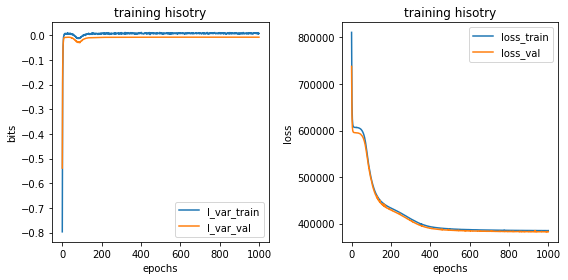

In [20]:
# Show training history
print('On test data:')
# x_test = test_df['x'].values
# y_test = test_df[y_cols].values


I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, axs = plt.subplots(1,2,figsize=[8,4])

ax = axs[0]
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
#ax.set_xscale('log')
ax.set_title('training hisotry')

ax = axs[1]
ax.plot(model.history['loss'], label='loss_train')
ax.plot(model.history['val_loss'], label='loss_val')
# ax.set_xlim(100,300)
# ax.set_ylim(0.7*1e6,0.8*1e6)
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_title('training hisotry')
fig.tight_layout()

In [21]:
model.history['loss'][-1]/1e6

0.38508525

In [22]:
phi = gpmap.x_to_phi(x_test)

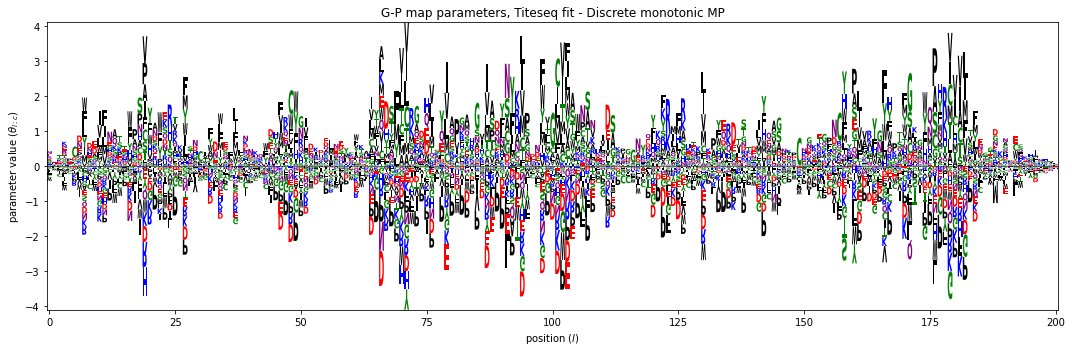

In [23]:
# Get G-P map parameters in matrix form
theta = np.squeeze(gpmap.weights[1].numpy())

# Create grid in phi space
phi_lim = [-5, 3]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
# Y = mp_mpa.Y    # Y = number of bins
# y_lim = [-.5, Y-.5]
# y_all = range(Y)

# Compute matrix of p(y|phi) values
#measurement_process = mp_mpa.p_of_y_given_phi(y_all, phi_grid)

# Create figure with two panels
fig, axs = plt.subplots(1,1,figsize=[15,5])

# Left panel: draw logo using logomaker
ax = axs
logo = logomaker.Logo(-pd.DataFrame(theta,columns=model.alphabet), ax=ax,center_values=True,color_scheme='chemistry')
ax.set_ylabel(r'parameter value ($\theta_{l:c}$)')
ax.set_xlabel(r'position ($l$)')
ax.set_title('G-P map parameters, Titeseq fit - Discrete monotonic MP')

# Right panel: draw measurement process as heatmap
# ax = axs[1]
# im = ax.imshow(measurement_process,
#                cmap='Greens',
#                extent=phi_lim+y_lim,
#                vmin=0,
#                origin='lower',
#                interpolation='nearest',
#                aspect="auto")
# ax.set_yticks(y_all)
# ax.set_ylabel('bin number (y)')
# ax.set_xlabel('latent phenotype ($\phi$)')
# ax.set_title('measurement process')
# cb = plt.colorbar(im)
# cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")

# Fix up plot
fig.tight_layout()
fig.savefig('ace2rbd_g-p_map_mpa_titeseq_only_DA-MP.png',dpi=300,bbox_inches='tight')
plt.show()

In [24]:
theta_lc = gpmap.get_theta(model,gauge='consensus')['theta_lc']
theta_lc_consensus_df = pd.DataFrame(theta_lc,columns=alphabet)

In [25]:
theta_raw_df = pd.DataFrame(theta,columns=alphabet)

In [26]:
bloom_single_mut_df = pd.read_csv('single_mut_effects_Bloom.txt')
bloom_single_mut_df.head(22)

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg
0,1,331,N,A,N331A,N1A,-0.05,-0.02,-0.03,-0.14,-0.08,-0.11
1,1,331,N,C,N331C,N1C,-0.08,-0.10,-0.09,-1.56,-0.97,-1.26
2,1,331,N,D,N331D,N1D,0.00,0.07,0.03,-0.75,-0.12,-0.44
3,1,331,N,E,N331E,N1E,0.02,-0.02,0.00,-0.39,-0.24,-0.31
4,1,331,N,F,N331F,N1F,-0.03,-0.16,-0.10,-0.83,-0.57,-0.70
5,1,331,N,G,N331G,N1G,-0.06,-0.02,-0.04,-0.21,-0.29,-0.25
6,1,331,N,H,N331H,N1H,0.01,-0.05,-0.02,-0.86,-0.36,-0.61
7,1,331,N,I,N331I,N1I,-0.06,-0.08,-0.07,-1.05,-0.65,-0.85
8,1,331,N,K,N331K,N1K,-0.01,-0.01,-0.01,-0.17,-0.24,-0.20
9,1,331,N,L,N331L,N1L,-0.08,-0.01,-0.05,-0.81,-0.69,-0.75


In [27]:

bloom_bind_df = pd.DataFrame(columns=alphabet)
for site in range(1,201+1,):

    temp_df = bloom_single_mut_df[bloom_single_mut_df['site_RBD']==site].copy()
    #temp_df['bind_lib1']
    #expr_lib1
    bloom_bind_df.loc[site-1] = temp_df['bind_lib1'].values[0:20]




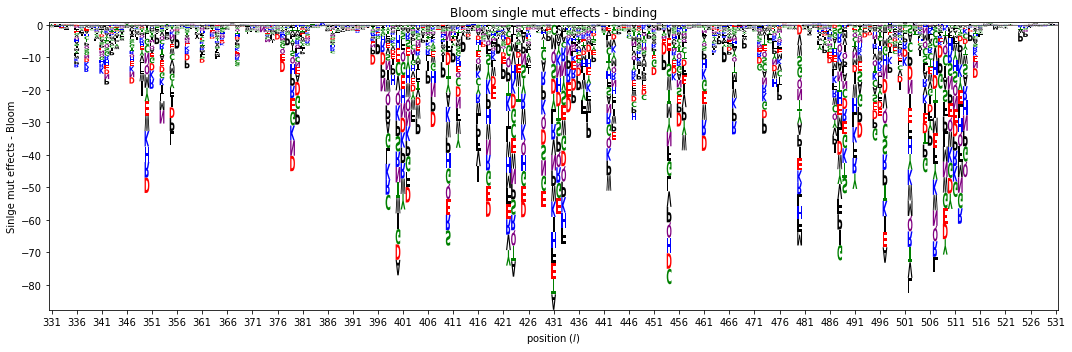

In [28]:
# Get G-P map parameters in matrix form
# theta = np.squeeze(gpmap.weights[1].numpy())

# # Create grid in phi space
# phi_lim = [-5, 3]
# phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# # Create array of allowable y values
# Y = mp_mpa.Y    # Y = number of bins
# y_lim = [-.5, Y-.5]
# y_all = range(Y)

# Compute matrix of p(y|phi) values
#measurement_process = mp_mpa.p_of_y_given_phi(y_all, phi_grid)

# Create figure with two panels
fig, axs = plt.subplots(1,1,figsize=[15,5])

# Left panel: draw logo using logomaker
ax = axs
logo = logomaker.Logo(bloom_bind_df.fillna(0), ax=ax,center_values=False, color_scheme='chemistry')
ax.set_ylabel('Sinlge mut effects - Bloom')
ax.set_xlabel(r'position ($l$)')
ax.set_title('Bloom single mut effects - binding')
ax.set_xticks(np.arange(0,201,5))
ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Right panel: draw measurement process as heatmap
# ax = axs[1]
# im = ax.imshow(measurement_process,
#                cmap='Greens',
#                extent=phi_lim+y_lim,
#                vmin=0,
#                origin='lower',
#                interpolation='nearest',
#                aspect="auto")
# ax.set_yticks(y_all)
# ax.set_ylabel('bin number (y)')
# ax.set_xlabel('latent phenotype ($\phi$)')
# ax.set_title('measurement process')
# cb = plt.colorbar(im)
# cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")

# Fix up plot
fig.tight_layout()
#fig.savefig('ace2rbd_g-p_map_mpa_sortseq_only.png',dpi=300,bbox_inches='tight')
plt.show()

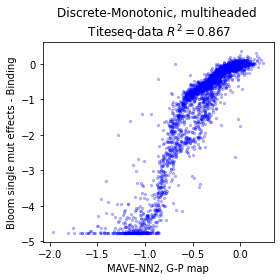

In [38]:
plt.figure(figsize=(4,4))
Rsq = np.corrcoef(theta_lc_consensus_df.fillna(0).values.ravel(),bloom_bind_df.fillna(0).values.ravel())[0,1]**2
plt.scatter( -theta_lc_consensus_df.values,bloom_bind_df.values,s=5,alpha=0.25,color='blue')

# lims = [-5,1]
# plt.plot(lims,lims,'--')
plt.ylabel('Bloom single mut effects - Binding')
plt.title(f'Discrete-Monotonic, multiheaded \n Titeseq-data $R^2 = {Rsq:.3f}$')
plt.xlabel('MAVE-NN2, G-P map')
plt.tight_layout()
#plt.savefig('mavenn_bloom_binding_comparison_DM.png',dpi=200,bbox_inches='tight')

In [43]:
#(-theta_lc_consensus_df).to_csv('discrete_agnostic_ace2rbd_binding.csv',index=False)

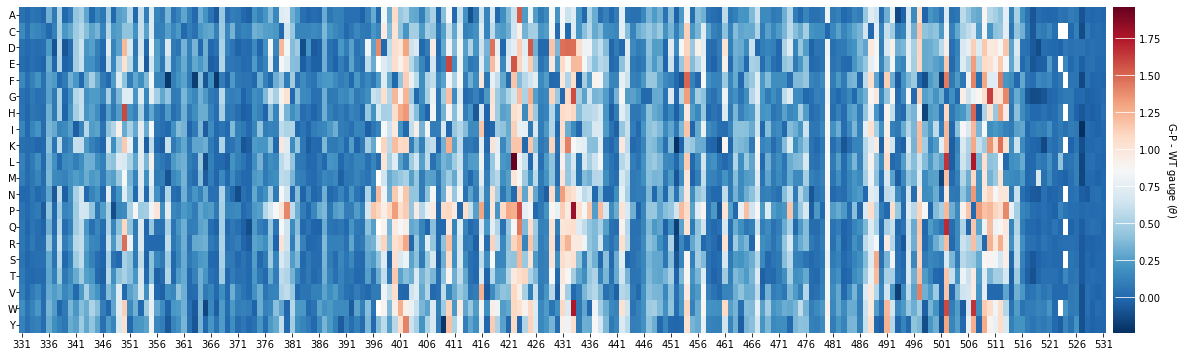

In [31]:

# # Create fig and ax objects
fig, ax = plt.subplots(figsize=[20,6])

# Draw heatmap
ax, cb = mavenn.heatmap(values=theta_lc,
                        alphabet='protein',
                        ax=ax,
                        #gpmap_type='additive',
                        cmap='RdBu_r',
                        cmap_size='2%')

# Style heatmap
ax.set_xticks(np.arange(0,201,5))
ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])
#ax.set_xlabel('nucleotide position', labelpad=5)

# Style colorbar
cb.set_label('G-P - WT gauge ($\\theta$)',
             labelpad=10, ha='center', va='center', rotation=-90)
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')

In [32]:
#np.save('titeseq_gpmap_discrete_monotonic',logo.df.values.ravel())

In [33]:
sortseq_gpmap = np.load('sortseq_gpmap_monotonic_agnostic.npy')
titeseq_gpmap = np.load('titeseq_gpmap_discrete_monotonic.npy')

In [34]:
# plt.figure(figsize=(5,5))
# # Compute R^2 between yhat_test and y_test
# Rsq = np.corrcoef(sortseq_gpmap,titeseq_gpmap)[0, 1]**2

# # Style plot
# xlim = [-1.5, 1.5]

# plt.scatter(sortseq_gpmap,titeseq_gpmap,s=4,color='blue',alpha=0.2)
# plt.xlabel('Sortseq G-P map parameters')
# plt.ylabel('Titeseq G-P map parameters')
# plt.title(f'$R^2$={Rsq:.3}');
# plt.plot(xlim, xlim, '--', color='k', label='diagonal')
# plt.xlim(xlim)
# plt.ylim(xlim)
# plt.show()

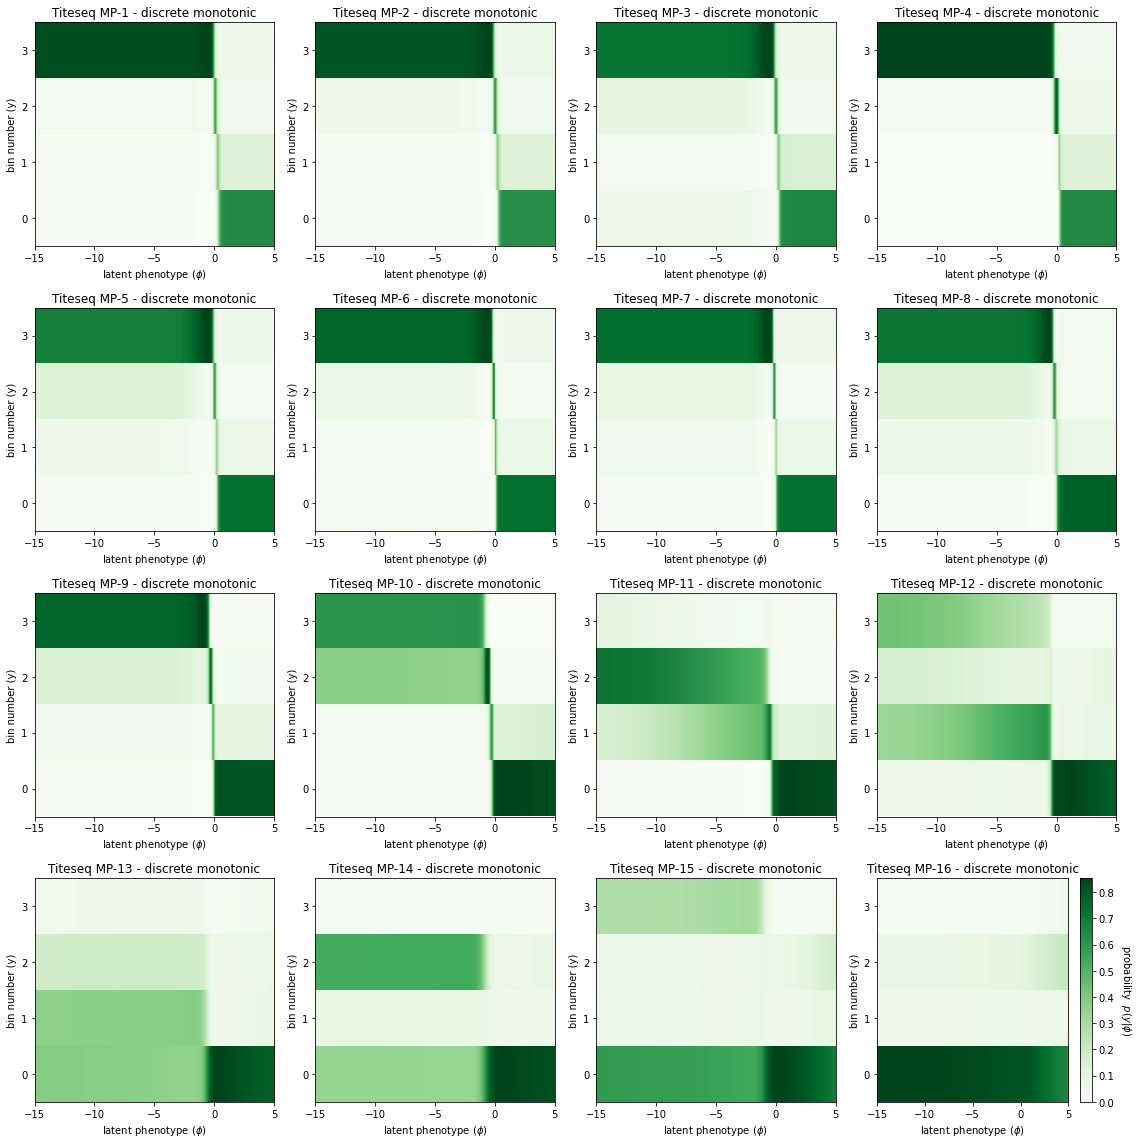

In [40]:
# Create grid in phi space
phi_lim = [-15, 5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
Y = mp_list[0].Y    # Y = number of bins
y_lim = [-.5, Y-.5]
y_all = range(Y)

# Compute matrix of p(y|phi) values



# Create figure with two panels
fig, axs = plt.subplots(4,4,figsize=[16,16])

mp_counter = 0
for i in range(4):
    for j in range(4):
        
        measurement_process = mp_list[mp_counter].p_of_y_given_phi(y_all, phi_grid)
        # Right panel: draw measurement process as heatmap
        ax = axs[i,j]

        im = ax.imshow(measurement_process,
                       cmap='Greens',
                       extent=phi_lim+y_lim,
                       vmin=0,
                       origin='lower',
                       interpolation='nearest',
                       aspect="auto")
        ax.set_yticks(y_all)
        ax.set_ylabel('bin number (y)')
        ax.set_xlabel('latent phenotype ($\phi$)')
        ax.set_title(f'Titeseq MP-{mp_counter+1} - discrete monotonic')
        mp_counter+=1
        
cb = plt.colorbar(im)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")
fig.tight_layout()

fig.savefig('ace2rbd_discrete_DiscreteAgnosticMP_fit_to_Titeseq.png',dpi=300,bbox_inches='tight')


In [44]:
def _x_to_mat(x, alphabet):
    return (np.array(list(x))[:, np.newaxis] == alphabet[np.newaxis, :]).astype(float)

In [45]:
WT_seq = model.x_stats['consensus_seq']

single_mutants = []

for idx,WT_char in enumerate(WT_seq):
    #print(idx)
    for mutant in model.alphabet:
#         if mutant==WT_seq[idx]:
#             continue
#         else:
        temp_WT_list = list(WT_seq)
        temp_WT_list[idx] = mutant
        single_mutant = ''.join(temp_WT_list)
        single_mutants.append(single_mutant)
            

In [46]:
phi_single_mutants = gpmap.x_to_phi(single_mutants)

array([-0.58337224, -0.46675405, -0.587785  , ..., -0.6247332 ,
       -0.6253935 , -0.6387622 ], dtype=float32)

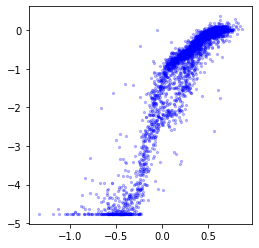

In [84]:
plt.figure(figsize=(4,4))
Rsq = np.corrcoef(phi_single_mutants,bloom_bind_df.fillna(0).values.ravel())[0,1]**2
plt.scatter(-phi_single_mutants.ravel(),bloom_bind_df.values,s=5,alpha=0.25,color='blue')
#plt.scatter(-1/(10**(phi_single_mutants.ravel())),bloom_bind_df.values,s=2.5,alpha=0.25,color='blue')